# Regression

### Data preparation

In [1]:
#Loading the required base libraries numpy, pandas, matplotlib and statmodels

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### Data Exploration, Preprocessing, and Imputation

In [2]:
#Loading the regression train and test data sets to dataframes
regression_train =  pd.read_csv('Regression_train.csv')
regression_test =  pd.read_csv('Regression_test.csv')

In [3]:
#Displaying first five rows of train dataframe
regression_train.head()

Unnamed: 0    Crash ID Crash Date       Crash Severity Crash Time  \
0           0         NaN   5/1/2023      N - NOT INJURED      16:04   
1           1  19524300.0   5/1/2023                  NaN      17:49   
2           2  19524300.0   5/1/2023  C - POSSIBLE INJURY      17:49   
3           3  19524300.0   5/1/2023  C - POSSIBLE INJURY      17:49   
4           4  19524300.0   5/1/2023  C - POSSIBLE INJURY      17:49   

  Day of Week Nearest Trauma Center Distance Time Arrived Time Notified  \
0         NaN                        No Data      No Data       No Data   
1      MONDAY                          5.916        17:59         17:52   
2      MONDAY                          5.916        17:59         17:52   
3      MONDAY                          5.916          NaN         17:52   
4      MONDAY                          5.916        17:59         17:52   

  Time Roadway Cleared Weather Condition Autonomous Level Engaged  \
0                16:26         1 - CLEAR        0 - NO AUTOMATION   
1                19:08         1 - CLEAR        0 - NO AUTOMATION   
2                19:08         1 - CLEAR        0 - NO AUTOMATION   
3                19:08         1 - CLEAR        0 - NO AUTOMATION   
4                19:08         1 - CLEAR        0 - NO AUTOMATION   

  Autonomous Unit - Reported Vehicle Damage Rating 1 - Severity  \
0                     2 - NO                      3 - DAMAGED 3   
1                     2 - NO                      4 - DAMAGED 4   
2                     2 - NO              1 - DAMAGED 1 MINIMUM   
3                     2 - NO                      3 - DAMAGED 3   
4                     2 - NO                      3 - DAMAGED 3   

  Vehicle Model Year Person Age Person Alcohol Result Person Drug Test Result  \
0               2019         19               No Data     97 - NOT APPLICABLE   
1               2006         37               No Data     97 - NOT APPLICABLE   
2               2008        NaN               No Data     97 - NOT APPLICABLE   
3               2018         23               No Data     97 - NOT APPLICABLE   
4               2018         24               No Data                 No Data   

  Person Ethnicity Person Gender  
0     H - HISPANIC      1 - MALE  
1        W - WHITE    2 - FEMALE  
2        W - WHITE      1 - MALE  
3        W - WHITE      1 - MALE  
4        W - WHITE      1 - MALE

In [4]:
#Displaying first five rows of test dataframe
regression_test.head()

Unnamed: 0    Crash ID  Crash Date   Crash Severity Day of Week  \
0           0  19896631.0  11/30/2023  N - NOT INJURED    THURSDAY   
1           1  19568388.0   5/26/2023  N - NOT INJURED      FRIDAY   
2           2  19675565.0   7/29/2023  N - NOT INJURED    SATURDAY   
3           3  19636995.0    7/6/2023  N - NOT INJURED    THURSDAY   
4           4  19605340.0   6/15/2023  N - NOT INJURED    THURSDAY   

  Nearest Trauma Center Distance Time Arrived Time Notified Weather Condition  \
0                        No Data      No Data       No Data           6 - FOG   
1                        No Data      No Data       No Data         1 - CLEAR   
2                        No Data      No Data       No Data         1 - CLEAR   
3                        No Data      No Data       No Data         1 - CLEAR   
4                        No Data      No Data       No Data         1 - CLEAR   

  Autonomous Level Engaged Autonomous Unit - Reported  \
0        0 - NO AUTOMATION                     2 - NO   
1        0 - NO AUTOMATION                     2 - NO   
2        0 - NO AUTOMATION                     2 - NO   
3        0 - NO AUTOMATION                     2 - NO   
4        0 - NO AUTOMATION                     2 - NO   

  Vehicle Damage Rating 1 - Severity Vehicle Model Year Person Age  \
0                      2 - DAMAGED 2               2010         19   
1                      3 - DAMAGED 3               2015         59   
2                      3 - DAMAGED 3               2009         41   
3                      3 - DAMAGED 3               2020         56   
4                      3 - DAMAGED 3               2019         31   

  Person Alcohol Result Person Drug Test Result Person Ethnicity Person Gender  
0               No Data     97 - NOT APPLICABLE        W - WHITE      1 - MALE  
1               No Data     97 - NOT APPLICABLE        W - WHITE      1 - MALE  
2               No Data     97 - NOT APPLICABLE        B - BLACK    2 - FEMALE  
3               No Data     97 - NOT APPLICABLE        W - WHITE    2 - FEMALE  
4               No Data     97 - NOT APPLICABLE        B - BLACK      1 - MALE

In [5]:
#Printing the information of train dataframe
regression_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          5376 non-null   int64  
 1   Crash ID                            5266 non-null   float64
 2   Crash Date                          5267 non-null   object 
 3   Crash Severity                      5259 non-null   object 
 4   Crash Time                          5376 non-null   object 
 5   Day of Week                         5264 non-null   object 
 6   Nearest Trauma Center Distance      5266 non-null   object 
 7   Time Arrived                        5283 non-null   object 
 8   Time Notified                       5264 non-null   object 
 9   Time Roadway Cleared                5376 non-null   object 
 10  Weather Condition                   5376 non-null   object 
 11  Autonomous Level Engaged            5273 no

In [6]:
#Printing the information of test dataframe
regression_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          948 non-null    int64  
 1   Crash ID                            930 non-null    float64
 2   Crash Date                          919 non-null    object 
 3   Crash Severity                      928 non-null    object 
 4   Day of Week                         924 non-null    object 
 5   Nearest Trauma Center Distance      927 non-null    object 
 6   Time Arrived                        934 non-null    object 
 7   Time Notified                       930 non-null    object 
 8   Weather Condition                   948 non-null    object 
 9   Autonomous Level Engaged            929 non-null    object 
 10  Autonomous Unit - Reported          926 non-null    object 
 11  Vehicle Damage Rating 1 - Severity  928 non-n

All the columns are objects, converting all objects to numerical datatypes to apply Machine Learning.  
Checking the regression train dataframe missing data and imputing it, then applying same imputations on test dataframe

In [7]:
#Counting the missing values in train dataframe
regression_train.isnull().sum()

Unnamed: 0                              0
Crash ID                              110
Crash Date                            109
Crash Severity                        117
Crash Time                              0
Day of Week                           112
Nearest Trauma Center Distance        110
Time Arrived                           93
Time Notified                         112
Time Roadway Cleared                    0
Weather Condition                       0
Autonomous Level Engaged              103
Autonomous Unit - Reported            102
Vehicle Damage Rating 1 - Severity    107
Vehicle Model Year                    103
Person Age                            119
Person Alcohol Result                  91
Person Drug Test Result               127
Person Ethnicity                        0
Person Gender                         108
dtype: int64

In [8]:
#Counting the missing values in test dataframe
regression_test.isnull().sum()

Unnamed: 0                             0
Crash ID                              18
Crash Date                            29
Crash Severity                        20
Day of Week                           24
Nearest Trauma Center Distance        21
Time Arrived                          14
Time Notified                         18
Weather Condition                      0
Autonomous Level Engaged              19
Autonomous Unit - Reported            22
Vehicle Damage Rating 1 - Severity    20
Vehicle Model Year                    12
Person Age                            19
Person Alcohol Result                 15
Person Drug Test Result               17
Person Ethnicity                       0
Person Gender                         22
dtype: int64

Both the train and test data contain missing values. To address this, we will impute them by iterating through each column individually.

##### Time to Clear Roadway

Since our train does not have the target variable, creating the target variable by finding the time difference between the Crash Time and Time Roadway Cleared.

In [9]:
# Converting 'Crash Time' column to datetime format
regression_train['Crash Time'] = pd.to_datetime(regression_train['Crash Time'], format='%H:%M')

# Converting 'Time Roadway Cleared' column to datetime format
regression_train['Time Roadway Cleared'] = pd.to_datetime(regression_train['Time Roadway Cleared'], format='%H:%M')

# Printing information about the dataframe
regression_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Unnamed: 0                          5376 non-null   int64         
 1   Crash ID                            5266 non-null   float64       
 2   Crash Date                          5267 non-null   object        
 3   Crash Severity                      5259 non-null   object        
 4   Crash Time                          5376 non-null   datetime64[ns]
 5   Day of Week                         5264 non-null   object        
 6   Nearest Trauma Center Distance      5266 non-null   object        
 7   Time Arrived                        5283 non-null   object        
 8   Time Notified                       5264 non-null   object        
 9   Time Roadway Cleared                5376 non-null   datetime64[ns]
 10  Weather Condition       

In [10]:
# Adding a day to 'Time Roadway Cleared' when it's earlier than 'Crash Time'
regression_train.loc[regression_train['Time Roadway Cleared'] < regression_train['Crash Time'], 'Time Roadway Cleared'] += pd.Timedelta(days=1)

# Recalculate 'Time to Clear Roadway'
time_diff_seconds = (regression_train['Time Roadway Cleared'] - regression_train['Crash Time']).dt.total_seconds()
regression_train['Time to Clear Roadway'] = time_diff_seconds / 60

In [11]:
regression_train['Time to Clear Roadway'].describe()

count    5376.000000
mean       48.421317
std        82.420353
min         0.000000
25%        13.000000
50%        39.000000
75%        58.000000
max      1427.000000
Name: Time to Clear Roadway, dtype: float64

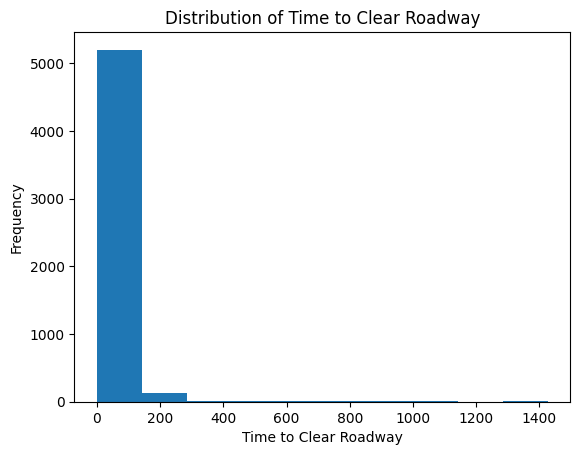

In [12]:
#Plotting the histogram of target variable
regression_train['Time to Clear Roadway'].plot(kind = 'hist')

plt.xlabel('Time to Clear Roadway')
# Add a title to the plot
plt.title('Distribution of Time to Clear Roadway')
# Display the plot
plt.show()

##### Unnamed: 0


The column Unnamed: 0 is likely  an index column that is included when the data was saved to a CSV file.As thiss column doesn’t provide any useful information for analysis or modeling, dropping it.

In [13]:
# Dropping the 'Unnamed: 0' column
regression_train.drop('Unnamed: 0', axis = 1, inplace = True)
regression_test.drop('Unnamed: 0', axis = 1, inplace = True)

##### Crash ID

In [14]:
# Checking the number of missing values in 'Crash ID'
regression_train['Crash ID'].isnull().sum()

110

we are forward filling (ffill()) and then backward filling (bfill()) the missing values in the 'Crash ID' column. Forward fill copies the previous value to fill the missing value, while backward fill copies the next value. We use both to ensure that if there are consecutive missing values, they are all filled. We used ffill() and bfill() because our data has consecutive values for IDs.

In [15]:
# Forward filling and then backward filling missing values in 'Crash ID'
regression_train['Crash ID'] = regression_train['Crash ID'].ffill().bfill()

# Checking the number of missing values in 'Crash ID'
regression_train['Crash ID'].isnull().sum()

0

In [16]:
# Checking the number of missing values in 'Crash ID' in test data
regression_test['Crash ID'].isnull().sum()

18

In [17]:
# Forward filling and then backward filling missing values in 'Crash ID' in test data
regression_test['Crash ID'] = regression_test['Crash ID'].ffill().bfill()

# Checking the number of missing values in 'Crash ID' in test data
regression_test['Crash ID'].isnull().sum()

0

##### Crash Date

In [18]:
# Checking the number of missing values in 'Crash Date'
regression_train['Crash Date'].isnull().sum()

109

The below code fills missing values in the 'Crash Date' column of the DataFrame regression_test. 
It uses forward fill (ffill()) and backward fill (bfill()) sequentially within groups  defined by the 'Crash ID' column. 
Grouping by 'Crash ID', it fills missing values in the 'Crash Date' column within each group using forward fill (ffill()). Then, it fills any remaining missing values in the 'Crash Date' column using backward fill (bfill()). This method is most suitable as we are dealing with a time series data.

In [19]:
# Forward filling and then backward filling missing values in 'Crash Date'
regression_train['Crash Date'] = regression_train.groupby('Crash ID')['Crash Date'].ffill().bfill()

# Checking the number of missing values in 'Crash Date'
regression_train['Crash Date'].isnull().sum()

0

In [20]:
# Checking the number of missing values in 'Crash Date' in test data
regression_test['Crash Date'].isnull().sum()

29

In [21]:
# Forward filling and then backward filling missing values in 'Crash Date' in test data
regression_test['Crash Date'] = regression_train.groupby('Crash ID')['Crash Date'].ffill().bfill()

# Checking the number of missing values in 'Crash Date' in test data
regression_test['Crash Date'].isnull().sum()

0

##### Crash Severity

In [22]:
# Checking the number of missing values in 'Crash Severity'
regression_train['Crash Severity'].isnull().sum()

117

In [23]:
# Counting the occurrences of each unique value in the 'Crash Severity' column
regression_train['Crash Severity'].value_counts()

Crash Severity
N - NOT INJURED                 3459
B - SUSPECTED MINOR INJURY       796
C - POSSIBLE INJURY              733
99 - UNKNOWN                     149
A - SUSPECTED SERIOUS INJURY     101
K - FATAL INJURY                  21
Name: count, dtype: int64

In [24]:
# Filling missing values in the 'Crash Severity' column with 'N - NOT INJURED'
regression_train.fillna({'Crash Severity': 'N - NOT INJURED'}, inplace=True)

# Checking if there are still any null values in the 'Crash Severity' column
regression_train['Crash Severity'].isnull().sum()

0

In [25]:
# Replacing '99 - UNKNOWN' with 'N - NOT INJURED' in the 'Crash Severity' column
regression_train['Crash Severity'] = regression_train['Crash Severity'].replace('99 - UNKNOWN', 'N - NOT INJURED')

# Counting the occurrences of each unique value in the 'Crash Severity' column
regression_train['Crash Severity'].value_counts()

Crash Severity
N - NOT INJURED                 3725
B - SUSPECTED MINOR INJURY       796
C - POSSIBLE INJURY              733
A - SUSPECTED SERIOUS INJURY     101
K - FATAL INJURY                  21
Name: count, dtype: int64

<Axes: xlabel='Crash Severity'>

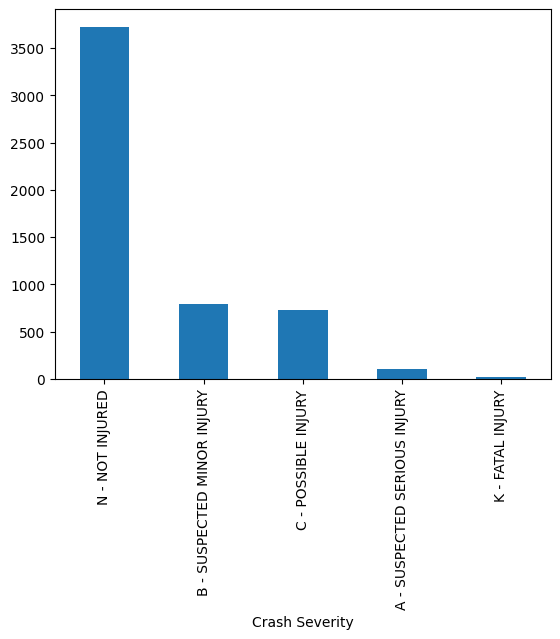

In [26]:
#Plotting the 'Crash Severity' in training DataFrame
regression_train['Crash Severity'].value_counts().plot(kind='bar')

In [27]:
# Mapping categorical values in the 'Crash Severity' column to numerical values
regression_train['Crash Severity'] = regression_train['Crash Severity'].map({'N - NOT INJURED': 0, 'B - SUSPECTED MINOR INJURY': 1,
                                                                             'C - POSSIBLE INJURY': 2, 'A - SUSPECTED SERIOUS INJURY': 3, 
                                                                             'K - FATAL INJURY': 4})

In [28]:
# Checking the number of null values in the 'Crash Severity' column
regression_test['Crash Severity'].isnull().sum()

20

In [29]:
# Filling missing values in the 'Crash Severity' column with 'N - NOT INJURED' in test df
regression_test.fillna({'Crash Severity': 'N - NOT INJURED'}, inplace = True)

# Checking if there are still any null values in the 'Crash Severity' column in test df
regression_test['Crash Severity'].isnull().sum()

0

In [30]:
# Replacing '99 - UNKNOWN' with 'N - NOT INJURED' in the 'Crash Severity' column of the test dataframe
regression_test['Crash Severity'] = regression_test['Crash Severity'].replace('99 - UNKNOWN', 'N - NOT INJURED')

# Counting the occurrences of each unique value in the 'Crash Severity' column of the test DataFrame
regression_test['Crash Severity'].value_counts()

Crash Severity
N - NOT INJURED                 663
C - POSSIBLE INJURY             136
B - SUSPECTED MINOR INJURY      120
A - SUSPECTED SERIOUS INJURY     27
K - FATAL INJURY                  2
Name: count, dtype: int64

<Axes: xlabel='Crash Severity'>

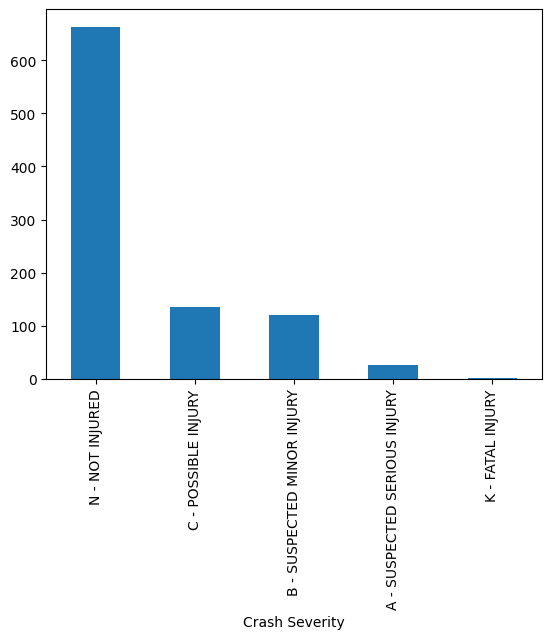

In [31]:
#Plotting the 'Crash Severity' in training DataFrame
regression_test['Crash Severity'].value_counts().plot(kind='bar')

In [32]:
# Mapping categorical values in the 'Crash Severity' column to numerical values in test dataframe
regression_test['Crash Severity'] = regression_test['Crash Severity'].map({'N - NOT INJURED': 0, 'B - SUSPECTED MINOR INJURY': 1,
                                                                             'C - POSSIBLE INJURY': 2, 'A - SUSPECTED SERIOUS INJURY': 3, 
                                                                             'K - FATAL INJURY': 4}) 

##### Day of Week

As we have null values in Day of Week, the most appropriate imputation will be directly importing the day of week using datetime module of python as our data has Crash Date.

In [33]:
# Checking the number of missing values in 'Day of Week'
regression_train['Day of Week'].isnull().sum()

112

In [34]:
# Counting the occurrences of each unique value in the 'Day of Week' column
regression_train['Day of Week'].value_counts()

Day of Week
FRIDAY       961
THURSDAY     833
TUESDAY      774
MONDAY       765
WEDNESDAY    754
SATURDAY     617
SUNDAY       560
Name: count, dtype: int64

In [35]:
# Mapping the days of the week to numerical values to import null values directly from python dt module
regression_train['Day of Week'] = regression_train['Day of Week'].map({'MONDAY' : 0, 'TUESDAY': 1, 'WEDNESDAY': 2,
                                                                       'THURSDAY': 3, 'FRIDAY': 4, 'SATURDAY': 5, 'SUNDAY': 6})

In [36]:
# Converting 'Crash Date' column to datetime format
regression_train['Crash Date'] = pd.to_datetime(regression_train['Crash Date'])

# Filling missing values in 'Day of Week' column with the corresponding day of the week from 'Crash Date'
regression_train['Day of Week'] = regression_train['Day of Week'].fillna(regression_train['Crash Date'].dt.dayofweek)

# Checking the number of missing values in 'Day of Week'
regression_train['Crash Date'].isnull().sum()

0

In [37]:
# Count the occurrences of each unique value in the 'Day of Week' column
regression_train['Day of Week'].value_counts()

Day of Week
4.0    985
3.0    854
1.0    791
0.0    782
2.0    768
5.0    630
6.0    566
Name: count, dtype: int64

In [38]:
# Mapping the days of the week to names
regression_train['Day of Week'] = regression_train['Day of Week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                                                                     4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

<Axes: xlabel='Day of Week'>

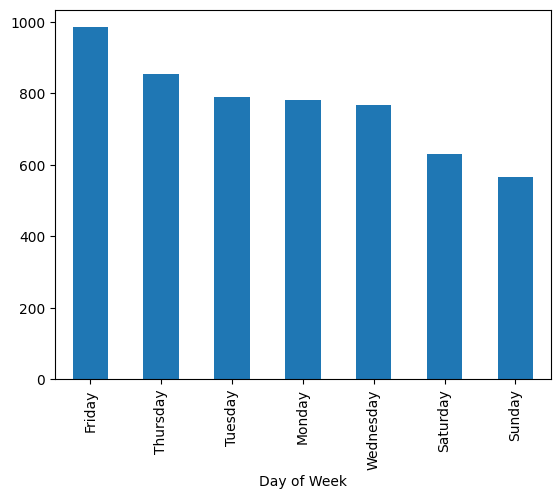

In [39]:
regression_train['Day of Week'].value_counts().plot(kind='bar')

In [40]:
# Checking the number of missing values in 'Day of Week' in test data
regression_test['Day of Week'].isnull().sum()

24

In [41]:
# Count the occurrences of each unique value in the 'Day of Week' column in test data
regression_test['Day of Week'].value_counts()

Day of Week
FRIDAY       154
THURSDAY     153
MONDAY       151
WEDNESDAY    135
TUESDAY      129
SATURDAY     112
SUNDAY        90
Name: count, dtype: int64

In [42]:
# Mapping the days of the week to numerical values
regression_test['Day of Week'] = regression_test['Day of Week'].map({'MONDAY' : 0, 'TUESDAY': 1, 'WEDNESDAY': 2,
                                                                     'THURSDAY': 3, 'FRIDAY': 4, 'SATURDAY': 5, 'SUNDAY': 6})

In [43]:
# Converting 'Crash Date' column to datetime format
regression_test['Crash Date'] = pd.to_datetime(regression_test['Crash Date'])

# Filling missing values in 'Day of Week' column with the corresponding day of the week from 'Crash Date'
regression_test['Day of Week'] = regression_test['Day of Week'].fillna(regression_test['Crash Date'].dt.dayofweek)

# Checking the number of missing values in 'Day of Week'
regression_test['Day of Week'].isnull().sum()

0

In [44]:
# Count the occurrences of each unique value in the 'Day of Week' column in test data
regression_test['Day of Week'].value_counts()

Day of Week
4.0    158
3.0    155
0.0    155
2.0    136
1.0    131
5.0    116
6.0     97
Name: count, dtype: int64

In [45]:
# Mapping the days of the week to names
regression_test['Day of Week'] = regression_test['Day of Week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                                                                     4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

<Axes: xlabel='Day of Week'>

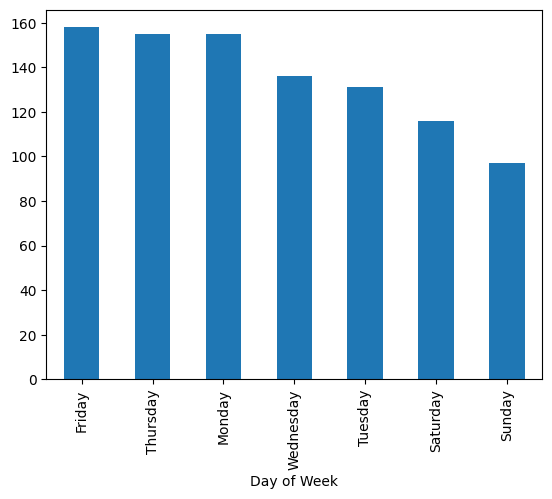

In [46]:
#Plotting the 'Day of Week' in training DataFrame
regression_test['Day of Week'].value_counts().plot(kind='bar')

In [47]:
# Creating dummy variables for 'Day of Week' column in the training DataFrame
cols_for_dummies_train = pd.get_dummies(regression_train['Day of Week'], prefix='', prefix_sep='').astype(int)
regression_train[cols_for_dummies_train.columns] = cols_for_dummies_train

# Creating dummy variables for 'Day of Week' column in the test DataFrame
cols_for_dummies_test = pd.get_dummies(regression_test['Day of Week'], prefix='', prefix_sep='').astype(int)
regression_test[cols_for_dummies_test.columns] = cols_for_dummies_test

In [48]:
# Dropping the 'Day of Week' column from both the training and test DataFrames
regression_train.drop('Day of Week', axis = 1, inplace = True)
regression_test.drop('Day of Week', axis = 1, inplace = True)

##### Nearest Trauma Center Distance

In [49]:
# Counting the occurrences of each unique value in the 'Nearest Trauma Center Distance' column of the training dataframe
regression_train['Nearest Trauma Center Distance'].value_counts()

Nearest Trauma Center Distance
No Data    4538
5.916        19
2.491        12
4.489        11
4.354        10
           ... 
4.62          1
0.988         1
1.354         1
5.685         1
7.712         1
Name: count, Length: 272, dtype: int64

'Nearest Trauma Center Distance' has 4538 out of 5376 entries labeled as 'No Data'. This makes up the majority of the data in the column. Since this column doesn't provide meaningful information for analysis due to the high number of missing values, dropping the column.

In [50]:
# Dropping the 'Nearest Trauma Center Distance' column from the training DataFrame
regression_train.drop('Nearest Trauma Center Distance', axis=1, inplace=True)

# Dropping the 'Nearest Trauma Center Distance' column from the test DataFrame
regression_test.drop('Nearest Trauma Center Distance', axis=1, inplace=True)

##### Time Arrived

In [51]:
# Counting the occurrences of each unique value in the 'Time Arrived' column of the training DataFrame
regression_train['Time Arrived'].value_counts()

Time Arrived
No Data    4451
16:20        11
15:50        10
13:13        10
13:39        10
           ... 
23:40         1
0:01          1
11:32         1
11:09         1
18:26         1
Name: count, Length: 327, dtype: int64

'Time Arrived' has 4451 out of 5376 entries labeled as 'No Data'. Since this column doesn't provide meaningful information for analysis due to the high number of missing values, dropping it.

In [52]:
# Dropping the 'Time Arrived' column from the training DataFrame
regression_train.drop('Time Arrived', axis = 1, inplace = True)

# Dropping the 'Time Arrived' column from the test DataFrame
regression_test.drop('Time Arrived', axis = 1, inplace = True)

##### Time Notified

In [53]:
# Counting the occurrences of each unique value in the 'Time Notified' column of the training DataFrame
regression_train['Time Notified'].value_counts()

Time Notified
No Data    4432
16:56        11
16:20        10
8:59          9
13:03         9
           ... 
20:06         1
3:20          1
8:15          1
21:10         1
11:58         1
Name: count, Length: 321, dtype: int64

'Time Notified' contains 4432 out of 5376 entries labeled as 'No Data'. Since this column doesn't provide meaningful information for analysis due to the high number of missing values, dropping this column as well.

In [54]:
# Dropping the 'Time Notified' column from the training DataFrame
regression_train.drop('Time Notified', axis = 1, inplace = True)

# Dropping the 'Time Notified' column from the test DataFrame
regression_test.drop('Time Notified', axis = 1, inplace = True)

##### Weather Condition

In [55]:
# Counting the occurrences of each unique value in the 'Weather Condition' column of the training DataFrame
regression_train['Weather Condition'].value_counts()

Weather Condition
1 - CLEAR                            4304
2 - CLOUDY                            531
3 - RAIN                              394
Unknown                                49
No Data                                46
99 - UNKNOWN                           27
6 - FOG                                11
5 - SNOW                                6
4 - SLEET/HAIL                          4
98 - OTHER (EXPLAIN IN NARRATIVE)       4
Name: count, dtype: int64

Although Weather Condition does not have any missing values, it still has data labelled as Unknown, No Data, 99 - UNKNOWN, 98 - OTHER.  
Replacing all the categories with np.nan, then imputing them grouping by Crash Data. As the same day tends to have same weather condition.

In [56]:
# Replacing all four unknown categories with NaN in the 'Weather Condition' column of the training DataFrame
regression_train['Weather Condition'] = regression_train['Weather Condition'].replace(['Unknown', 'No Data', '99 - UNKNOWN', 
                                                                                       '98 - OTHER (EXPLAIN IN NARRATIVE)'], np.nan)

# Counting the occurrences of each unique value in the 'Weather Condition' column of the training DataFrame
regression_train['Weather Condition'].value_counts()

Weather Condition
1 - CLEAR         4304
2 - CLOUDY         531
3 - RAIN           394
6 - FOG             11
5 - SNOW             6
4 - SLEET/HAIL       4
Name: count, dtype: int64

In [57]:
# Checking the number of null values in the 'Weather Condition' column of the training DataFrame
regression_train['Weather Condition'].isnull().sum()

126

In [58]:
# Filling missing values in the 'Weather Condition' column based on the mode of each group defined by 'Crash Date'
regression_train['Weather Condition'] = regression_train.groupby('Crash Date')['Weather Condition'].transform(lambda x: x.fillna(x.mode().iloc[0]))

# Checking the number of null values in the 'Weather Condition' column after filling missing values
regression_train['Weather Condition'].isnull().sum()

0

In [59]:
# Counting the occurrences of each unique value in the 'Weather Condition' column of the training DataFrame
regression_train['Weather Condition'].value_counts()

Weather Condition
1 - CLEAR         4415
2 - CLOUDY         535
3 - RAIN           405
6 - FOG             11
5 - SNOW             6
4 - SLEET/HAIL       4
Name: count, dtype: int64

<Axes: xlabel='Weather Condition'>

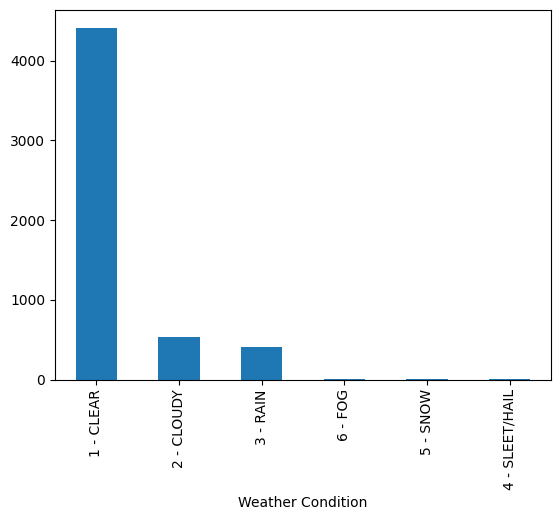

In [60]:
#Plotting the 'Weather Condition' in training DataFrame
regression_train['Weather Condition'].value_counts().plot(kind='bar')

In [61]:
# Mapping categorical values in the 'Weather Condition' column to numerical values
regression_train['Weather Condition'] = regression_train['Weather Condition'].map({'1 - CLEAR' : 0, '2 - CLOUDY': 1, '3 - RAIN': 2, 
                                                                                   '4 - SLEET/HAIL': 3, '5 - SNOW': 4, '6 - FOG': 5})

In [62]:
# Counting the occurrences of each unique value in the 'Weather Condition' column of the test DataFrame
regression_test['Weather Condition'].value_counts()

Weather Condition
1 - CLEAR                            743
2 - CLOUDY                           101
3 - RAIN                              72
No Data                               12
Unknown                               10
99 - UNKNOWN                           6
6 - FOG                                3
98 - OTHER (EXPLAIN IN NARRATIVE)      1
Name: count, dtype: int64

In [63]:
# Replacing specified categories with NaN in the 'Weather Condition' column of the test DataFrame
regression_test['Weather Condition'] = regression_test['Weather Condition'].replace(['Unknown', 'No Data', '99 - UNKNOWN', 
                                                                                     '98 - OTHER (EXPLAIN IN NARRATIVE)'], np.nan)

# Counting the occurrences of each unique value in the 'Weather Condition' column of the test DataFrame
regression_test['Weather Condition'].value_counts()

Weather Condition
1 - CLEAR     743
2 - CLOUDY    101
3 - RAIN       72
6 - FOG         3
Name: count, dtype: int64

In [64]:
# Checking the number of null values in the 'Weather Condition' column of the test DataFrame
regression_test['Weather Condition'].isnull().sum()

29

In [65]:
# Filling missing values in the 'Weather Condition' column of the test DataFrame by using the mode of each group defined by 'Crash Date'
regression_test['Weather Condition'] = regression_test.groupby('Crash Date')['Weather Condition'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

# Checking the number of null values in the 'Weather Condition' column after filling missing values
regression_test['Weather Condition'].isnull().sum()

0

In [66]:
# Counting the occurrences of each unique value in the 'Weather Condition' column of the test DataFrame
regression_test['Weather Condition'].value_counts()

Weather Condition
1 - CLEAR     772
2 - CLOUDY    101
3 - RAIN       72
6 - FOG         3
Name: count, dtype: int64

<Axes: xlabel='Weather Condition'>

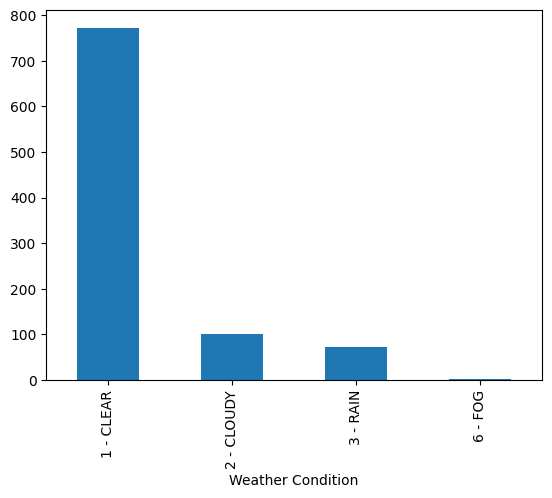

In [67]:
#Plotting the 'Weather Condition' in test DataFrame
regression_test['Weather Condition'].value_counts().plot(kind='bar')

In [68]:
# Mapping categorical values in the 'Weather Condition' column to numerical values
regression_test['Weather Condition'] = regression_test['Weather Condition'].map({'1 - CLEAR' : 0, '2 - CLOUDY': 1, '3 - RAIN': 2, 
                                                                                   '4 - SLEET/HAIL': 3, '5 - SNOW': 4, '6 - FOG': 5})

##### Autonomous Level Engaged

In [69]:
# Check the number of null values in the 'Autonomous Level Engaged' column of the training DataFrame
regression_train['Autonomous Level Engaged'].isnull().sum()

103

In [70]:
# Count the occurrences of each unique value in the 'Autonomous Level Engaged' column of the training DataFrame
regression_train['Autonomous Level Engaged'].value_counts()

Autonomous Level Engaged
0 - NO AUTOMATION    4961
99 - UNKNOWN          312
Name: count, dtype: int64

In [71]:
# Fill missing values in the 'Autonomous Level Engaged' column with '0 - NO AUTOMATION'
regression_train.fillna({'Autonomous Level Engaged': '0 - NO AUTOMATION'}, inplace = True)

# Check if there are still any null values in the 'Autonomous Level Engaged' column
regression_train['Autonomous Level Engaged'].isnull().sum()

0

<Axes: xlabel='Autonomous Level Engaged'>

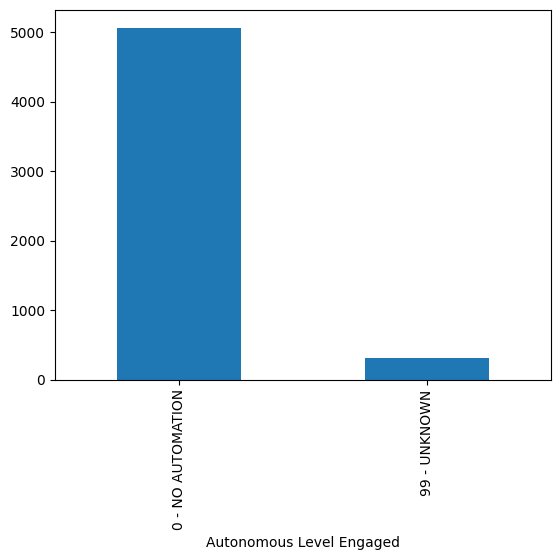

In [72]:
#Plotting the 'Autonomous Level Engaged' in training DataFrame
regression_train['Autonomous Level Engaged'].value_counts().plot(kind='bar')

In [73]:
# Mapping categorical values in the 'Autonomous Level Engaged' column to numerical values
regression_train['Autonomous Level Engaged'] = regression_train['Autonomous Level Engaged'].map({ '0 - NO AUTOMATION': 1, '99 - UNKNOWN': 0})

In [74]:
# Checking the number of null values in the 'Autonomous Level Engaged' column of the test DataFrame
regression_test['Autonomous Level Engaged'].isnull().sum()

19

In [75]:
# Filling missing values in the 'Autonomous Level Engaged' column with '0 - NO AUTOMATION'
regression_test.fillna({'Autonomous Level Engaged': '0 - NO AUTOMATION'}, inplace = True)

# Checking if there are still any null values in the 'Autonomous Level Engaged' column
regression_test['Autonomous Level Engaged'].isnull().sum()

0

<Axes: xlabel='Autonomous Level Engaged'>

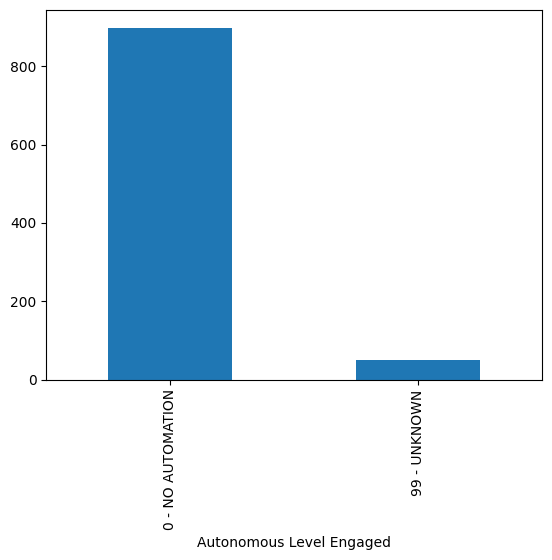

In [76]:
#Plotting the 'Autonomous Level Engaged' in test DataFrame
regression_test['Autonomous Level Engaged'].value_counts().plot(kind='bar')

In [77]:
# Mapping categorical values in the 'Autonomous Level Engaged' column to numerical values
regression_test['Autonomous Level Engaged'] = regression_test['Autonomous Level Engaged'].map({ '0 - NO AUTOMATION': 1, '99 - UNKNOWN': 0})

##### Autonomous Unit - Reported

In [78]:
# Checking the number of null values in the 'Autonomous Unit - Reported' column of the training DataFrame
regression_train['Autonomous Unit - Reported'].isnull().sum()

102

In [79]:
# Counting the occurrences of each unique value in the 'Autonomous Unit - Reported' column of the training DataFrame
regression_train['Autonomous Unit - Reported'].value_counts()

Autonomous Unit - Reported
2 - NO          4968
99 - UNKNOWN     306
Name: count, dtype: int64

In [80]:
# Filling missing values in the 'Autonomous Unit - Reported' column with '2 - NO'
regression_train.fillna({'Autonomous Unit - Reported': '2 - NO'}, inplace = True)

# Checking if there are still any null values in the 'Autonomous Unit - Reported' column
regression_train['Autonomous Unit - Reported'].isnull().sum()

0

<Axes: xlabel='Autonomous Unit - Reported'>

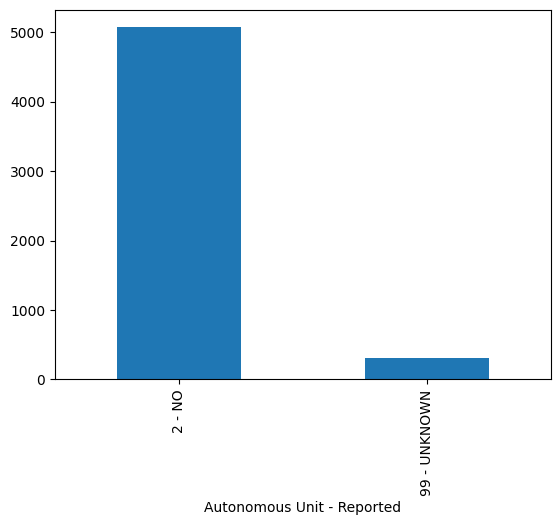

In [81]:
#Plotting the 'Autonomous Unit - Reported' in training DataFrame
regression_train['Autonomous Unit - Reported'].value_counts().plot(kind='bar')

In [82]:
# Checking the number of null values in the 'Autonomous Unit - Reported' column of the test DataFrame
regression_test['Autonomous Unit - Reported'].isnull().sum()

22

In [83]:
# Filling missing values in the 'Autonomous Unit - Reported' column with '2 - NO'
regression_test.fillna({'Autonomous Unit - Reported': '2 - NO'}, inplace = True)

# Checking if there are still any null values in the 'Autonomous Unit - Reported' column
regression_test['Autonomous Unit - Reported'].isnull().sum()

0

<Axes: xlabel='Autonomous Unit - Reported'>

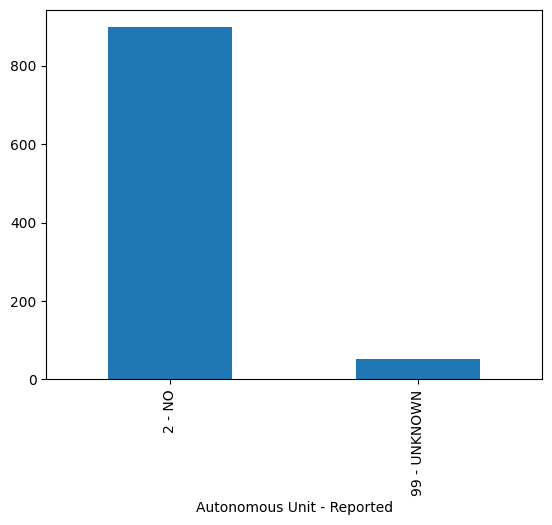

In [84]:
#Plotting the 'Autonomous Unit - Reported' in test DataFrame
regression_test['Autonomous Unit - Reported'].value_counts().plot(kind='bar')

In [85]:
# Mapping categorical values in the 'Autonomous Unit - Reported' column to numerical values for the training DataFrame
regression_train['Autonomous Unit - Reported'] = regression_train['Autonomous Unit - Reported'].map({ '2 - NO': 1, '99 - UNKNOWN': 0})

# Mapping categorical values in the 'Autonomous Unit - Reported' column to numerical values for the test DataFrame
regression_test['Autonomous Unit - Reported'] = regression_test['Autonomous Unit - Reported'].map({ '2 - NO': 1, '99 - UNKNOWN': 0})

##### Vehicle Damage Severity

In [86]:
# Checking the number of null values in the 'Vehicle Damage Rating 1 - Severity' column of the training DataFrame
regression_train['Vehicle Damage Rating 1 - Severity'].isnull().sum()

107

In [87]:
# Counting the occurrences of each unique value in the 'Vehicle Damage Rating 1 - Severity' column of the training DataFrame
regression_train['Vehicle Damage Rating 1 - Severity'].value_counts()

Vehicle Damage Rating 1 - Severity
2 - DAMAGED 2            1722
1 - DAMAGED 1 MINIMUM    1339
3 - DAMAGED 3            1141
4 - DAMAGED 4             418
No Data                   375
5 - DAMAGED 5             114
0 - NO DAMAGE             104
6 - DAMAGED 6              39
7 - DAMAGED 7 HIGHEST      17
Name: count, dtype: int64

In [88]:
# Filling missing values in the 'Vehicle Damage Rating 1 - Severity' column with '2 - DAMAGED 2'
regression_train.fillna({'Vehicle Damage Rating 1 - Severity': '2 - DAMAGED 2'}, inplace = True)

# Checking if there are still any null values in the 'Vehicle Damage Rating 1 - Severity' column
regression_train['Vehicle Damage Rating 1 - Severity'].isnull().sum()

0

In [89]:
# Replacing 'No Data' with '2 - DAMAGED 2' in the 'Vehicle Damage Rating 1 - Severity' column of the training DataFrame
regression_train['Vehicle Damage Rating 1 - Severity'] = regression_train['Vehicle Damage Rating 1 - Severity'].replace('No Data', '2 - DAMAGED 2')

# Counting the occurrences of each unique value in the 'Vehicle Damage Rating 1 - Severity' column
regression_train['Vehicle Damage Rating 1 - Severity'].value_counts()

Vehicle Damage Rating 1 - Severity
2 - DAMAGED 2            2204
1 - DAMAGED 1 MINIMUM    1339
3 - DAMAGED 3            1141
4 - DAMAGED 4             418
5 - DAMAGED 5             114
0 - NO DAMAGE             104
6 - DAMAGED 6              39
7 - DAMAGED 7 HIGHEST      17
Name: count, dtype: int64

<Axes: xlabel='Vehicle Damage Rating 1 - Severity'>

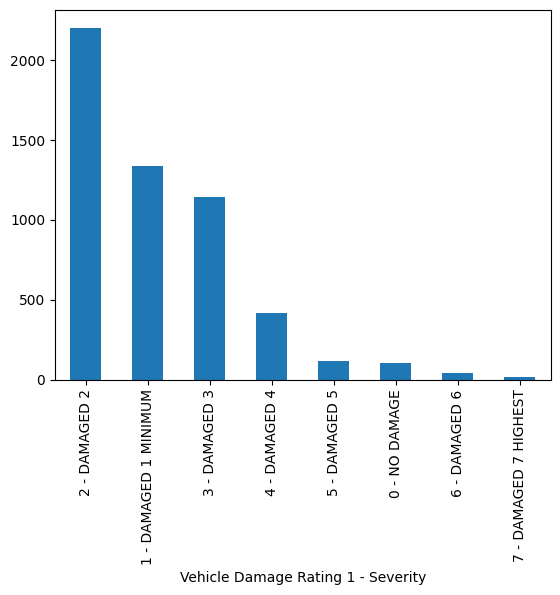

In [90]:
#Plotting the 'Vehicle Damage Rating 1 - Severity' in training DataFrame
regression_train['Vehicle Damage Rating 1 - Severity'].value_counts().plot(kind='bar')

In [91]:
# Checking the number of null values in the 'Vehicle Damage Rating 1 - Severity' column of the test DataFrame
regression_test['Vehicle Damage Rating 1 - Severity'].isnull().sum()

20

In [92]:
# Counting the occurrences of each unique value in the 'Vehicle Damage Rating 1 - Severity' column of the test DataFrame
regression_test['Vehicle Damage Rating 1 - Severity'].value_counts()

Vehicle Damage Rating 1 - Severity
2 - DAMAGED 2            307
3 - DAMAGED 3            239
1 - DAMAGED 1 MINIMUM    206
No Data                   64
4 - DAMAGED 4             62
5 - DAMAGED 5             23
0 - NO DAMAGE             20
6 - DAMAGED 6              5
7 - DAMAGED 7 HIGHEST      2
Name: count, dtype: int64

In [93]:
# Filling missing values in the 'Vehicle Damage Rating 1 - Severity' column with '2 - DAMAGED 2'
regression_test.fillna({'Vehicle Damage Rating 1 - Severity': '2 - DAMAGED 2'}, inplace = True)

# Checking if there are still any null values in the 'Vehicle Damage Rating 1 - Severity' column
regression_test['Vehicle Damage Rating 1 - Severity'].isnull().sum()

0

In [94]:
# Replacing 'No Data' with '2 - DAMAGED 2' in the 'Vehicle Damage Rating 1 - Severity' column of the test DataFrame
regression_test['Vehicle Damage Rating 1 - Severity'] = regression_test['Vehicle Damage Rating 1 - Severity'].replace('No Data', '2 - DAMAGED 2')

# Counting the occurrences of each unique value in the 'Vehicle Damage Rating 1 - Severity' column
regression_test['Vehicle Damage Rating 1 - Severity'].value_counts()

Vehicle Damage Rating 1 - Severity
2 - DAMAGED 2            391
3 - DAMAGED 3            239
1 - DAMAGED 1 MINIMUM    206
4 - DAMAGED 4             62
5 - DAMAGED 5             23
0 - NO DAMAGE             20
6 - DAMAGED 6              5
7 - DAMAGED 7 HIGHEST      2
Name: count, dtype: int64

<Axes: xlabel='Vehicle Damage Rating 1 - Severity'>

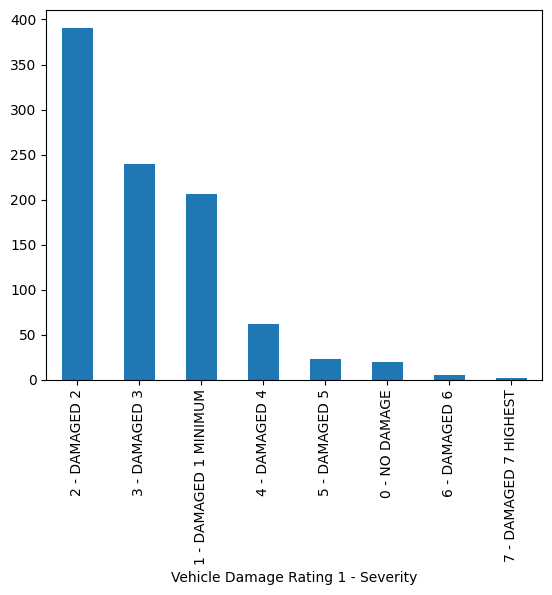

In [95]:
#Plotting the 'Vehicle Damage Rating 1 - Severity' in test DataFrame
regression_test['Vehicle Damage Rating 1 - Severity'].value_counts().plot(kind='bar')

In [96]:
# Mapping categorical values in the 'Vehicle Damage Rating 1 - Severity' column to numerical values for the training DataFrame
regression_train['Vehicle Damage Rating 1 - Severity'] = regression_train['Vehicle Damage Rating 1 - Severity'].map({'0 - NO DAMAGE': 0, 
                                                                                                                     '1 - DAMAGED 1 MINIMUM': 1, 
                                                                                                                     '2 - DAMAGED 2': 2, 
                                                                                                                     '3 - DAMAGED 3': 3, 
                                                                                                                     '4 - DAMAGED 4': 4,
                                                                                                                     '5 - DAMAGED 5': 5, 
                                                                                                                     '6 - DAMAGED 6': 6,
                                                                                                                     '7 - DAMAGED 7 HIGHEST': 7})

# Mapping categorical values in the 'Vehicle Damage Rating 1 - Severity' column to numerical values for the test DataFrame
regression_test['Vehicle Damage Rating 1 - Severity'] = regression_test['Vehicle Damage Rating 1 - Severity'].map({'0 - NO DAMAGE': 0, 
                                                                                                                     '1 - DAMAGED 1 MINIMUM': 1, 
                                                                                                                     '2 - DAMAGED 2': 2, 
                                                                                                                     '3 - DAMAGED 3': 3, 
                                                                                                                     '4 - DAMAGED 4': 4,
                                                                                                                     '5 - DAMAGED 5': 5, 
                                                                                                                     '6 - DAMAGED 6': 6,
                                                                                                                     '7 - DAMAGED 7 HIGHEST': 7})

##### Vehicle Model Year

In [97]:
# Checking the number of null values in the 'Vehicle Model Year' column of the training DataFrame
regression_train['Vehicle Model Year'].isnull().sum()

103

In [98]:
# Counting the occurrences of each unique value in the 'Vehicle Model Year' column of the training DataFrame
regression_train['Vehicle Model Year'].value_counts()

Vehicle Model Year
2018       376
2016       349
2019       334
2017       319
No Data    318
2020       314
2022       292
2015       291
2021       275
2013       270
2023       260
2014       255
2012       213
2010       175
2007       152
2011       148
2009       142
2006       141
2008       128
2004       101
2005        84
2003        69
2002        51
2001        49
2024        39
2000        37
1999        26
1998        15
1996        13
1997        11
1995        10
1990         4
1991         2
1970         2
1989         2
1993         1
1994         1
1992         1
1978         1
1980         1
1984         1
Name: count, dtype: int64

In [99]:
# Replace 'No Data' with NaN
regression_train['Vehicle Model Year'] = regression_train['Vehicle Model Year'].replace('No Data', np.nan)

# Convert 'Vehicle Model Year' to numeric
regression_train['Vehicle Model Year'] = pd.to_numeric(regression_train['Vehicle Model Year'])

# Group by 'Crash Date' and fill missing values with mode
regression_train['Vehicle Model Year'] = regression_train.groupby('Crash Date')['Vehicle Model Year'].transform(lambda x: x.fillna(x.mode().iloc[0]))

regression_train['Vehicle Model Year'].isnull().sum()

0

In [100]:
import datetime

# Subtract 'Vehicle Model Year' from the current year to get the age of the vehicle
regression_train['Vehicle Age'] = datetime.datetime.now().year - regression_train['Vehicle Model Year']

# Drop the original 'Vehicle Model Year' column
regression_train.drop(columns=['Vehicle Model Year'], inplace=True)

In [101]:
# Checking the number of null values in the 'Vehicle Model Year' column of the test DataFrame
regression_test['Vehicle Model Year'].isnull().sum()

12

In [102]:
# Replace 'No Data' with NaN
regression_test['Vehicle Model Year'] = regression_test['Vehicle Model Year'].replace('No Data', np.nan)

# Convert 'Vehicle Model Year' to numeric
regression_test['Vehicle Model Year'] = pd.to_numeric(regression_test['Vehicle Model Year'])

# Group by 'Crash Date' and fill missing values with mode
regression_test['Vehicle Model Year'] = regression_test.groupby('Crash Date')['Vehicle Model Year'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

In [103]:
# Checking the number of null values in the 'Vehicle Model Year' column of the test DataFrame
regression_test['Vehicle Model Year'].isnull().sum()

0

In [104]:
# Filling missing values in the 'Vehicle Model Year' column of the test DataFrame with the mode
regression_test.fillna({'Vehicle Model Year': regression_test['Vehicle Model Year'].mode()[0]}, inplace = True)

# Checking if there are still any null values in the 'Vehicle Model Year' column
regression_test['Vehicle Model Year'].isnull().sum()

0

In [105]:
import datetime

# Subtract 'Vehicle Model Year' from the current year to get the age of the vehicle
regression_test['Vehicle Age'] = datetime.datetime.now().year - regression_test['Vehicle Model Year']

# Drop the original 'Vehicle Model Year' column
regression_test.drop(columns=['Vehicle Model Year'], inplace=True)

##### Person Age

In [106]:
# Counting the occurrences of each unique value in the 'Person Age' column of the training DataFrame
regression_train['Person Age'].value_counts()

Person Age
No Data    334
21         230
19         218
20         196
22         187
          ... 
89           4
85           4
88           2
91           2
93           1
Name: count, Length: 94, dtype: int64

In [107]:
# Replacing 'No Data' with NaN in the 'Person Age' column of the training DataFrame
regression_train['Person Age'] = regression_train['Person Age'].replace('No Data', np.nan)

# Checking the number of null values in the 'Person Age' column
regression_train['Person Age'].isnull().sum()

453

In [108]:
# Converting the 'Person Age' column to numeric type in the training DataFrame
regression_train['Person Age'] = pd.to_numeric(regression_train['Person Age'])

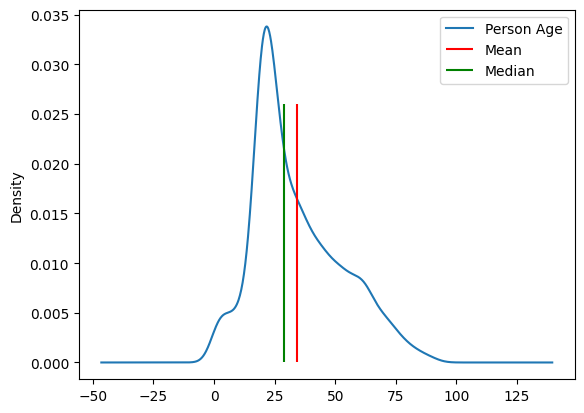

In [109]:
# Plotting kernel density estimate (KDE) of the 'Person Age' column
regression_train['Person Age'].plot(kind = 'kde')

# Plotting vertical lines for mean and median
plt.vlines(regression_train['Person Age'].mean(), ymin = 0, ymax = 0.026, color = 'r', label = 'Mean')
plt.vlines(regression_train['Person Age'].median(), ymin = 0, ymax = 0.026, color = 'g', label = 'Median')

# Adding the legend
plt.legend()

Since the median is closer to center, we are using median to replace the null values.

In [110]:
# Filling missing values in the 'Person Age' column with the median value
regression_train.fillna({'Person Age': regression_train['Person Age'].median()}, inplace = True)

# Checking if there are still any null values in the 'Person Age' column
regression_train['Person Age'].isnull().sum()

0

In [111]:
# Counting the occurrences of each unique value in the 'Person Age' column of the test DataFrame
regression_test['Person Age'].value_counts()

Person Age
No Data    58
21         49
19         46
20         37
22         34
           ..
86          1
83          1
48          1
81          1
72          1
Name: count, Length: 88, dtype: int64

In [112]:
# Replacing 'No Data' with NaN in the 'Person Age' column of the test DataFrame
regression_test['Person Age'] = regression_test['Person Age'].replace('No Data', np.nan)

# Checking the number of null values in the 'Person Age' column
regression_test['Person Age'].isnull().sum()

77

In [113]:
# Converting the 'Person Age' column to numeric type in the test DataFrame
regression_test['Person Age'] = pd.to_numeric(regression_test['Person Age'])

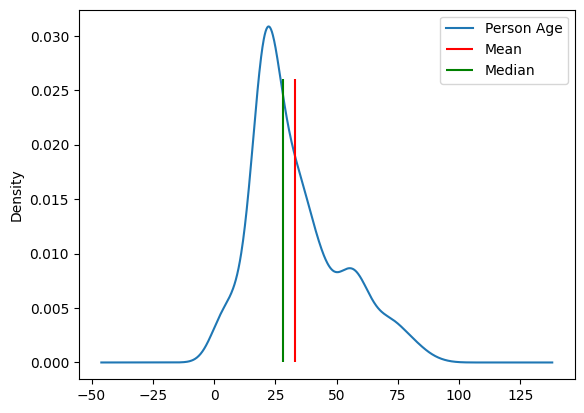

In [114]:
# Plotting kernel density estimate (KDE) of the 'Person Age' column in the test DataFrame
regression_test['Person Age'].plot(kind = 'kde')

# Plotting vertical lines for mean and median
plt.vlines(regression_test['Person Age'].mean(), ymin = 0, ymax = 0.026, color = 'r', label = 'Mean')
plt.vlines(regression_test['Person Age'].median(), ymin = 0, ymax = 0.026, color = 'g', label = 'Median')

# Adding legend
plt.legend()

In [115]:
# Filling missing values in the 'Person Age' column of the test DataFrame with the median value from the training DataFrame
regression_test.fillna({'Person Age': regression_train['Person Age'].median()}, inplace = True)

# Checking if there are still any null values in the 'Person Age' column
regression_test['Person Age'].isnull().sum()

0

##### Person Alcohol Result

In [116]:
# Counting the occurrences of each unique value in the 'Person Alcohol Result' column of the training DataFrame
regression_train['Person Alcohol Result'].value_counts()

Person Alcohol Result
No Data         5262
1 - POSITIVE      15
2 - NEGATIVE       8
Name: count, dtype: int64

'Person Alcohol Result' contains 5262 out of 5376 entries labeled as 'No Data'. Since this column doesn't provide meaningful information for analysis due to the high number of missing values, dropping this column.

In [117]:
# Dropping the 'Person Alcohol Result' column from both the training and test DataFrames
regression_train.drop('Person Alcohol Result', axis = 1, inplace = True)
regression_test.drop('Person Alcohol Result', axis = 1, inplace = True)

##### Person Drug Test Result

In [118]:
# Counting the occurrences of each unique value in the 'Person Drug Test Result' column of the training DataFrame
regression_train['Person Drug Test Result'].value_counts()

Person Drug Test Result
97 - NOT APPLICABLE    3832
No Data                1347
99 - UNKNOWN             61
1 - POSITIVE              5
2 - NEGATIVE              4
Name: count, dtype: int64

Person Drug Test Result has 5 positive and 4 negative values, all the others are either NO Data, 99 - UNKNOWN and 97 - NOT APPLICABLE.  
As it might not provide any information, dropping the column.

In [119]:
# Dropping the 'Person Drug Test Result' column from both the training and test DataFrames
regression_train.drop('Person Drug Test Result', axis = 1, inplace = True)
regression_test.drop('Person Drug Test Result', axis = 1, inplace = True)

##### Person Ethnicity

In [120]:
regression_train['Person Ethnicity'].isnull().sum()

0

In [121]:
regression_train['Person Ethnicity'].value_counts()

Person Ethnicity
W - WHITE                          2720
H - HISPANIC                       1091
B - BLACK                           753
99 - UNKNOWN                        347
A - ASIAN                           277
No Data                              91
Unknown                              41
I - AMER. INDIAN/ALASKAN NATIVE      35
98 - OTHER                           21
Name: count, dtype: int64

In [122]:
# Replace 'No Data', 'Unknown', and '99 - UNKNOWN' with 'W - WHITE' in the 'Person Ethnicity' column of the training DataFrame
regression_train['Person Ethnicity'] = regression_train['Person Ethnicity'].replace(['No Data', 'Unknown', '99 - UNKNOWN'], 'W - WHITE')

# Count the occurrences of each unique value in the 'Person Ethnicity' column
regression_train['Person Ethnicity'].value_counts()

Person Ethnicity
W - WHITE                          3199
H - HISPANIC                       1091
B - BLACK                           753
A - ASIAN                           277
I - AMER. INDIAN/ALASKAN NATIVE      35
98 - OTHER                           21
Name: count, dtype: int64

<Axes: xlabel='Person Ethnicity'>

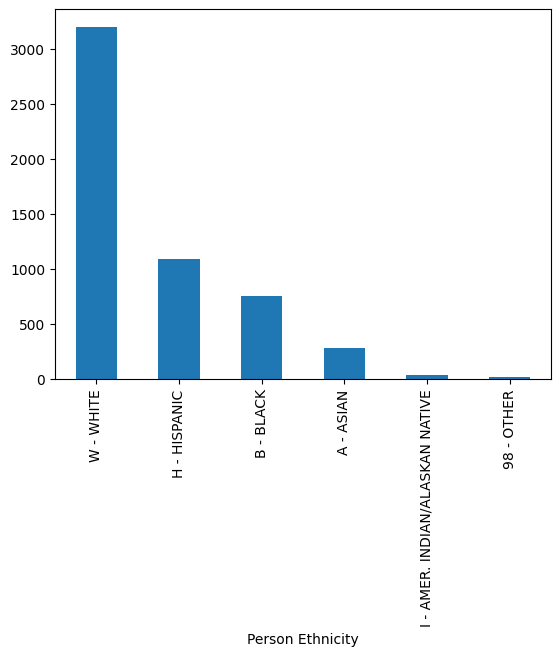

In [123]:
#Plotting the 'Person Ethnicity' in training DataFrame
regression_train['Person Ethnicity'].value_counts().plot(kind='bar')

In [124]:
# Replace 'No Data', 'Unknown', and '99 - UNKNOWN' with 'W - WHITE' in the 'Person Ethnicity' column of the test DataFrame
regression_test['Person Ethnicity'] = regression_test['Person Ethnicity'].replace(['No Data', 'Unknown', '99 - UNKNOWN'], 'W - WHITE')

# Count the occurrences of each unique value in the 'Person Ethnicity' column
regression_test['Person Ethnicity'].value_counts()

Person Ethnicity
W - WHITE                          553
H - HISPANIC                       190
B - BLACK                          134
A - ASIAN                           58
98 - OTHER                           9
I - AMER. INDIAN/ALASKAN NATIVE      4
Name: count, dtype: int64

<Axes: xlabel='Person Ethnicity'>

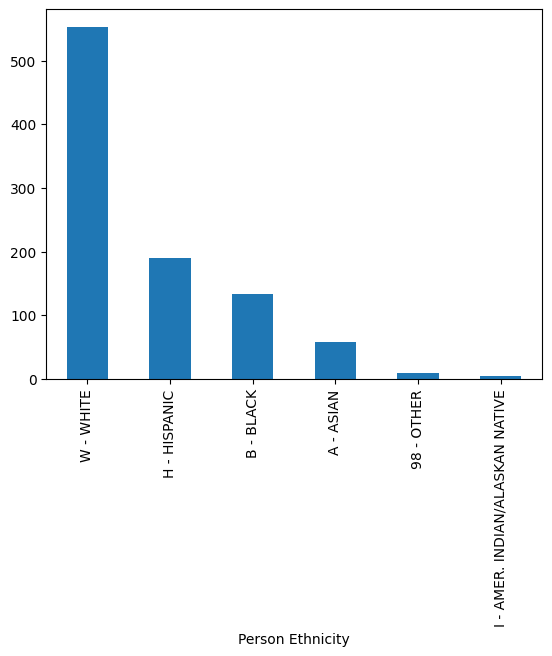

In [125]:
#Plotting the 'Person Ethnicity' in test DataFrame
regression_test['Person Ethnicity'].value_counts().plot(kind='bar')

In [126]:
# Creating dummy variables for 'Person Ethnicity' column in the training DataFrame
cols_for_dummies = pd.get_dummies(regression_train['Person Ethnicity'], prefix= 'Ethnicity')
regression_train[cols_for_dummies.columns] = cols_for_dummies

# Creating dummy variables for 'Person Ethnicity' column in the test DataFrame
cols_for_dummies_test = pd.get_dummies(regression_test['Person Ethnicity'], prefix= 'Ethnicity')
regression_test[cols_for_dummies_test.columns] = cols_for_dummies_test

In [127]:
# Dropping the 'Person Ethnicity' column from both the training and test DataFrames
regression_train.drop('Person Ethnicity', axis = 1, inplace = True)
regression_test.drop('Person Ethnicity', axis = 1, inplace = True)

In [128]:
# Dictionary for renaming columns
columns_mapping = {
    'Ethnicity_98 - OTHER': 'Ethnicity_OTHER',
    'Ethnicity_A - ASIAN': 'Ethnicity_ASIAN',
    'Ethnicity_B - BLACK': 'Ethnicity_BLACK',
    'Ethnicity_H - HISPANIC': 'Ethnicity_HISPANIC',
    'Ethnicity_I - AMER. INDIAN/ALASKAN NATIVE': 'Ethnicity_AMER_INDIAN_ALASKAN_NATIVE',
    'Ethnicity_W - WHITE': 'Ethnicity_WHITE'
}

# Renaming columns in regression_test DataFrame
regression_test.rename(columns=columns_mapping, inplace=True)

# Renaming columns in regression_train DataFrame
regression_train.rename(columns=columns_mapping, inplace=True)

##### Person Gender

In [129]:
# Checking the number of null values in the 'Person Gender' column of the training DataFrame
regression_train['Person Gender'].isnull().sum()

108

In [130]:
# Counting the occurrences of each unique value in the 'Person Gender' column of the training DataFrame
regression_train['Person Gender'].value_counts()

Person Gender
1 - MALE        2708
2 - FEMALE      2262
99 - UNKNOWN     298
Name: count, dtype: int64

In [131]:
# Filling missing values in the 'Person Gender' column with '1 - MALE'
regression_train.fillna({'Person Gender': '1 - MALE'}, inplace = True)

# Replacing '99 - UNKNOWN' with '1 - MALE' in the 'Person Gender' column
regression_train['Person Gender'] = regression_train['Person Gender'].replace('99 - UNKNOWN', '1 - MALE')

# Checking if there are still any null values in the 'Person Gender' column
regression_train['Person Gender'].isnull().sum()

0

In [132]:
# Counting the occurrences of each unique value in the 'Person Gender' column of the training DataFrame
regression_train['Person Gender'].value_counts()

Person Gender
1 - MALE      3114
2 - FEMALE    2262
Name: count, dtype: int64

<Axes: xlabel='Person Gender'>

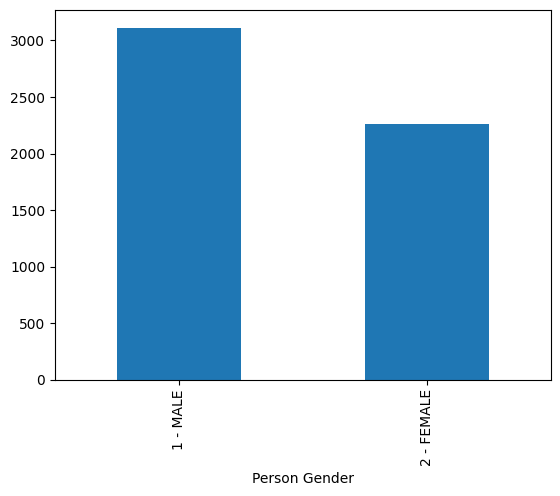

In [133]:
#Plotting the 'Person Gender' in training DataFrame
regression_train['Person Gender'].value_counts().plot(kind='bar')

In [134]:
# Check the number of null values in the 'Person Gender' column of the test DataFrame
regression_test['Person Gender'].isnull().sum()

22

In [135]:
# Filling missing values in the 'Person Gender' column of the test DataFrame with '1 - MALE'
regression_test.fillna({'Person Gender': '1 - MALE'}, inplace = True)

# Replacing '99 - UNKNOWN' with '1 - MALE' in the 'Person Gender' column
regression_test['Person Gender'] = regression_test['Person Gender'].replace('99 - UNKNOWN', '1 - MALE')

# Checking if there are still any null values in the 'Person Gender' column
regression_test['Person Gender'].isnull().sum()

0

In [136]:
# Counting the occurrences of each unique value in the 'Person Gender' column of the test DataFrame
regression_test['Person Gender'].value_counts()

Person Gender
1 - MALE      551
2 - FEMALE    397
Name: count, dtype: int64

<Axes: xlabel='Person Gender'>

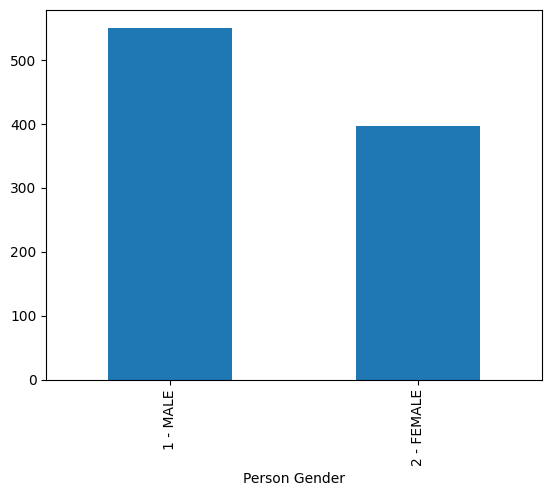

In [137]:
#Plotting the 'Person Gender' in test DataFrame
regression_test['Person Gender'].value_counts().plot(kind='bar')

In [138]:
# Mapping categorical values in the 'Person Gender' column to numerical values for the training DataFrame
regression_train['Person Gender'] = regression_train['Person Gender'].map({'1 - MALE': 1, '2 - FEMALE' : 0})

# Mapping categorical values in the 'Person Gender' column to numerical values for the test DataFrame
regression_test['Person Gender'] = regression_test['Person Gender'].map({'1 - MALE': 1, '2 - FEMALE' : 0})

We have boolean columns in our dataframe which are a result of one-hot vector encoding, converting all the boolean columns to integer for further analysis.

In [139]:
# Converting boolean columns to integer type for the training DataFrame
bool_cols = ['Ethnicity_OTHER', 'Ethnicity_ASIAN', 'Ethnicity_BLACK', 'Ethnicity_HISPANIC', 'Ethnicity_AMER_INDIAN_ALASKAN_NATIVE', 'Ethnicity_WHITE']
regression_train[bool_cols] = regression_train[bool_cols].astype(int)

# Converting boolean columns to integer type for the test DataFrame
regression_test[bool_cols] = regression_test[bool_cols].astype(int)

##### Extracting new columns from Date and Time fields

In [140]:
# Extracting month and day from datetime columns in training data
regression_train['Crash Month'] = regression_train['Crash Date'].dt.month
regression_train['Crash Day'] = regression_train['Crash Date'].dt.day

# Extracting month and day from datetime column in test data
regression_test['Crash Month'] = regression_test['Crash Date'].dt.month
regression_test['Crash Day'] = regression_test['Crash Date'].dt.day

# Dropping original datetime columns from training data
regression_train.drop(columns=['Crash Date', 'Crash Time', 'Time Roadway Cleared'], inplace=True)

# Dropping original datetime column from test data
regression_test.drop(columns=['Crash Date'], inplace=True)

In [141]:
# Printing information about the training DataFrame
print(regression_train.info())

# Printing information about the test DataFrame
print(regression_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crash ID                              5376 non-null   float64
 1   Crash Severity                        5376 non-null   int64  
 2   Weather Condition                     5376 non-null   int64  
 3   Autonomous Level Engaged              5376 non-null   int64  
 4   Autonomous Unit - Reported            5376 non-null   int64  
 5   Vehicle Damage Rating 1 - Severity    5376 non-null   int64  
 6   Person Age                            5376 non-null   float64
 7   Person Gender                         5376 non-null   int64  
 8   Time to Clear Roadway                 5376 non-null   float64
 9   Friday                                5376 non-null   int32  
 10  Monday                                5376 non-null   int32  
 11  Saturday         

### Clustering

#### Scaling the dataset

Scaling is a critical data preprocessing step in machine learning, particularly for distance-based algorithms and optimization methods. It ensures all features contribute equally by bringing them to a similar magnitude. This improves the performance and convergence of algorithms sensitive to scale, like K-Means and gradient descent. Additionally, scaling enhances the interpretability of model coefficients and feature importance, and ensures consistent application of regularization techniques.

In [142]:
# Separating features and target variable
X = regression_train.drop(['Time to Clear Roadway'], axis = 1)
y = regression_train['Time to Clear Roadway']
X_test = regression_test.copy()

In [143]:
print(X.shape, y.shape, X_test.shape)

(5376, 24) (5376,) (948, 24)


<Figure size 640x480 with 0 Axes>

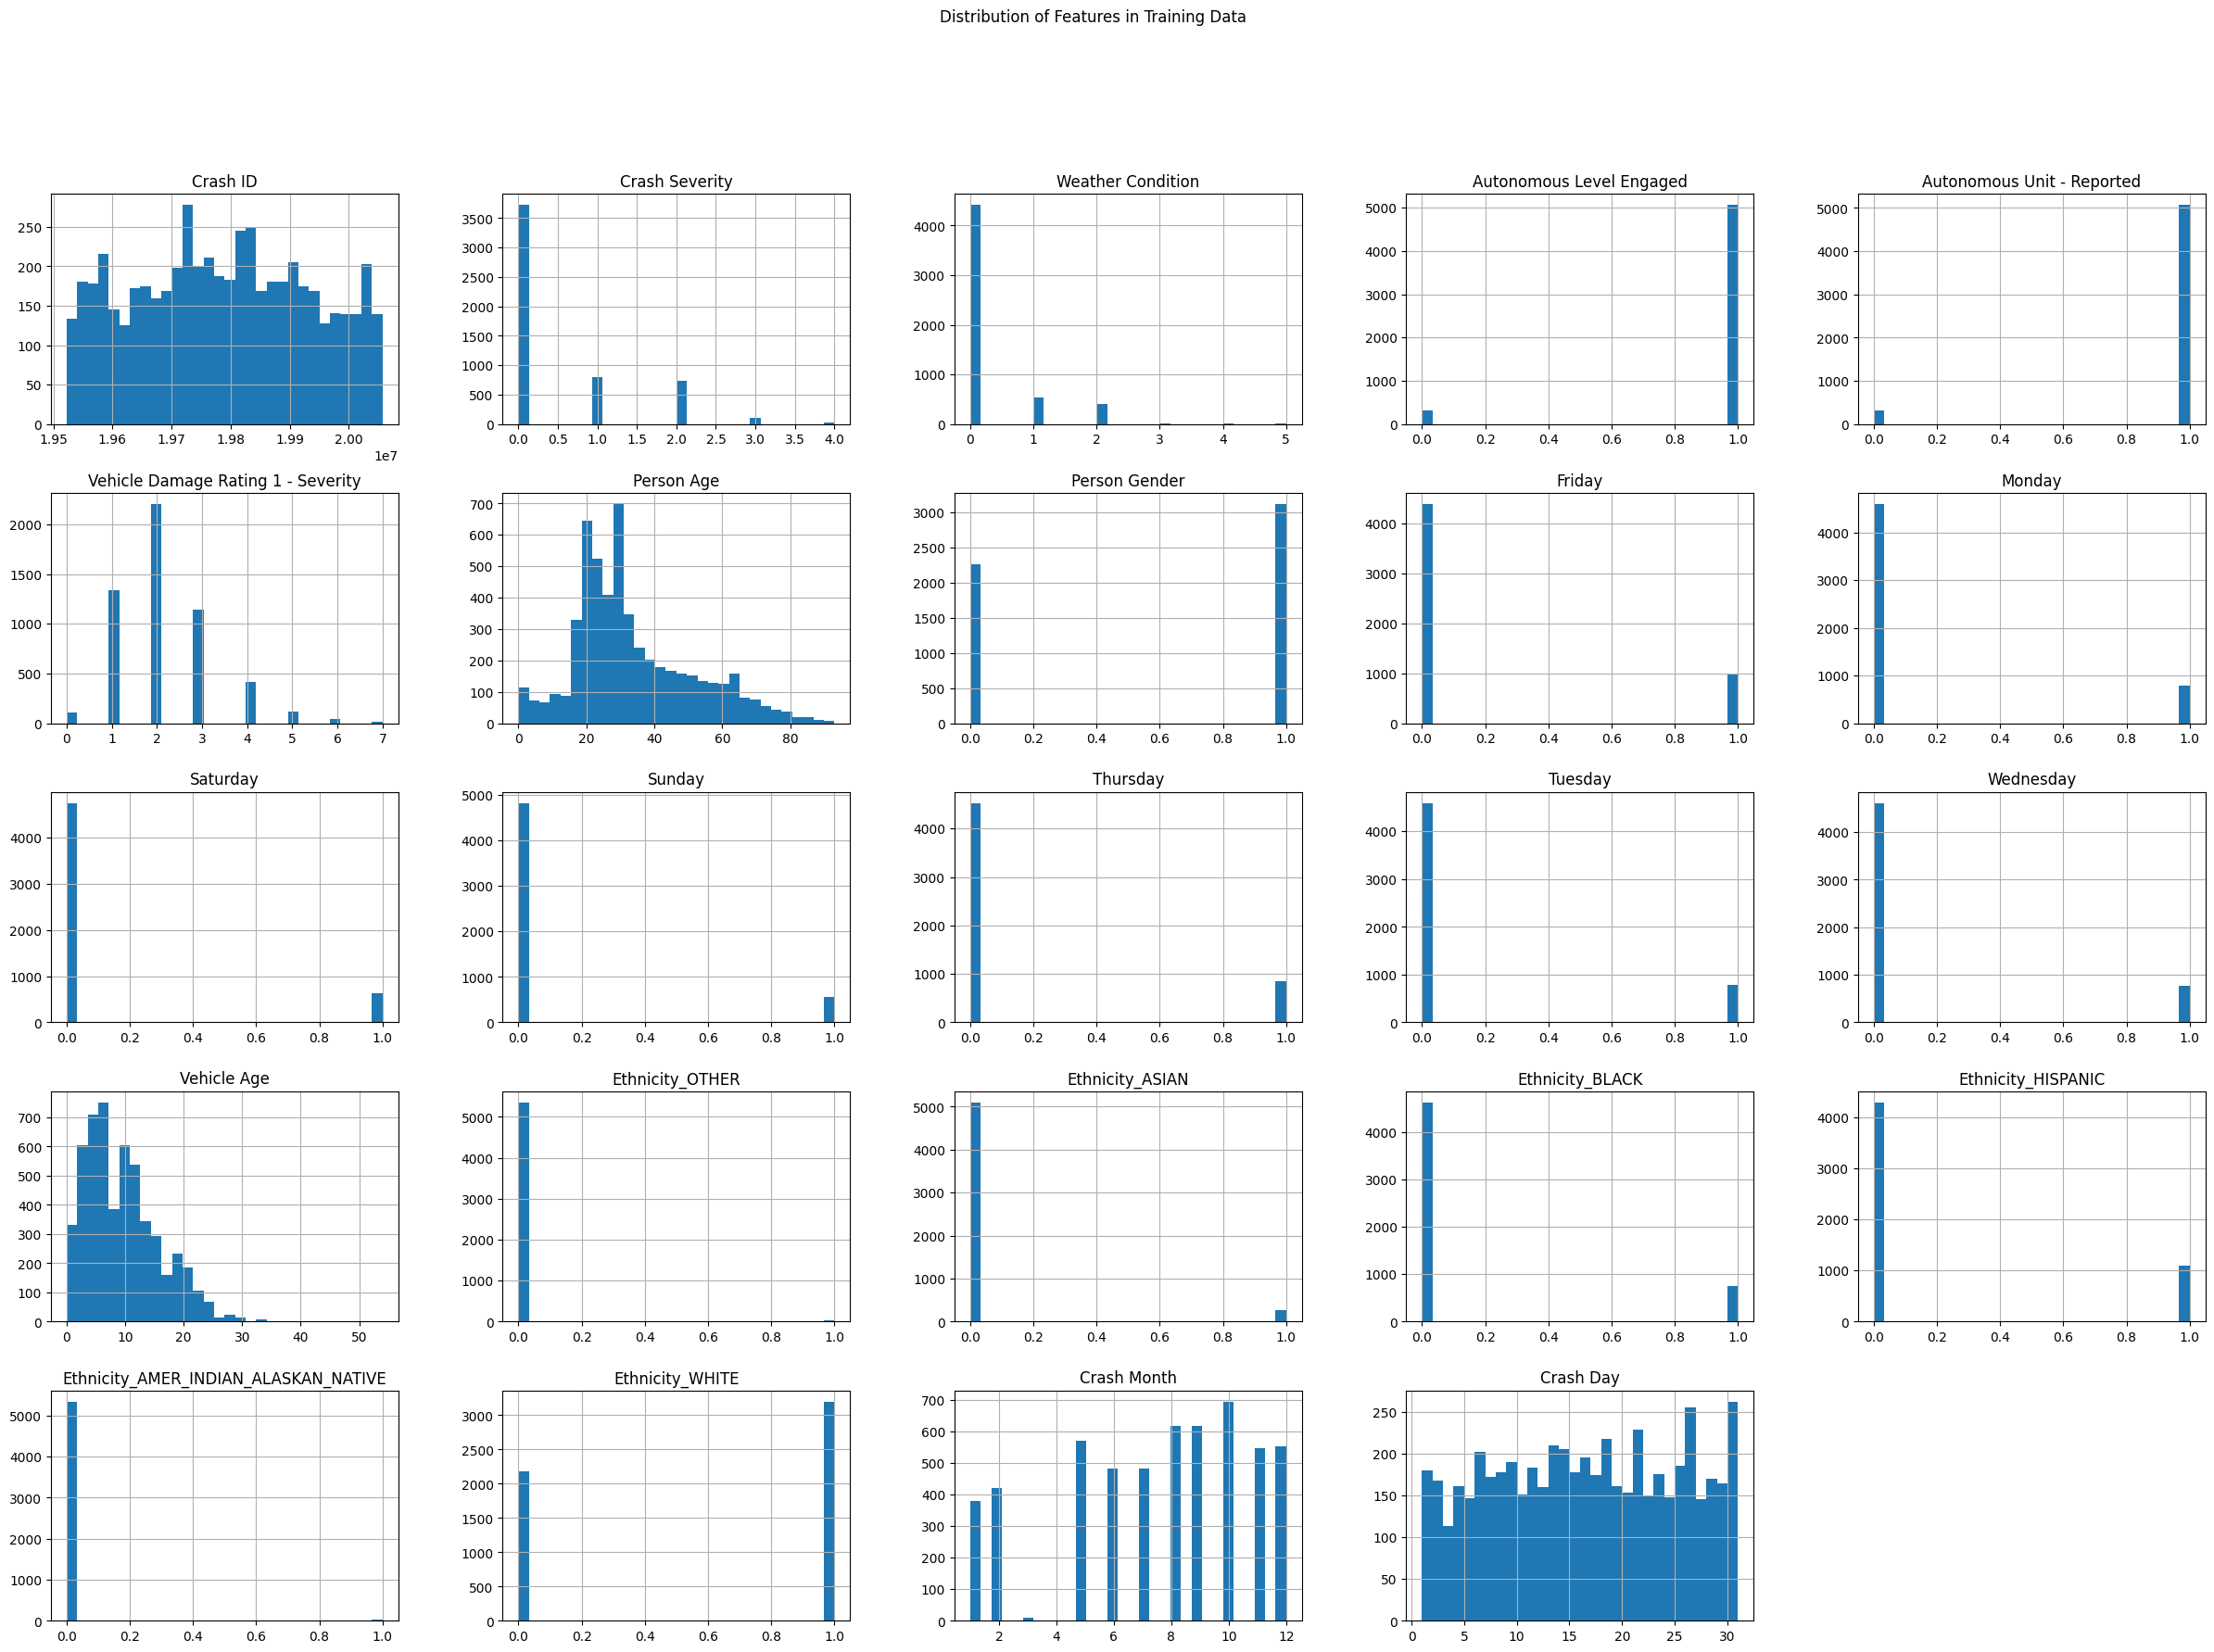

In [144]:
#PLotting histograms of training data features
plt.subplots_adjust(left=0.1, bottom=1.3, right=0.9, top=1.5, wspace=0.4, hspace=0.5)
X.hist(bins=30, figsize=(30, 20))
plt.suptitle("Distribution of Features in Training Data")
plt.show()

##### Selecting MinMaxScalar for Scaling:  
For this dataset, MinMaxScaler was chosen as the scaling method. MinMaxScaler scales the features to a fixed range (0-1) regardless of the original distribution. 
1) This ensures all features contribute more equally to the regression process removing the influence of skewed features.
2) Since the data distributions are non-normal, MinMaxScaler offers a more appropriate approach as StandardScaler assumes normality. By transforming the data to a fixed range, MinMaxScaler ensures all features are treated fairly.
3) This scaler is more suitable as it compresses the data into a fixed range, regardless of the original distribution.

By using MinMaxScaler, we ensure that our dataset is appropriately scaled, making it suitable for training machine learning models.

In [145]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMaxScaler object
scaler = MinMaxScaler()

# Fitting the scaler on the training data and transforming the training data
scaler.fit(X)
X_scaled = scaler.transform(X)
X_train_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Transforming the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Clustering is an unsupervised learning technique that aims to uncover significant patterns within datasets by grouping data points into distinct clusters.  
Clustering helps identifying data patterns, for feature engineering, for segementation and outlier detections.


##### Agglomerative CLustering: 

Using silhouette score to find the optimal number of clusters for the data.

In [146]:
# Importing necessary libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# list to store silhouette scores
silhouette_scores_agg_reg = []

# Range of cluster sizes
cluster_range = range(2, 11)

# Iterating through cluster sizes
for n_clusters in cluster_range:
    # Initializing and fitting Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    agg_clustering.fit(X_train_scaled)
    
    # Calculating silhouette score
    silhouette_avg = silhouette_score(X_train_scaled, agg_clustering.labels_)
    silhouette_scores_agg_reg.append(silhouette_avg)

# Finding the best number of clusters based on silhouette score
best_n_clusters_agg_reg = silhouette_scores_agg_reg.index(max(silhouette_scores_agg_reg)) + 2
high_sil_score_agg_reg = max(silhouette_scores_agg_reg)

# Printing the best number of clusters and the corresponding silhouette score
print("Best number of clusters:", best_n_clusters_agg_reg)
print("Highest silhouette score:", high_sil_score_agg_reg)

Best number of clusters: 10
Highest silhouette score: 0.2329352754913943


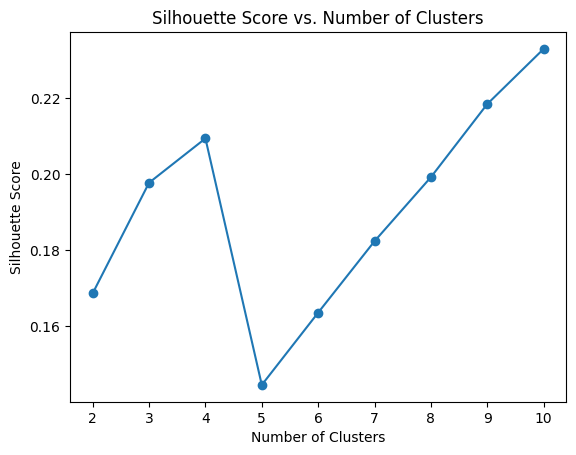

In [147]:
# Plotting silhouette scores against the number of clusters
plt.plot(cluster_range, silhouette_scores_agg_reg, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [148]:
# Importing Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Creating an instance of Agglomerative Clustering with 7 clusters and using Ward linkage
agg_clstr_model = AgglomerativeClustering(n_clusters=10, linkage='ward')

# Fitting the model to the scaled training data
agg_clstr_model = agg_clstr_model.fit(X_train_scaled)

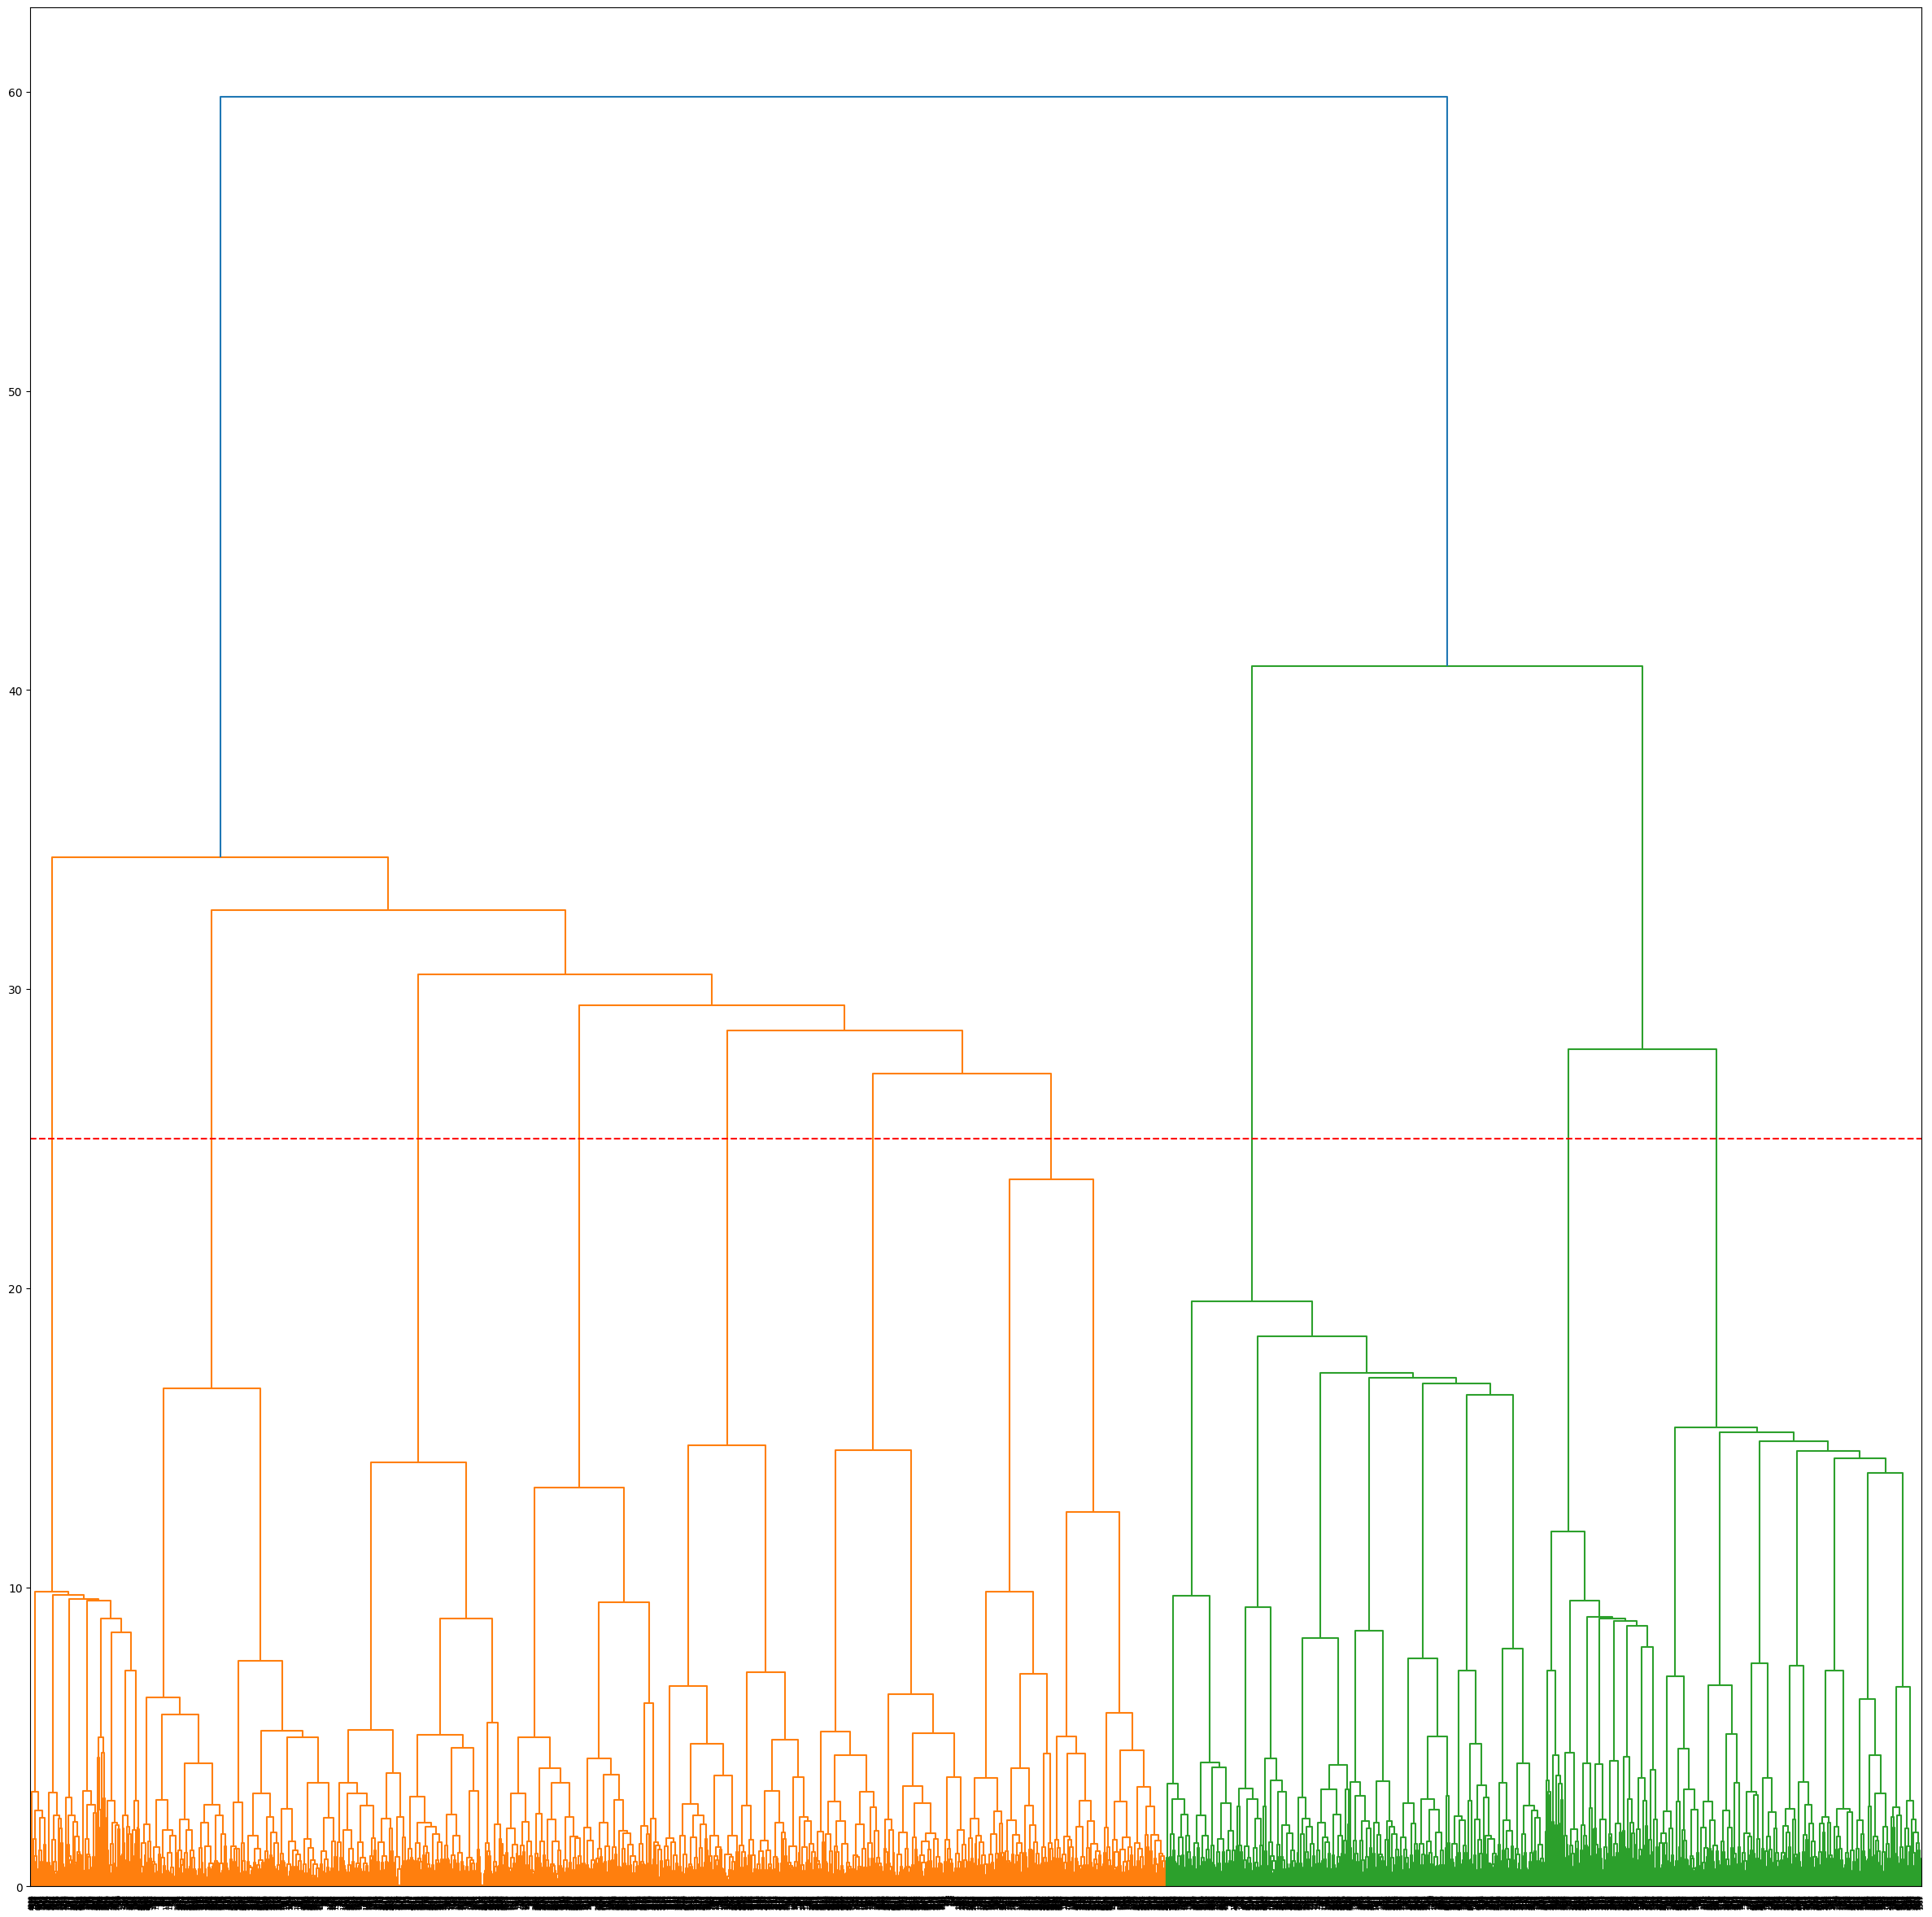

In [149]:
# Importing required libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Plotting dendrogram
plt.subplots(figsize=(30, 30))
dendrogram(linkage(X_train_scaled, method='ward'))

# Adding a horizontal line to mark the threshold distance for 8 clusters
plt.axhline(y=25, c='r', linestyle='--')

# Displaying the plot
plt.show()

Data points that are merged closer have similar properties.   
 The height of a branch represents the dissimilarity between the data points or clusters it connects. Higher distances indicate less similarity   is.

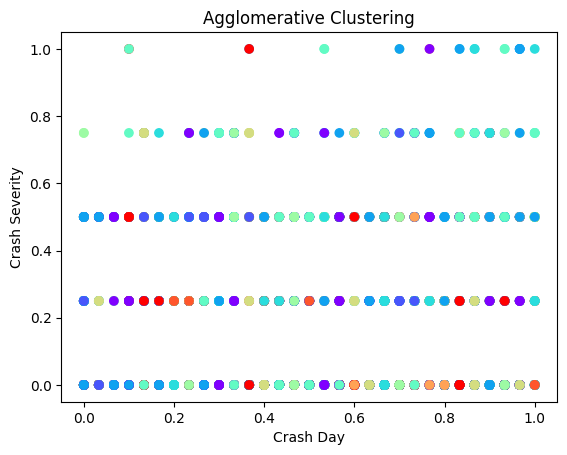

In [150]:
# Fitting the model to the scaled training data and getting cluster labels
agg_clstr_model_labels = agg_clstr_model.fit_predict(X_train_scaled)

# Plotting clusters based on 'Crash Day' and 'Crash Severity' features
plt.scatter(X_train_scaled['Crash Day'], X_train_scaled['Crash Severity'], c=agg_clstr_model_labels, cmap='rainbow')
plt.xlabel('Crash Day')
plt.ylabel('Crash Severity')
plt.title('Agglomerative Clustering')
plt.show()

Since it is hard to understand the structure of entire data using individual columns reducing the dimensionality of data using Principal Componenet Analysis and visualizing the clusters in the reduced feature space using a scatter plot.


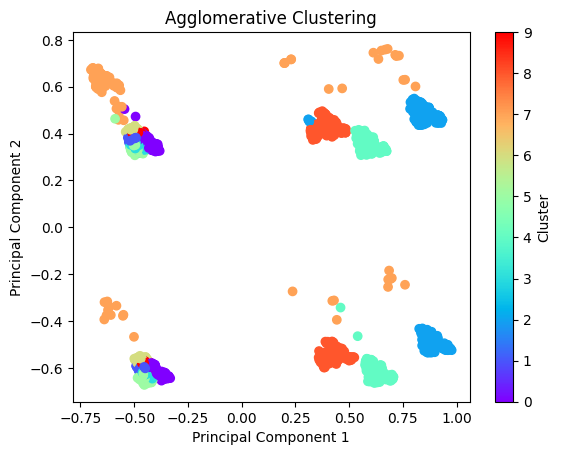

In [151]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Reducing dimensionality using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Applying Agglomerative Clustering
agg_clstr_model = AgglomerativeClustering(n_clusters=10, linkage='ward')
agg_clstr_model_labels = agg_clstr_model.fit_predict(X_train_scaled)

# Visualizing clusters based on reduced feature space
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=agg_clstr_model_labels, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering')
plt.colorbar(label='Cluster')
plt.show()

The clusters are well-separated and the physical seperation can be clearly seen which it suggests that there are distinct groups of data points with different characteristics in our data and that can be used as a basis for analysis.

##### KMeans CLustering: 

In [152]:
# Importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# List to store silhouette scores
silhouette_scores_kmeans_reg = []

# Range of cluster sizes
cluster_range = range(2, 11)

# Iterating through cluster sizes
for n_clusters in cluster_range:
    # Initializing and fitting KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_scaled)
    
    # Calculating silhouette score
    silhouette_avg = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores_kmeans_reg.append(silhouette_avg)

# Finding the best number of clusters based on silhouette score
best_n_clusters_kmeans_reg = silhouette_scores_kmeans_reg.index(max(silhouette_scores_kmeans_reg)) + 2
high_sil_score_kmeans_reg = max(silhouette_scores_kmeans_reg)

# Printing the best number of clusters and the corresponding silhouette score
print("Best number of clusters (KMeans):", best_n_clusters_kmeans_reg)
print("Highest silhouette score (KMeans):", high_sil_score_kmeans_reg)

Best number of clusters (KMeans): 9
Highest silhouette score (KMeans): 0.23335293346945066


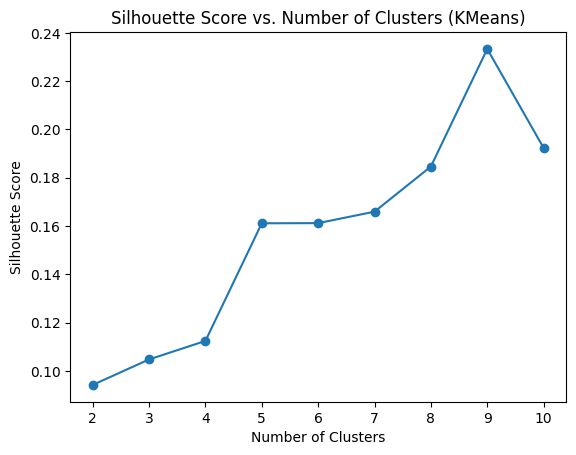

In [153]:
# Plotting silhouette score vs. number of clusters
plt.plot(cluster_range, silhouette_scores_kmeans_reg, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (KMeans)')
plt.show()

In [154]:
from sklearn.cluster import KMeans

# Fitting KMeans clustering with the optimal number of clusters
kmeans_clstr_model = KMeans(n_clusters=best_n_clusters_kmeans_reg, random_state=42)
kmeans_clstr_model.fit(X_train_scaled)

# Getting the cluster labels
kmeans_labels_reg = kmeans_clstr_model.labels_

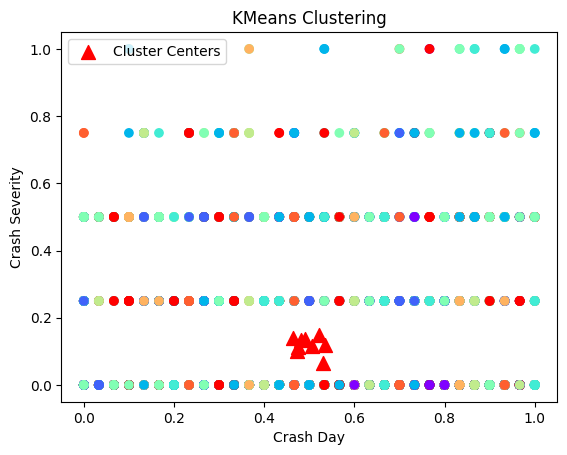

In [155]:
# Plotting clusters based on 'Crash Day' and 'Crash Severity' features
plt.scatter(X_train_scaled['Crash Day'], X_train_scaled['Crash Severity'], c=kmeans_labels_reg, cmap='rainbow')
plt.scatter(kmeans_clstr_model.cluster_centers_[:, 0], kmeans_clstr_model.cluster_centers_[:, 1],s=100, marker='^', c='red', label='Cluster Centers')
plt.xlabel('Crash Day')
plt.ylabel('Crash Severity')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

It is hard to analyze the entire data and the clusters with visualizing 2 features and their centriods. So, performing dimensionality reduction using PCA and understanding the structure.

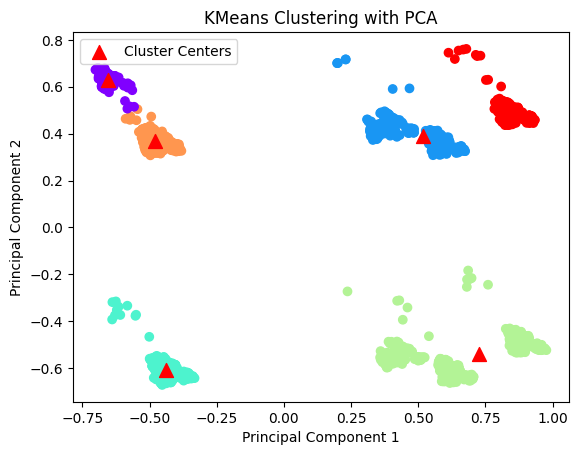

In [156]:
from sklearn.decomposition import PCA

# Fitting PCA to scaled training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Apply KMeans clustering to transformed data
model_KMeans_pca = KMeans(n_clusters=6, random_state=42)
model_KMeans_pca.fit(X_train_pca)
kmeans_labels_reg_pca = model_KMeans_pca.labels_

# Plotting clusters based on principal components
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans_labels_reg_pca, cmap='rainbow')
plt.scatter(model_KMeans_pca.cluster_centers_[:, 0], model_KMeans_pca.cluster_centers_[:, 1],s=100, marker='^', c='red', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with PCA')
plt.legend()
plt.show()

Even with KMeans clustering, clusters are well-separated and the physical seperation is seen clearly. It suggests that there are distinct groups of data points with different characteristics in our data and that can be used as a basis for analysis.

### Regression model training

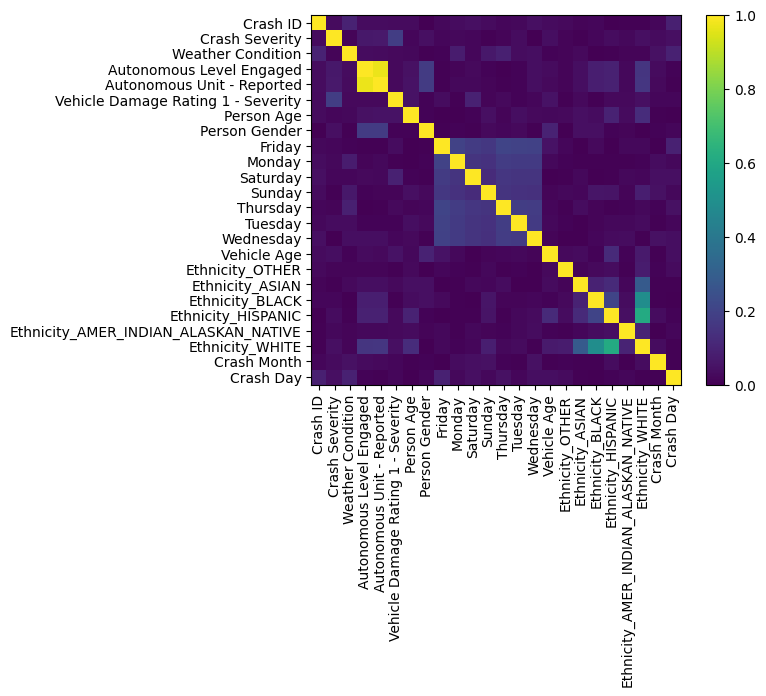

In [157]:
# Compute the correlation matrix
corr_matrix = X_train_scaled.corr()

%matplotlib inline
plt.imshow(np.abs(corr_matrix))
plt.colorbar()
plt.xticks(range(X_train_scaled.shape[1]), X_train_scaled.columns, rotation=90)
plt.yticks(range(X_train_scaled.shape[1]), X_train_scaled.columns)
plt.show()

Dropping Autonomous Unit - Reported as it has high collinearity with Autonomous Level Engaged.

In [158]:
X_train_scaled.drop('Autonomous Unit - Reported', axis = 1, inplace = True)
X_test_scaled.drop('Autonomous Unit - Reported', axis = 1, inplace = True)

In [159]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crash ID                              5376 non-null   float64
 1   Crash Severity                        5376 non-null   float64
 2   Weather Condition                     5376 non-null   float64
 3   Autonomous Level Engaged              5376 non-null   float64
 4   Vehicle Damage Rating 1 - Severity    5376 non-null   float64
 5   Person Age                            5376 non-null   float64
 6   Person Gender                         5376 non-null   float64
 7   Friday                                5376 non-null   float64
 8   Monday                                5376 non-null   float64
 9   Saturday                              5376 non-null   float64
 10  Sunday                                5376 non-null   float64
 11  Thursday         

In [160]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crash ID                              948 non-null    float64
 1   Crash Severity                        948 non-null    float64
 2   Weather Condition                     948 non-null    float64
 3   Autonomous Level Engaged              948 non-null    float64
 4   Vehicle Damage Rating 1 - Severity    948 non-null    float64
 5   Person Age                            948 non-null    float64
 6   Person Gender                         948 non-null    float64
 7   Friday                                948 non-null    float64
 8   Monday                                948 non-null    float64
 9   Saturday                              948 non-null    float64
 10  Sunday                                948 non-null    float64
 11  Thursday           

We are splitting our training data to train data and validation data. Training our models on the train data and validating the model on the validation data. Choosing the data that trains best on the train data and has high r-squared score on validation data and then using that best model to predict our regression_test(X_test) data.

In [162]:
from sklearn.model_selection import train_test_split

# Splitting the scaled training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_scaled, y, test_size=0.2, random_state=42)

##### OLS Regression Model

In [163]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Adding a constant to the features
X_train_ols = sm.add_constant(X_train)

# Fitting the OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Predicting on the training set
y_train_pred = ols_model.predict(X_train_ols)

# Calculating R-squared score
r2_train = ols_model.rsquared

# Calculating mean squared error
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculating mean absolute error
mae_train = mean_absolute_error(y_train, y_train_pred)

print("Training Performance on OLS model")
print(f"R-squared score: {r2_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")

Training Performance on OLS model
R-squared score: 0.0399
Mean Squared Error (MSE): 6404.9433
Mean Absolute Error (MAE): 34.2861


##### Linear Regression

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initializing Linear Regression model
lin_reg = LinearRegression()

# Fitting the model on the training data
lin_reg.fit(X_train, y_train)

LinearRegression()

In [165]:
# Predicting on the training set
y_pred_train = lin_reg.predict(X_train)

# Calculating evaluation metrics for training set
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Printing training performance
print("Training Performance on Linear Regression Model:")
print("R-squared score:", r2_train)
print("Mean Squared Error (MSE):", mse_train)
print("Mean Absolute Error (MAE):", mae_train)

# Predicting on the validation set
y_pred_valid = lin_reg.predict(X_valid)

# Calculating evaluation metrics for validation set
r2_valid = r2_score(y_valid, y_pred_valid)
mse_valid = mean_squared_error(y_valid, y_pred_valid)
mae_valid = mean_absolute_error(y_valid, y_pred_valid)

# Printing validation performance
print("\nValidation Performance on Linear Regression Model:")
print("R-squared score:", r2_valid)
print("Mean Squared Error (MSE):", mse_valid)
print("Mean Absolute Error (MAE):", mae_valid)

Training Performance on Linear Regression Model:
R-squared score: 0.03990041061676197
Mean Squared Error (MSE): 6405.024680232558
Mean Absolute Error (MAE): 34.27174418604651

Validation Performance on Linear Regression Model:
R-squared score: 0.00010770550221106401
Mean Squared Error (MSE): 7271.769375145213
Mean Absolute Error (MAE): 34.25609897769517


##### Polynomial Regression

In [166]:
# Importing PolynomialFeatures and LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Initializing PolynomialFeatures with degree 2
poly = PolynomialFeatures(degree=2)

# Fitting the polynomial features on the scaled training data
poly.fit(X_train_scaled)

# Transforming the training and validation data
X_train_poly = poly.transform(X_train)
X_valid_poly = poly.transform(X_valid)

# Initializing and fitting the Linear Regression model
lreg = LinearRegression()
lreg.fit(X_train_poly, y_train)

LinearRegression()

In [167]:
# Predicting on the training set
y_pred_train_poly = lreg.predict(X_train_poly)

# Printing training performance
print("Training Performance on Polynomial Regression Model:")
print("R-squared score:", r2_score(y_train, y_pred_train_poly))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_train_poly))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_train_poly))

# Predicting on the validation set
y_pred_valid_poly = lreg.predict(X_valid_poly)

# Printing validation performance
print("\nValidation Performance on Polynomial Regression Model:")
print("R-squared score:", r2_score(y_valid, y_pred_valid_poly))
print("Mean Squared Error (MSE):", mean_squared_error(y_valid, y_pred_valid_poly))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_valid, y_pred_valid_poly))

Training Performance on Polynomial Regression Model:
R-squared score: 0.1110386930701236
Mean Squared Error (MSE): 5930.446355377907
Mean Absolute Error (MAE): 34.58735465116279

Validation Performance on Polynomial Regression Model:
R-squared score: -0.021471734301344636
Mean Squared Error (MSE): 7428.706987685873
Mean Absolute Error (MAE): 36.008596654275095


The polynomial regression model has a little higher training R-squared score than the linear regression model, implying that it fits the training data slightly better. However, the validation set's R-squared score is negative, indicating that the polynomial regression model performs worse than a horizontal line. Furthermore, the polynomial regression model performs worse on the validation set than the linear regression model, as seen by higher mean squared error (MSE) and mean absolute error (MAE). This means that the polynomial regression model overfits the training data and does not perform well with new data.

##### Ridge Regression

In [168]:
# Importing Ridge Regression
from sklearn.linear_model import Ridge

# Initializing Ridge Regression model
ridge_model = Ridge()

# Fitting the Ridge Regression model on the training data
ridge_model.fit(X_train, y_train)

Ridge()

In [169]:
# Predicting on the training set
y_pred_train_ridge = ridge_model.predict(X_train)

# Printing training performance
print("Training Performance on Ridge Regression Model:")
print("R-squared score:", r2_score(y_train, y_pred_train_ridge))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_train_ridge))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_train_ridge))

# Predicting on the validation set
y_pred_valid_ridge = ridge_model.predict(X_valid)

# Printing validation performance
print("\nValidation Performance on Ridge Regression Model:")
print("R-squared score:", r2_score(y_valid, y_pred_valid_ridge))
print("Mean Squared Error (MSE):", mean_squared_error(y_valid, y_pred_valid_ridge))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_valid, y_pred_valid_ridge))

Training Performance on Ridge Regression Model:
R-squared score: 0.03991152173641466
Mean Squared Error (MSE): 6404.950555635081
Mean Absolute Error (MAE): 34.27869778498567

Validation Performance on Ridge Regression Model:
R-squared score: 0.00013795475515987476
Mean Squared Error (MSE): 7271.549385859943
Mean Absolute Error (MAE): 34.26481850397629


Despite regularization, the Ridge Regression model does not perform well on the validation set, with a very low R-squared score and higher MSE compared to the Linear Regression model. This suggests that the model might be underfitting the data.

##### Lasso Regression

In [170]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model
lasso_model = Lasso()

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

Lasso()

In [171]:
# Predict on the training set
y_pred_train_lasso = lasso_model.predict(X_train)

# Print R-squared score, Mean Squared Error (MSE), and Mean Absolute Error (MAE) for training set
print("Training Performance on Lasso Regression Model:")
print("R-squared score:", r2_score(y_train, y_pred_train_lasso))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_train_lasso))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_train_lasso))

# Predict on the validation set
y_pred_valid_lasso = lasso_model.predict(X_valid)

# Print R-squared score, Mean Squared Error (MSE), and Mean Absolute Error (MAE) for validation set
print("\nValidation Performance on Lasso Regression Model:")
print("R-squared score:", r2_score(y_valid, y_pred_valid_lasso))
print("Mean Squared Error (MSE):", mean_squared_error(y_valid, y_pred_valid_lasso))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_valid, y_pred_valid_lasso))

Training Performance on Lasso Regression Model:
R-squared score: 0.022886344492751398
Mean Squared Error (MSE): 6518.529065236411
Mean Absolute Error (MAE): 34.39265687230494

Validation Performance on Lasso Regression Model:
R-squared score: -0.0012777508134342863
Mean Squared Error (MSE): 7281.845179171457
Mean Absolute Error (MAE): 34.74555608672236


The Lasso regression model does not perform better than the ridge regression model on the training set, with an R-squared score of 0.023. However, the model's performance on the validation set is worse, with a negative R-squared score indicating that the model does not fit the validation data well. Additionally, both the mean squared error (MSE) and mean absolute error (MAE) are higher for the validation set compared to the training set, indicating poor generalization of the model to new data. This suggests that the Lasso regression model is overfitting the training data and does not perform well on unseen data.

##### SGDRegressor

In [172]:
import warnings
from sklearn.linear_model import SGDRegressor
from sklearn.exceptions import ConvergenceWarning 

# Ignoring convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)  

# Lists to store training and validation scores
train_score_sgd = []
validation_score_sgd = []
index_sgd = []

# Grid search for hyperparameters
for max_iter in [15, 20, 100]:
    for eta0 in [0.1, 0.01]:
        # Initializing SGD Regressor
        sgd = SGDRegressor(random_state=0, max_iter=max_iter, learning_rate='constant', eta0=eta0)
        sgd.fit(X_train, y_train)
        # Appending scores
        train_score_sgd.append(sgd.score(X_train, y_train))
        validation_score_sgd.append(sgd.score(X_valid, y_valid))
        index_sgd.append((max_iter, eta0))

# Finding the best parameters
best_index_sgd = validation_score_sgd.index(max(validation_score_sgd))
best_params_sgd = index_sgd[best_index_sgd]
print("Best Parameters for SGDRegressor:", best_params_sgd)

Best Parameters for SGDRegressor: (15, 0.01)


In [173]:
# Importing SGDRegressor
from sklearn.linear_model import SGDRegressor

# Initializing SGDRegressor with best parameters
sgdrgsr = SGDRegressor(random_state=0, max_iter=15, eta0=0.01)

# Fitting the model on the training data
sgdrgsr.fit(X_train, y_train)

SGDRegressor(max_iter=15, random_state=0)

In [174]:
# Predicting on the training set
y_pred_train_sgd = sgdrgsr.predict(X_train)

# Print R-squared score, Mean Squared Error (MSE), and Mean Absolute Error (MAE) for training set
print("Training Performance on SGD Regression Model:")
print("R-squared score:", r2_score(y_train, y_pred_train_sgd))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_train_sgd))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_train_sgd))

# Predicting on the validation set
y_pred_valid_sgd = sgd.predict(X_valid)

print("\nValidation Performance on SGD Regression Model:")
print("R-squared score:", r2_score(y_valid, y_pred_valid_sgd))
print("Mean Squared Error (MSE):", mean_squared_error(y_valid, y_pred_valid_sgd))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_valid, y_pred_valid_sgd))

Training Performance on SGD Regression Model:
R-squared score: 0.038246842390133096
Mean Squared Error (MSE): 6416.055978880243
Mean Absolute Error (MAE): 34.08417082742102

Validation Performance on SGD Regression Model:
R-squared score: -0.0007354223070359378
Mean Squared Error (MSE): 7277.90106654473
Mean Absolute Error (MAE): 33.13996409095012


Overall, the model's performance is not very high. It indicates that the model might not capture the underlying patterns in the data very well.  
All the above five models are linear models, and none of them are fitting our data. This means that the data is not linear and we might see a better model performance using non-linear models.

##### Decision Tree Regressor

In [175]:
from sklearn.tree import DecisionTreeRegressor

# Lists to store scores and corresponding parameter values
train_score_dt = []
valid_score_dt = []
index_dt = []

# Grid search through different parameter combinations
for max_depth in [2, 4, 8]:
    for min_samples_split in [10, 15, 20]:
        for min_samples_leaf in [2, 6, 8, 15]:
            for max_features in ['sqrt', 'log2']:
                # Initializing and fitting the Decision Tree Regression model
                dt_reg_model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split,
                                               min_samples_leaf=min_samples_leaf, max_features=max_features,
                                               random_state=0)
                dt_reg_model.fit(X_train, y_train)
                
                # Appending training and validation scores along with parameter values
                train_score_dt.append(dt_reg_model.score(X_train, y_train))
                valid_score_dt.append(dt_reg_model.score(X_valid, y_valid))
                index_dt.append((max_depth, min_samples_split, min_samples_leaf, max_features))

# Find the best parameter combination
best_index_dt = valid_score_dt.index(max(valid_score_dt))
best_params_dt = index_dt[best_index_dt]
print("Best Parameters for Decision Tree:", best_params_dt)

Best Parameters for Decision Tree: (8, 20, 6, 'sqrt')


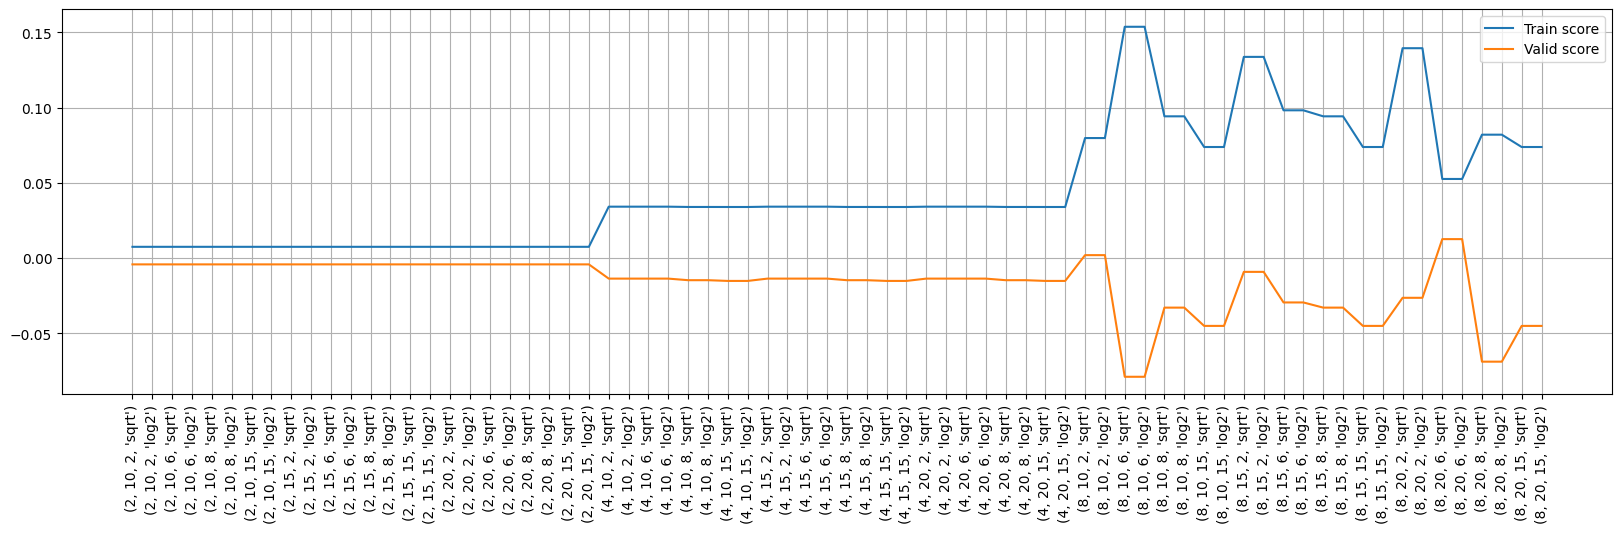

In [176]:
# Plotting the training and validation scores for Decision Tree
plt.subplots(figsize=(20, 5))
plt.plot(range(len(index_dt)), train_score_dt, label='Train score')
plt.plot(range(len(index_dt)), valid_score_dt, label='Valid score')
plt.xticks(range(len(index_dt)), index_dt, rotation=90)
plt.legend()
plt.grid()
plt.show()

In [177]:
from sklearn.tree import DecisionTreeRegressor

# Fitting the Decision Tree Regressor with the best parameters
dtrgsr = DecisionTreeRegressor(random_state=0, max_depth=8, min_samples_split=20, min_samples_leaf=6, max_features='sqrt')
dtrgsr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=6,
                      min_samples_split=20, random_state=0)

In [178]:
# Predicting on the training set
y_pred_train_dt = dtrgsr.predict(X_train)

# Print R-squared score, Mean Squared Error (MSE), and Mean Absolute Error (MAE) for training set
print("Training Performance on Decision Tree Regression Model:")
print("R-squared score:", r2_score(y_train, y_pred_train_dt))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_train_dt))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_train_dt))

# Predicting on the validation set
y_pred_valid_dt = dtrgsr.predict(X_valid)

# Print R-squared score, Mean Squared Error (MSE), and Mean Absolute Error (MAE) for validation set
print("\nValidation Performance on Decision Tree Regression Model:")
print("R-squared score:", r2_score(y_valid, y_pred_valid_dt))
print("Mean Squared Error (MSE):", mean_squared_error(y_valid, y_pred_valid_dt))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_valid, y_pred_valid_dt))

Training Performance on Decision Tree Regression Model:
R-squared score: 0.05261152651771983
Mean Squared Error (MSE): 6320.2261739534
Mean Absolute Error (MAE): 33.51322175932833

Validation Performance on Decision Tree Regression Model:
R-squared score: 0.012642885986645869
Mean Squared Error (MSE): 7180.606614855702
Mean Absolute Error (MAE): 34.94465003762214


Overall, the model performs better on the training set than on the validation set, suggesting some degree of overfitting.

##### Bagging Regressor

In [179]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Lists to store training and validation scores
train_score_bag = []
valid_score_bag = []
index_bag = []

# Loop through different parameters to find the best combination
for n_estimators in [100, 200, 300]:    
    for max_samples in [0.1, 0.5, 1]:
        for max_features in [0.1, 0.5, 1]:
            for max_depth in [16, 24, 32]:
                # Define and fit BaggingRegressor model
                dtrgsr = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
                bagrgsr = BaggingRegressor(dtrgsr, 
                                            max_features=max_features, 
                                            n_estimators=n_estimators, 
                                            max_samples=max_samples,
                                            bootstrap=True, 
                                            random_state=0)
                bagrgsr.fit(X_train, y_train)
                
                # Append scores and parameters to lists
                train_score_bag.append(bagrgsr.score(X_train, y_train))
                valid_score_bag.append(bagrgsr.score(X_valid, y_valid))
                index_bag.append((n_estimators, max_samples, max_features, max_depth))

# Find best parameter set
best_index_bag = valid_score_bag.index(max(valid_score_bag))
best_params_bag = index_bag[best_index_bag]
print("Best Parameters for Bagging Regressor:", best_params_bag)

Best Parameters for Bagging Regressor: (100, 0.5, 0.5, 24)


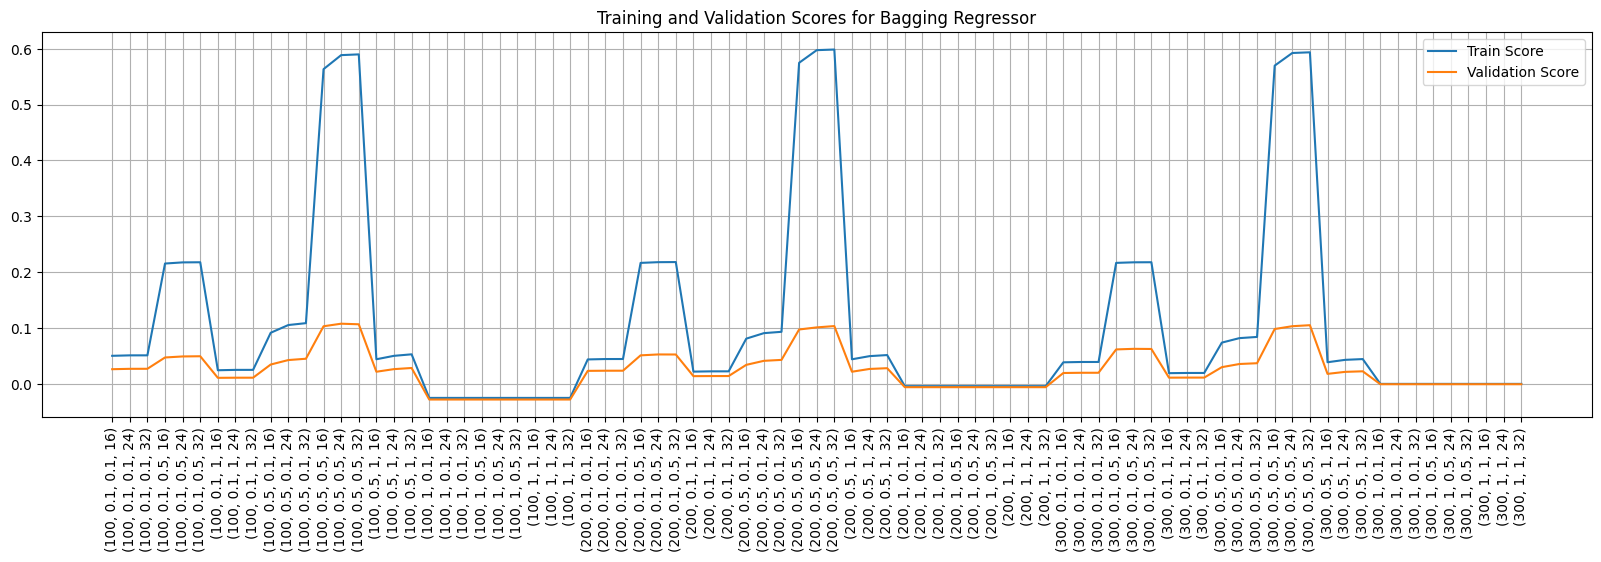

In [180]:
# Plotting the training and validation scores for Bagging Regressor
plt.subplots(figsize=(20, 5))
plt.plot(range(len(index_bag)), train_score_bag, label='Train Score')
plt.plot(range(len(index_bag)), valid_score_bag, label='Validation Score')
plt.xticks(range(len(index_bag)), index_bag, rotation=90)
plt.title('Training and Validation Scores for Bagging Regressor')
plt.legend()
plt.grid()
plt.show()

In [181]:
# Define the best DecisionTreeRegressor model
dtrgsr_bst_mdl = DecisionTreeRegressor(random_state=0, max_depth=24)

# Define the BaggingRegressor model with the best parameters
bgrgsr_bst_mdl = BaggingRegressor(dtrgsr_bst_mdl,
                                  n_estimators=100,
                                  max_samples=0.5,
                                  max_features=0.5, 
                                  bootstrap=True, 
                                  random_state=0)

# Fit the BaggingRegressor model on the training data
bgrgsr_bst_mdl.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=24, random_state=0),
                 max_features=0.5, max_samples=0.5, n_estimators=100,
                 random_state=0)

In [182]:
# Predicting on the training set
y_pred_train_bag = bgrgsr_bst_mdl.predict(X_train)

# Printing R-squared score, Mean Squared Error (MSE), and Mean Absolute Error (MAE) for training set
print("Training Performance on Bagging Regression Model:")
print("R-squared score:", r2_score(y_train, y_pred_train_bag))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_train_bag))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_train_bag))

# Predicting on the validation set
y_pred_valid_bag = bgrgsr_bst_mdl.predict(X_valid)

# Printing R-squared score, Mean Squared Error (MSE), and Mean Absolute Error (MAE) for training set
print("\nValidation Performance on Bagging Regression Model:")
print("R-squared score:", r2_score(y_valid, y_pred_valid_bag))
print("Mean Squared Error (MSE):", mean_squared_error(y_valid, y_pred_valid_bag))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_valid, y_pred_valid_bag))

Training Performance on Bagging Regression Model:
R-squared score: 0.588528929285318
Mean Squared Error (MSE): 2745.009363895543
Mean Absolute Error (MAE): 21.23452392892972

Validation Performance on Bagging Regression Model:
R-squared score: 0.10763854058144284
Mean Squared Error (MSE): 6489.745713481044
Mean Absolute Error (MAE): 31.11322452268235


The Bagging Regression model significantly outperforms all the models we run above. It demonstrates a much higher R-squared score for both the training and validation sets which indicates that it explains a greater proportion of the variance in the data.

For the training set, the Bagging Regression model achieves an R-squared score of approximately 0.59, indicating that it explains around 59% of the variance in the training data. The Mean Squared Error (MSE) and Mean Absolute Error (MAE) for the training set are also substantially lower compared to the all the other models.

For the validation set, although the Bagging Regression model's R-squared score drops to around 0.11, it still performs significantly better than the all the other models. The model explains 11% of the variance in the test data.

##### Random Forest Regressor

In [183]:
from sklearn.ensemble import RandomForestRegressor

# Lists to store training and validation scores
train_score_rfr = []
valid_score_rfr = []
index_rfr = []

# Loop through different parameters to find the best combination
for n_estimators in [100, 200, 400]:
    for max_features in [0.1, 0.5, 1.0]:
        for max_samples in [0.1, 0.5, 1.0]:
            for max_depth in [2, 4, 8]:
                # Define and fit RandomForestRegressor model
                rfr_rgsr = RandomForestRegressor(random_state=0, 
                                             n_estimators=n_estimators,
                                             max_samples=max_samples, 
                                             max_features=max_features, 
                                             max_depth=max_depth)
                rfr_rgsr.fit(X_train, y_train)
                
                # Append scores and parameters to lists
                train_score_rfr.append(rfr_rgsr.score(X_train, y_train))
                valid_score_rfr.append(rfr_rgsr.score(X_valid, y_valid))
                index_rfr.append((n_estimators, max_features, 
                                  max_samples, max_depth))

# Find best parameter set
best_index_rfr = valid_score_rfr.index(max(valid_score_rfr))
best_params_rfr = index_rfr[best_index_rfr]
print("Best Parameters for Random Forest Regressor:", best_params_rfr)

Best Parameters for Random Forest Regressor: (200, 0.5, 1.0, 4)


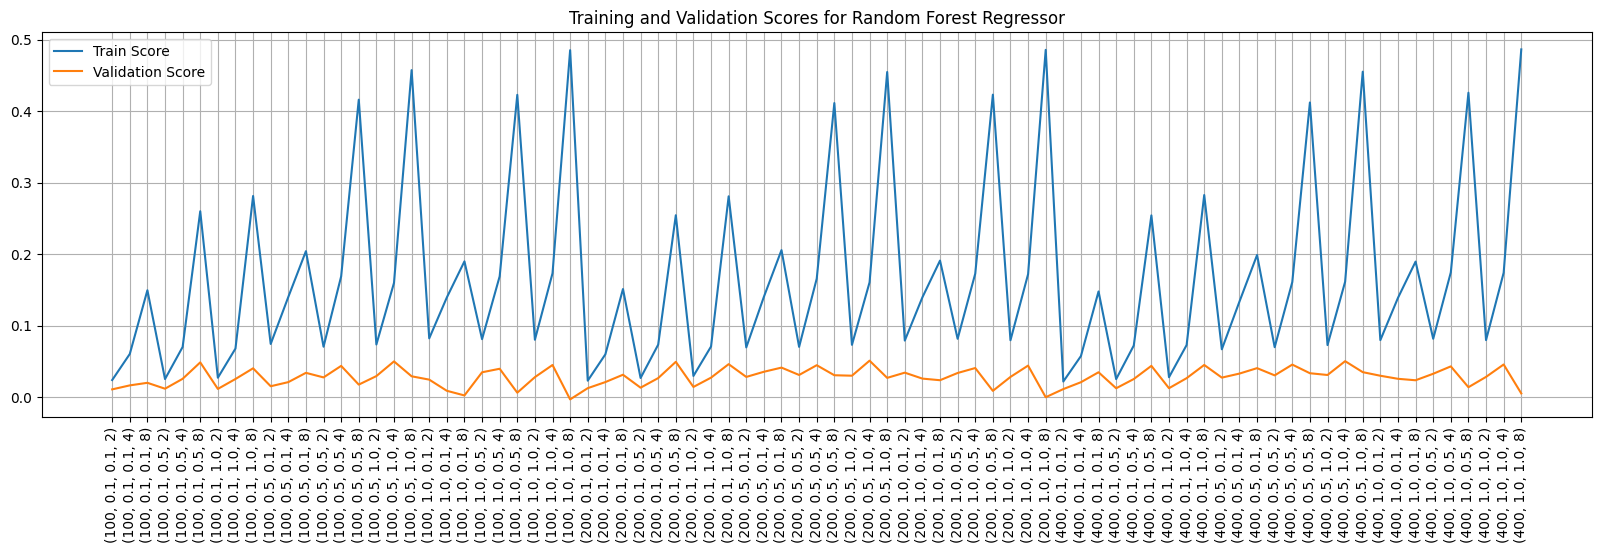

In [184]:
# Plotting the training and validation scores for Random Forest Regressor
plt.subplots(figsize=(20, 5))
plt.plot(range(len(index_rfr)), train_score_rfr, label='Train Score')
plt.plot(range(len(index_rfr)), valid_score_rfr, label='Validation Score')
plt.xticks(range(len(index_rfr)), index_rfr, rotation=90)
plt.title('Training and Validation Scores for Random Forest Regressor')
plt.legend()
plt.grid()
plt.show()

In [185]:
# Define and fit RandomForestRegressor model with the best parameters
rfr_rgsr_model = RandomForestRegressor(random_state=0, 
                                        n_estimators=200,
                                        max_features=0.5, 
                                        max_samples=1.0, 
                                        max_depth=4)
rfr_rgsr_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features=0.5, max_samples=1.0,
                      n_estimators=200, random_state=0)

In [186]:
# Predicting on the training set
y_pred_train_rfr = rfr_rgsr_model.predict(X_train)

# Printing training performance
print("Training Performance on RandomForestRegressor Model:")
print("R-squared score:", r2_score(y_train, y_pred_train_rfr))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_train_rfr))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_train_rfr))

# Predicting on the validation set
y_pred_valid_rfr = rfr_rgsr_model.predict(X_valid)

# Printing validation performance
print("\nValidation Performance on RandomForestRegressor Model:")
print("R-squared score:", r2_score(y_valid, y_pred_valid_rfr))
print("Mean Squared Error (MSE):", mean_squared_error(y_valid, y_pred_valid_rfr))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_valid, y_pred_valid_rfr))

Training Performance on RandomForestRegressor Model:
R-squared score: 0.16043713625405398
Mean Squared Error (MSE): 5600.899034186579
Mean Absolute Error (MAE): 32.76721038422356

Validation Performance on RandomForestRegressor Model:
R-squared score: 0.0508850475665219
Mean Squared Error (MSE): 6902.488480586479
Mean Absolute Error (MAE): 33.46682481321783


The RandomForestRegressor model has a training R-squared score of approximately 0.16, indicating that the model explains around 16% of the variance in the training data. The Mean Squared Error (MSE) for the training set is approximately 5600.90, and the Mean Absolute Error (MAE) is approximately 32.76.  

For the validation set, the model has an R-squared score of approximately 0.051, indicating that the model explains about 5.1% of the variance in the validation data. The Mean Squared Error (MSE) for the validation set is approximately 6902.49, and the Mean Absolute Error (MAE) is approximately 33.46.  

Overall, the model performs better on the training set than on the validation set, suggesting some degree of overfitting.  

### Regression prediction

Among the models we've tested, the Bagging Regressor model has performed the best with highest training score of 59%. It achieved the highest R-squared score, the lowest Mean Squared Error (MSE) and Mean Absolute Error (MAE) on both the training and validation sets. Therefore, we can consider the Bagging Regressor model as the best-performing model among the ones we've evaluated as it has managed to atleast learn from the training dataset. So using Bagging Regressor to predict the target Variable in test dataset.

In [187]:
y_pred_bgrgsr = bgrgsr_bst_mdl.predict(X_test_scaled)
y_pred_bgrgsr

array([ 53.16062715,  56.16710996,  34.94140977,  41.16267477,
        44.9401169 ,  65.3075035 ,  78.54745377,  52.43095627,
        31.60523486,  47.11522657,  46.31448323, 105.52272814,
        62.9070662 ,  62.49882308,  36.73660244,  46.88710819,
        44.06887792,  36.73159285,  49.68096523,  43.91701613,
        52.03512935,  48.96415801,  48.56818182,  61.96813137,
        46.35323083,  71.53866823,  35.28645057,  78.69859707,
        42.87775742,  49.82076703,  46.08554757,  48.16914724,
        44.86505357,  53.30738254,  66.13284571, 109.47027308,
        46.91944467,  26.92664703,  66.24119048,  41.91941306,
        64.64454235,  39.97272826,  60.65163492,  40.46353488,
        40.73243398,  49.9215936 ,  37.01585136,  90.74918791,
        36.99746143,  33.59108006,  80.62658926,  56.70226674,
        38.73027199,  50.62717833,  41.71823037,  68.71307183,
        57.45356614,  65.78281863,  54.94041574,  59.02401032,
        26.98630556,  39.30370956,  36.24157789,  26.73

In [188]:
y_pred_bgrgsr = pd.DataFrame(y_pred_bgrgsr, columns =['Time to Clear Roadway']) 

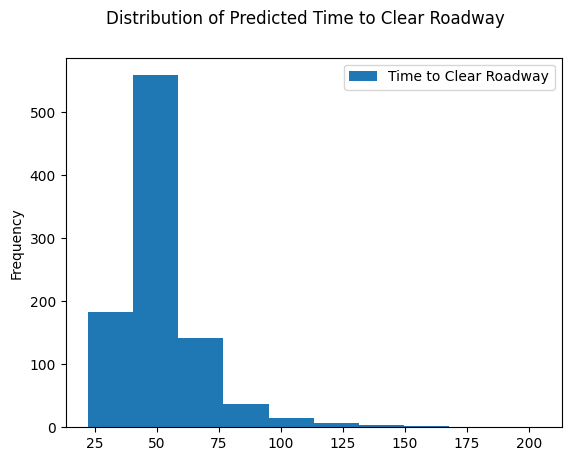

In [189]:
y_pred_bgrgsr.plot(kind='hist')  
plt.suptitle("Distribution of Predicted Time to Clear Roadway")
plt.show()

Finding the predicted average duration required to clear the roadway after each accident which is our goal for regression.

In [190]:
#Printing the actual average of the time to clear the roadway after an accident has occured in our training data
round(y.mean(),2)

48.42

In [191]:
#Printing the predicted average of the time to clear the roadway after an accident has occured.
round(y_pred_bgrgsr.mean(),2)

Time to Clear Roadway    52.38
dtype: float64

The predicted average is not far from the actual average in our training dataset.

# Classification

### Data preparation

In [192]:
#Loading the required base libraries numpy, pandas, matplotlib and statmodels

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [193]:
#Loading the Classification train and test data sets to dataframes
classification_train =  pd.read_csv('Classification_train.csv')
classification_test =  pd.read_csv('Classification_test.csv')

In [194]:
#Displaying first five rows of classification train dataframe
classification_train.head()

Unnamed: 0  Administrative  Administrative_Duration  Informational  \
0           0               0                      0.0              0   
1           1               0                      0.0              0   
2           2               0                      0.0              0   
3           3               0                      0.0              0   
4           4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               2                64.000000   
1                     0.0               2                 2.666667   
2                     0.0              10               627.500000   
3                     0.0              19               154.216667   
4                     0.0               1                 0.000000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.000000   0.100000         0.0         0.0   Feb                 2   
1     0.050000   0.140000         0.0         0.0   Feb                 3   
2     0.020000   0.050000         0.0         0.0   Feb                 3   
3     0.015789   0.024561         0.0         0.0   Feb                 2   
4     0.200000   0.200000         0.0         0.4   Feb                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        2       1            2  Returning_Visitor    False    False  
1        2       2            4  Returning_Visitor    False    False  
2        3       1            4  Returning_Visitor     True    False  
3        2       1            3  Returning_Visitor    False    False  
4        4       3            3  Returning_Visitor    False    False

In [195]:
#Displaying first five rows of classification test dataframe
classification_test.head()

Unnamed: 0  Administrative  Administrative_Duration  Informational  \
0           0               3                   65.500              3   
1           1               1                   45.000              0   
2           2               4                  598.375              0   
3           3               0                    0.000              0   
4           4               3                   39.200              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    60.0              30              1383.375000   
1                     0.0              10               413.000000   
2                     0.0             126              4446.303175   
3                     0.0              77              3733.228571   
4                     0.0              12               209.000000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.014141   0.039394   43.207569         0.0   Nov                 2   
1     0.000000   0.009091    0.000000         0.0   Mar                 2   
2     0.001538   0.015568    3.333836         0.0   Dec                 2   
3     0.018667   0.048622    0.000000         0.8   May                 2   
4     0.000000   0.020000    0.000000         0.0   Sep                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  
0        2       1            1  Returning_Visitor    False  
1        4       1            1  Returning_Visitor     True  
2        2       3            2  Returning_Visitor    False  
3        2       1            2  Returning_Visitor    False  
4        5       6            2  Returning_Visitor    False

In [196]:
#Printing the information of classification train dataframe
classification_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8909 entries, 0 to 8908
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8909 non-null   int64  
 1   Administrative           8909 non-null   int64  
 2   Administrative_Duration  8909 non-null   float64
 3   Informational            8909 non-null   int64  
 4   Informational_Duration   8909 non-null   float64
 5   ProductRelated           8909 non-null   int64  
 6   ProductRelated_Duration  8909 non-null   float64
 7   BounceRates              8909 non-null   float64
 8   ExitRates                8909 non-null   float64
 9   PageValues               8909 non-null   float64
 10  SpecialDay               8909 non-null   float64
 11  Month                    8909 non-null   object 
 12  OperatingSystems         8909 non-null   int64  
 13  Browser                  8909 non-null   int64  
 14  Region                  

In [197]:
#Printing the information of classification test dataframe
classification_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1572 non-null   int64  
 1   Administrative           1572 non-null   int64  
 2   Administrative_Duration  1572 non-null   float64
 3   Informational            1572 non-null   int64  
 4   Informational_Duration   1572 non-null   float64
 5   ProductRelated           1572 non-null   int64  
 6   ProductRelated_Duration  1572 non-null   float64
 7   BounceRates              1572 non-null   float64
 8   ExitRates                1572 non-null   float64
 9   PageValues               1572 non-null   float64
 10  SpecialDay               1572 non-null   float64
 11  Month                    1572 non-null   object 
 12  OperatingSystems         1572 non-null   int64  
 13  Browser                  1572 non-null   int64  
 14  Region                  

Converting the object columns to numerical datatypes to apply Machine Learning.

Checking the classification train dataframe for missing data and imputing it, then applying same imputations on test dataframe

In [198]:
#Counting the missing values in classification train dataframe
classification_train.isnull().sum()

Unnamed: 0                 0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [199]:
#Counting the missing values in classification test dataframe
classification_test.isnull().sum()

Unnamed: 0                 0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

Since train and test data does not contain missing values. Using transformation techniques to map them for applying classification.

##### Revenue

In [200]:
# Count the occurrences of each unique value in the 'Revenue' column
classification_train['Revenue'].value_counts()

Revenue
False    7545
True     1364
Name: count, dtype: int64

<Axes: xlabel='Revenue'>

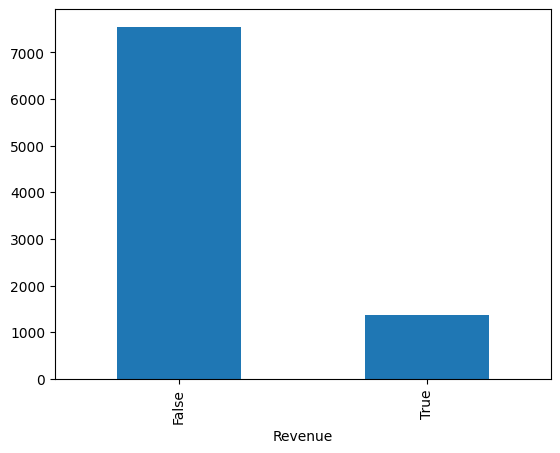

In [201]:
classification_train['Revenue'].value_counts().plot(kind='bar')

The goal is to develop a predictive model that can accurately forecast whether a user interaction on the e-commerce platform will result in revenue generation. In this case, the class of interest is when the 'Revenue' column has a value of 'True', indicating that a user interaction resulted in revenue generation.

In [202]:
# Mapping True to 1 and False to 0 in the 'Revenue' column
classification_train['Revenue'] = classification_train['Revenue'].map({True: 1, False: 0})

# Check the information of the DataFrame after mapping
classification_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8909 entries, 0 to 8908
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8909 non-null   int64  
 1   Administrative           8909 non-null   int64  
 2   Administrative_Duration  8909 non-null   float64
 3   Informational            8909 non-null   int64  
 4   Informational_Duration   8909 non-null   float64
 5   ProductRelated           8909 non-null   int64  
 6   ProductRelated_Duration  8909 non-null   float64
 7   BounceRates              8909 non-null   float64
 8   ExitRates                8909 non-null   float64
 9   PageValues               8909 non-null   float64
 10  SpecialDay               8909 non-null   float64
 11  Month                    8909 non-null   object 
 12  OperatingSystems         8909 non-null   int64  
 13  Browser                  8909 non-null   int64  
 14  Region                  

##### Unnamed: 0

Dropping the Unnamed: 0 as it is an index column created while exporting the file to csv, and it might not provide any information for analysis.

In [203]:
# Dropping the 'Unnamed: 0' from train and test dataframe
classification_train.drop('Unnamed: 0', axis=1, inplace=True)
classification_test.drop('Unnamed: 0', axis=1, inplace=True)

##### Visitor Type

In [204]:
# Count the occurrences of each unique value in the 'Visitor Type' column
classification_train['VisitorType'].value_counts()

VisitorType
Returning_Visitor    7601
New_Visitor          1253
Other                  55
Name: count, dtype: int64

<Axes: xlabel='VisitorType'>

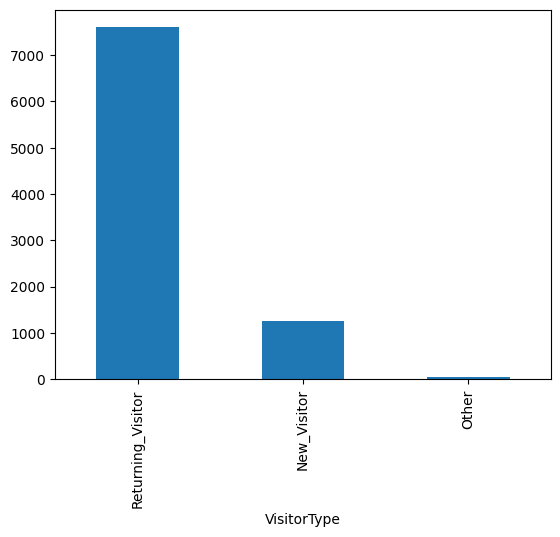

In [205]:
#Plotting the frequency of unique values in 'Visitor Type'
classification_train['VisitorType'].value_counts().plot(kind='bar')

In [206]:
# Count the occurrences of each unique value in the 'Visitor Type' column in test dataframe
classification_train['VisitorType'].value_counts()

VisitorType
Returning_Visitor    7601
New_Visitor          1253
Other                  55
Name: count, dtype: int64

<Axes: xlabel='VisitorType'>

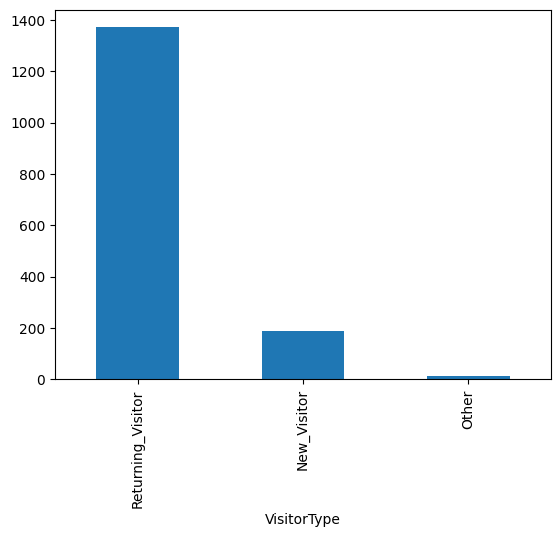

In [207]:
#Plotting the frequency of unique values in 'Visitor Type' in test dataframe
classification_test['VisitorType'].value_counts().plot(kind='bar')

In [208]:
# Using one-hot encoding for the 'VisitorType' column
cols_cls = pd.get_dummies(classification_train['VisitorType'], prefix='VisitorType')

# Adding the one-hot encoded columns to the dataset
classification_train[cols_cls.columns] = cols_cls

# Using one-hot encoding for the 'VisitorType' column in test dataframe
cols_cls_test = pd.get_dummies(classification_test['VisitorType'], prefix='VisitorType')

# Adding the one-hot encoded columns to the dataset in test dataframe
classification_test[cols_cls_test.columns] = cols_cls

In [209]:
# Displaying the information about the dataset after one-hot encoding for train and test dataframe
print(classification_train.info())
print(classification_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8909 entries, 0 to 8908
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 8909 non-null   int64  
 1   Administrative_Duration        8909 non-null   float64
 2   Informational                  8909 non-null   int64  
 3   Informational_Duration         8909 non-null   float64
 4   ProductRelated                 8909 non-null   int64  
 5   ProductRelated_Duration        8909 non-null   float64
 6   BounceRates                    8909 non-null   float64
 7   ExitRates                      8909 non-null   float64
 8   PageValues                     8909 non-null   float64
 9   SpecialDay                     8909 non-null   float64
 10  Month                          8909 non-null   object 
 11  OperatingSystems               8909 non-null   int64  
 12  Browser                        8909 non-null   i

In [210]:
classification_train.drop('VisitorType', axis = 1, inplace = True)
classification_test.drop('VisitorType', axis = 1, inplace = True)

##### Month

In [211]:
# Count the occurrences of each unique value in the 'Month' column
classification_train['Month'].value_counts()

Month
May     2424
Nov     2134
Mar     1378
Dec     1277
Oct      388
Aug      327
Sep      323
Jul      313
June     208
Feb      137
Name: count, dtype: int64

<Axes: xlabel='Month'>

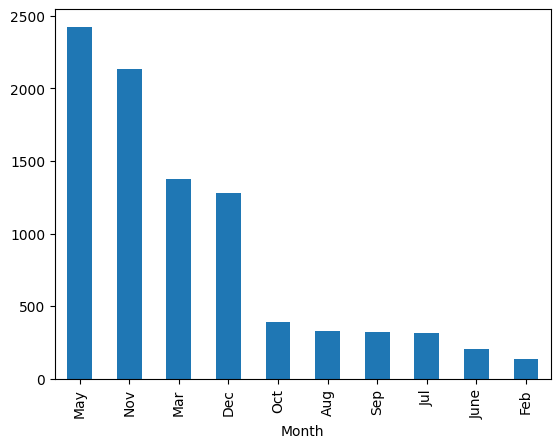

In [212]:
#Plotting the frequency of unique values in 'Month' in train dataframe
classification_train['Month'].value_counts().plot(kind='bar')

In [213]:
# Count the occurrences of each unique value in the 'Month' column in test dataframe
classification_test['Month'].value_counts()

Month
May     427
Nov     400
Mar     230
Dec     204
Oct      72
Sep      64
Aug      56
Jul      51
June     43
Feb      25
Name: count, dtype: int64

<Axes: xlabel='Month'>

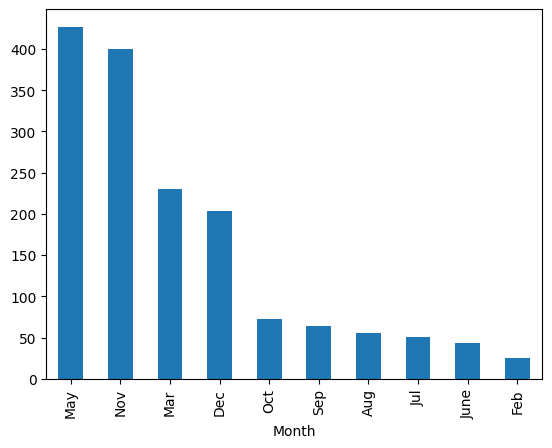

In [214]:
#Plotting the frequency of unique values in 'Month' in test dataframe
classification_test['Month'].value_counts().plot(kind='bar')

In [215]:
# Using one-hot encoding for the 'Month' column
cols_cls_m = pd.get_dummies(classification_train['Month'])

# Adding the one-hot encoded columns to the dataset
classification_train[cols_cls_m.columns] = cols_cls_m

# Using one-hot encoding for the 'Month' column in test dataframe
cols_cls_test_m = pd.get_dummies(classification_test['Month'])

# Adding the one-hot encoded columns to the dataset in test dataframe
classification_test[cols_cls_m.columns] = cols_cls_m

# Dropping the 'Month' column after getting dummies
classification_train.drop('Month', axis=1, inplace=True)
classification_test.drop('Month', axis=1, inplace=True)

In [216]:
# Displaying the information about the dataset after one-hot encoding of 'Month' column for train and test dataframe
print(classification_train.info())
print(classification_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8909 entries, 0 to 8908
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 8909 non-null   int64  
 1   Administrative_Duration        8909 non-null   float64
 2   Informational                  8909 non-null   int64  
 3   Informational_Duration         8909 non-null   float64
 4   ProductRelated                 8909 non-null   int64  
 5   ProductRelated_Duration        8909 non-null   float64
 6   BounceRates                    8909 non-null   float64
 7   ExitRates                      8909 non-null   float64
 8   PageValues                     8909 non-null   float64
 9   SpecialDay                     8909 non-null   float64
 10  OperatingSystems               8909 non-null   int64  
 11  Browser                        8909 non-null   int64  
 12  Region                         8909 non-null   i

In [217]:
# Dictionary for renaming columns for Month
month_mapping = {
    'Jan': 'January',
    'Feb': 'February',
    'Mar': 'March',
    'Apr': 'April',
    'May': 'May',
    'June': 'June',
    'Jul': 'July',
    'Aug': 'August',
    'Sep': 'September',
    'Oct': 'October',
    'Nov': 'November',
    'Dec': 'December'
}

# Renaming columns in classification_train DataFrame
classification_train.rename(columns=month_mapping, inplace=True)

# Renaming columns in classification_test DataFrame
classification_test.rename(columns=month_mapping, inplace=True)

In [218]:
# List of boolean columns
boolean_cols = ['Weekend', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor',
                'August', 'December', 'February', 'July', 'June', 'March', 'May', 'November', 'October', 'September']

# Convert boolean columns to numerical in train dataframe
classification_train[boolean_cols] = classification_train[boolean_cols].astype(int)

# Convert boolean columns to numerical in test dataframe
classification_test[boolean_cols] = classification_test[boolean_cols].astype(int)

In [219]:
# Displaying the information about the dataset after data imputation
print(classification_train.info())
print(classification_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8909 entries, 0 to 8908
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 8909 non-null   int64  
 1   Administrative_Duration        8909 non-null   float64
 2   Informational                  8909 non-null   int64  
 3   Informational_Duration         8909 non-null   float64
 4   ProductRelated                 8909 non-null   int64  
 5   ProductRelated_Duration        8909 non-null   float64
 6   BounceRates                    8909 non-null   float64
 7   ExitRates                      8909 non-null   float64
 8   PageValues                     8909 non-null   float64
 9   SpecialDay                     8909 non-null   float64
 10  OperatingSystems               8909 non-null   int64  
 11  Browser                        8909 non-null   int64  
 12  Region                         8909 non-null   i

In [220]:
# Description of the train dataset after data imputation
classification_train.describe()

Administrative  Administrative_Duration  Informational  \
count     8909.000000              8909.000000    8909.000000   
mean         2.297901                80.414446       0.491974   
std          3.291233               173.719947       1.260727   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 6.000000       0.000000   
75%          4.000000                91.750000       0.000000   
max         27.000000              2657.318056      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             8909.000000     8909.000000              8909.000000   
mean                33.339425       31.648333              1193.466765   
std                139.004231       44.810958              1874.880645   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               182.583333   
50%                  0.000000       18.000000               589.875000   
75%                  0.000000       38.000000              1464.209618   
max               2256.916667      705.000000             43171.233380   

       BounceRates    ExitRates   PageValues   SpecialDay  ...       August  \
count  8909.000000  8909.000000  8909.000000  8909.000000  ...  8909.000000   
mean      0.022175     0.043248     5.751880     0.060276  ...     0.036704   
std       0.048567     0.048765    18.740116     0.196670  ...     0.188046   
min       0.000000     0.000000     0.000000     0.000000  ...     0.000000   
25%       0.000000     0.014286     0.000000     0.000000  ...     0.000000   
50%       0.002941     0.025185     0.000000     0.000000  ...     0.000000   
75%       0.016667     0.050000     0.000000     0.000000  ...     0.000000   
max       0.200000     0.200000   361.763742     1.000000  ...     1.000000   

          December     February         July         June        March  \
count  8909.000000  8909.000000  8909.000000  8909.000000  8909.000000   
mean      0.143338     0.015378     0.035133     0.023347     0.154675   
std       0.350437     0.123057     0.184126     0.151012     0.361615   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               May     November      October    September  
count  8909.000000  8909.000000  8909.000000  8909.000000  
mean      0.272084     0.239533     0.043551     0.036255  
std       0.445058     0.426822     0.204106     0.186936  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000  
75%       1.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000  

[8 rows x 29 columns]

In [221]:
# Description of the test dataset after data imputation
classification_test.describe()

Administrative  Administrative_Duration  Informational  \
count     1572.000000              1572.000000    1572.000000   
mean         2.421756                78.565001       0.572519   
std          3.564213               167.221495       1.424245   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                10.500000       0.000000   
75%          4.000000                94.600000       0.000000   
max         26.000000              2047.234848      16.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             1572.000000     1572.000000              1572.000000   
mean                40.375076       31.741094              1184.626600   
std                152.399240       42.149439              1699.429863   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        8.000000               198.971212   
50%                  0.000000       18.000000               622.904056   
75%                  0.000000       39.000000              1486.408334   
max               1657.300000      414.000000             23888.810000   

       BounceRates    ExitRates   PageValues   SpecialDay  ...  August  \
count  1572.000000  1572.000000  1572.000000  1572.000000  ...  1572.0   
mean      0.022856     0.042555     6.485538     0.062723  ...     0.0   
std       0.049296     0.048689    19.281702     0.201988  ...     0.0   
min       0.000000     0.000000     0.000000     0.000000  ...     0.0   
25%       0.000000     0.013860     0.000000     0.000000  ...     0.0   
50%       0.003689     0.025000     0.000000     0.000000  ...     0.0   
75%       0.016995     0.047619     0.000000     0.000000  ...     0.0   
max       0.200000     0.200000   258.549873     1.000000  ...     0.0   

       December     February    July    June        March          May  \
count    1572.0  1572.000000  1572.0  1572.0  1572.000000  1572.000000   
mean        0.0     0.087150     0.0     0.0     0.876590     0.036260   
std         0.0     0.282145     0.0     0.0     0.329012     0.186995   
min         0.0     0.000000     0.0     0.0     0.000000     0.000000   
25%         0.0     0.000000     0.0     0.0     1.000000     0.000000   
50%         0.0     0.000000     0.0     0.0     1.000000     0.000000   
75%         0.0     0.000000     0.0     0.0     1.000000     0.000000   
max         0.0     1.000000     0.0     0.0     1.000000     1.000000   

       November  October  September  
count    1572.0   1572.0     1572.0  
mean        0.0      0.0        0.0  
std         0.0      0.0        0.0  
min         0.0      0.0        0.0  
25%         0.0      0.0        0.0  
50%         0.0      0.0        0.0  
75%         0.0      0.0        0.0  
max         0.0      0.0        0.0  

[8 rows x 28 columns]

### Clustering

#### Scaling the dataset

In [222]:
# Separating features and target variable for classification
X_cls = classification_train.drop('Revenue', axis = 1)
y_cls = classification_train['Revenue']
X_test_cls = classification_test.copy()

In [223]:
#Printing shape of dataframes
print(X_cls.shape, y_cls.shape, X_test_cls.shape)

(8909, 28) (8909,) (1572, 28)


<Figure size 640x480 with 0 Axes>

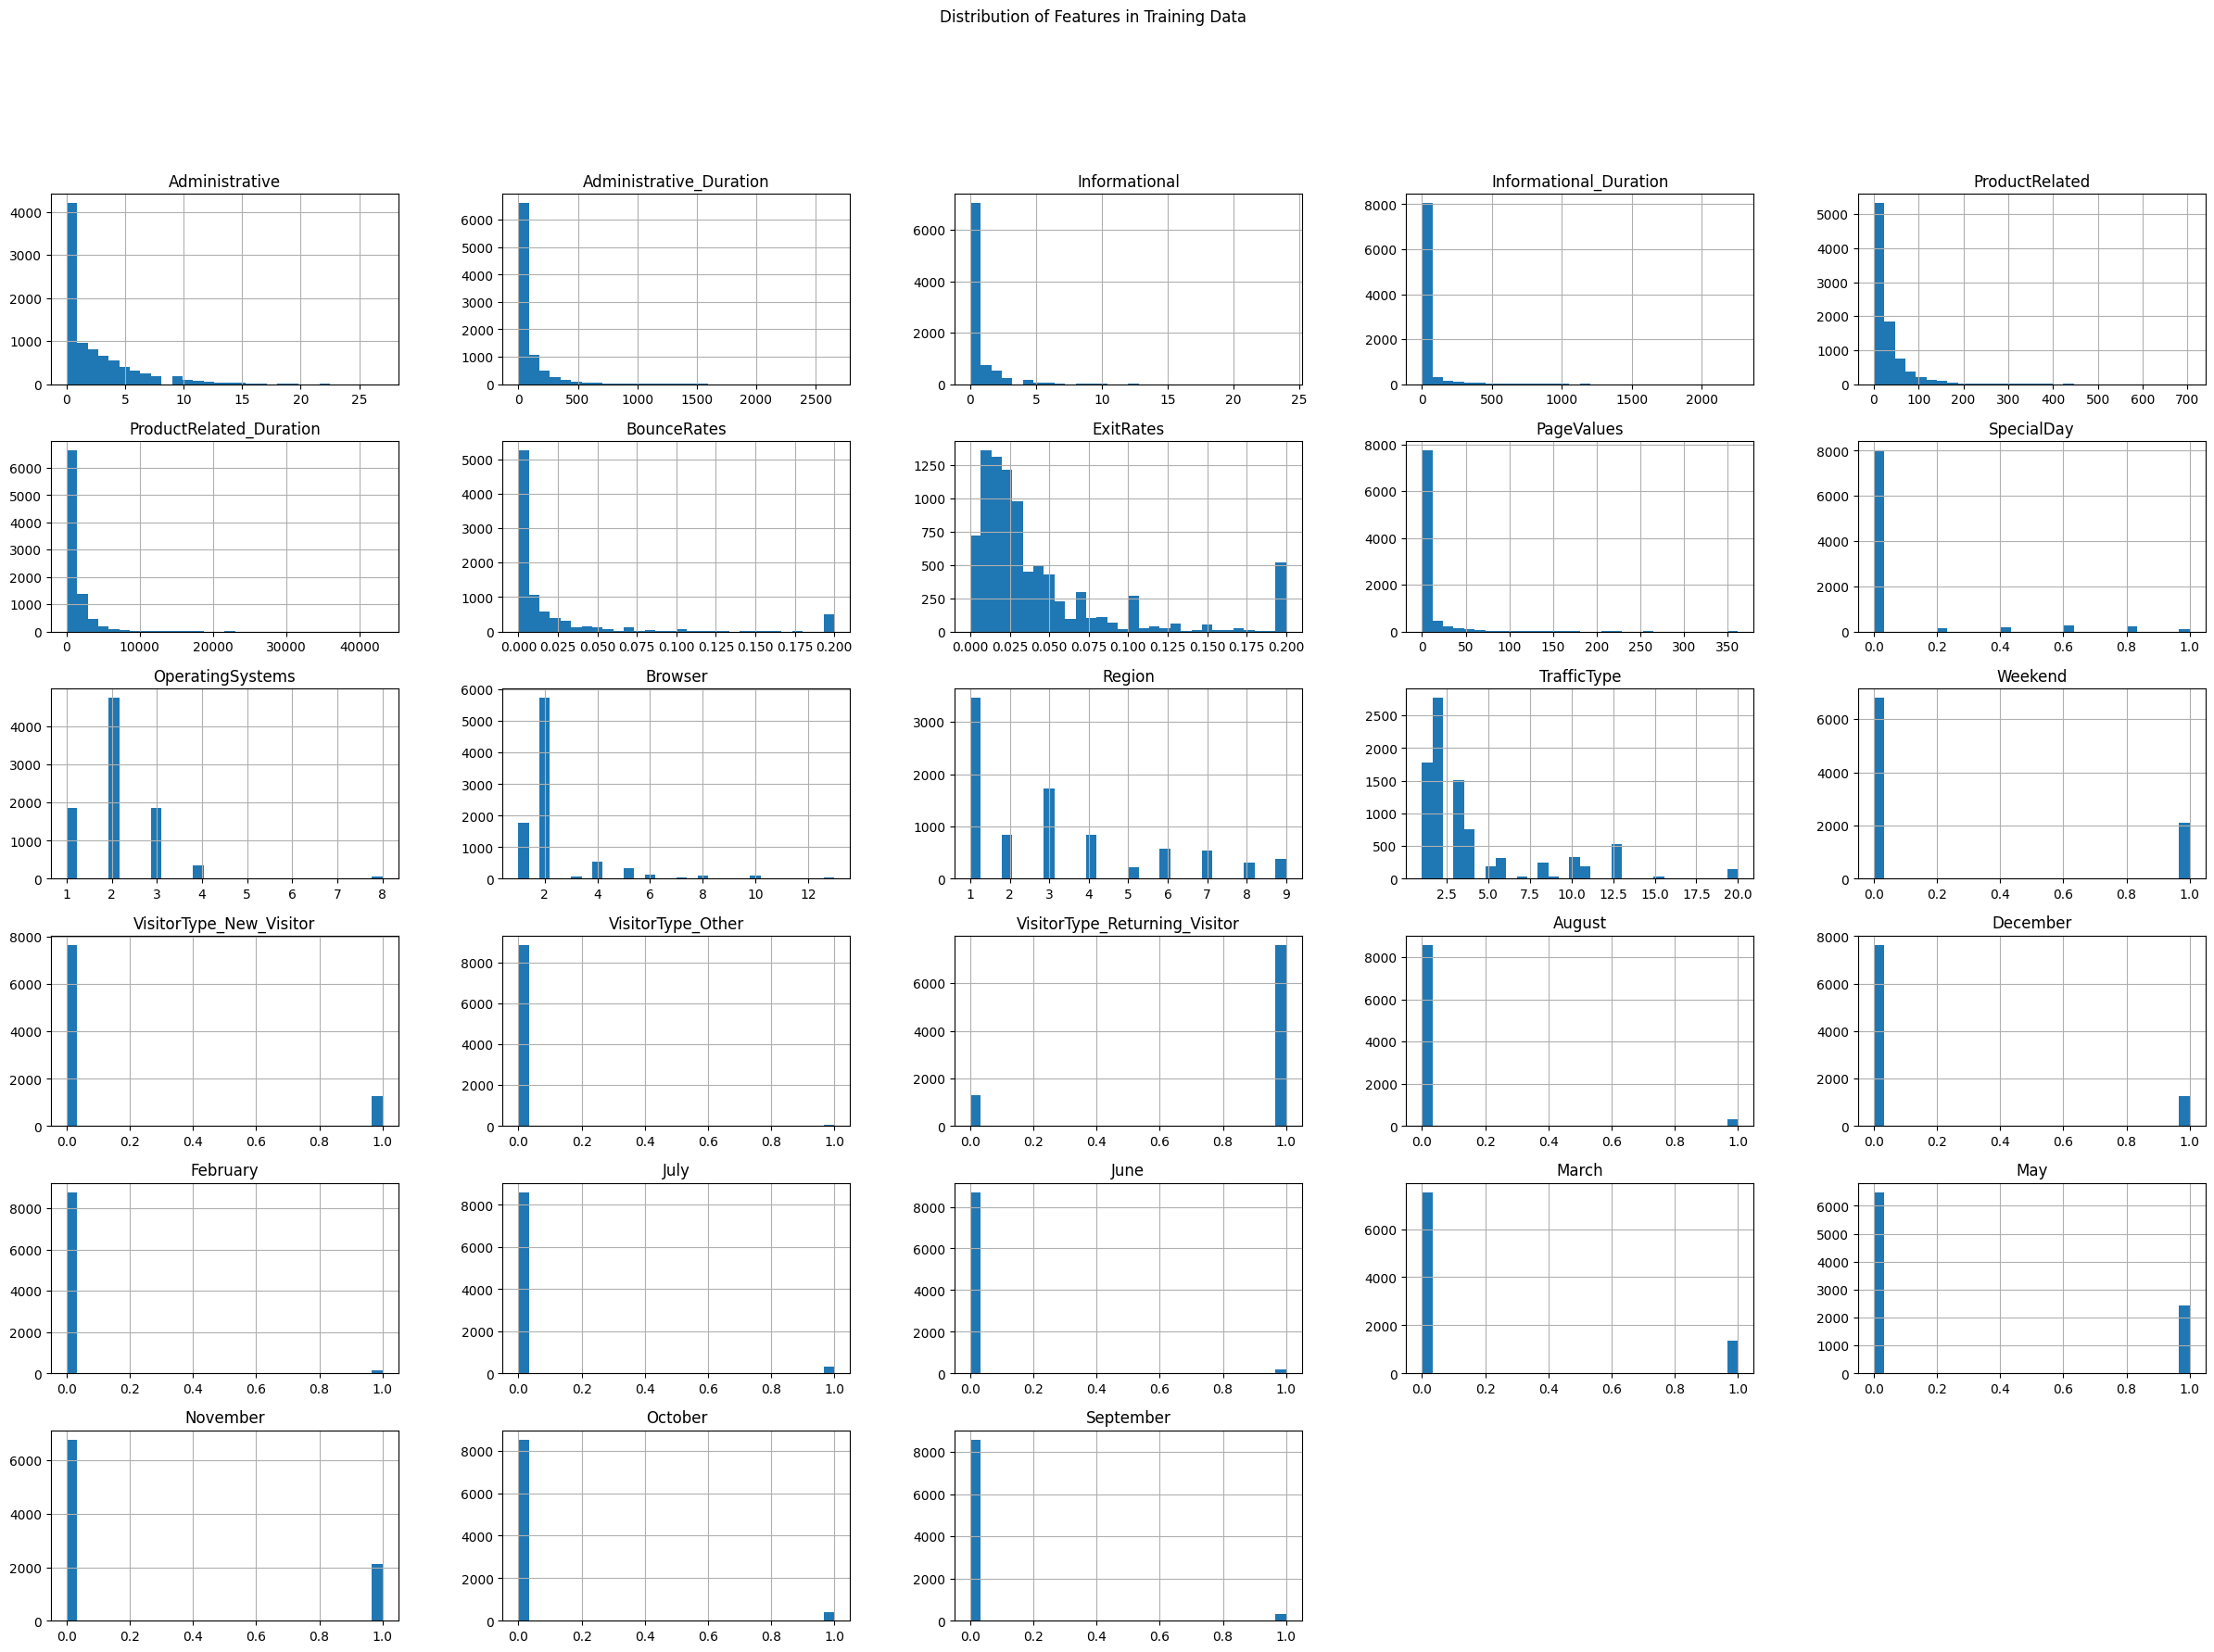

In [224]:
plt.subplots_adjust(left=0.1, bottom=1.3, right=0.9, top=1.5, wspace=0.4, hspace=0.5)
X_cls.hist(bins=30, figsize=(30, 20))
plt.suptitle("Distribution of Features in Training Data")
plt.show()

<Figure size 640x480 with 0 Axes>

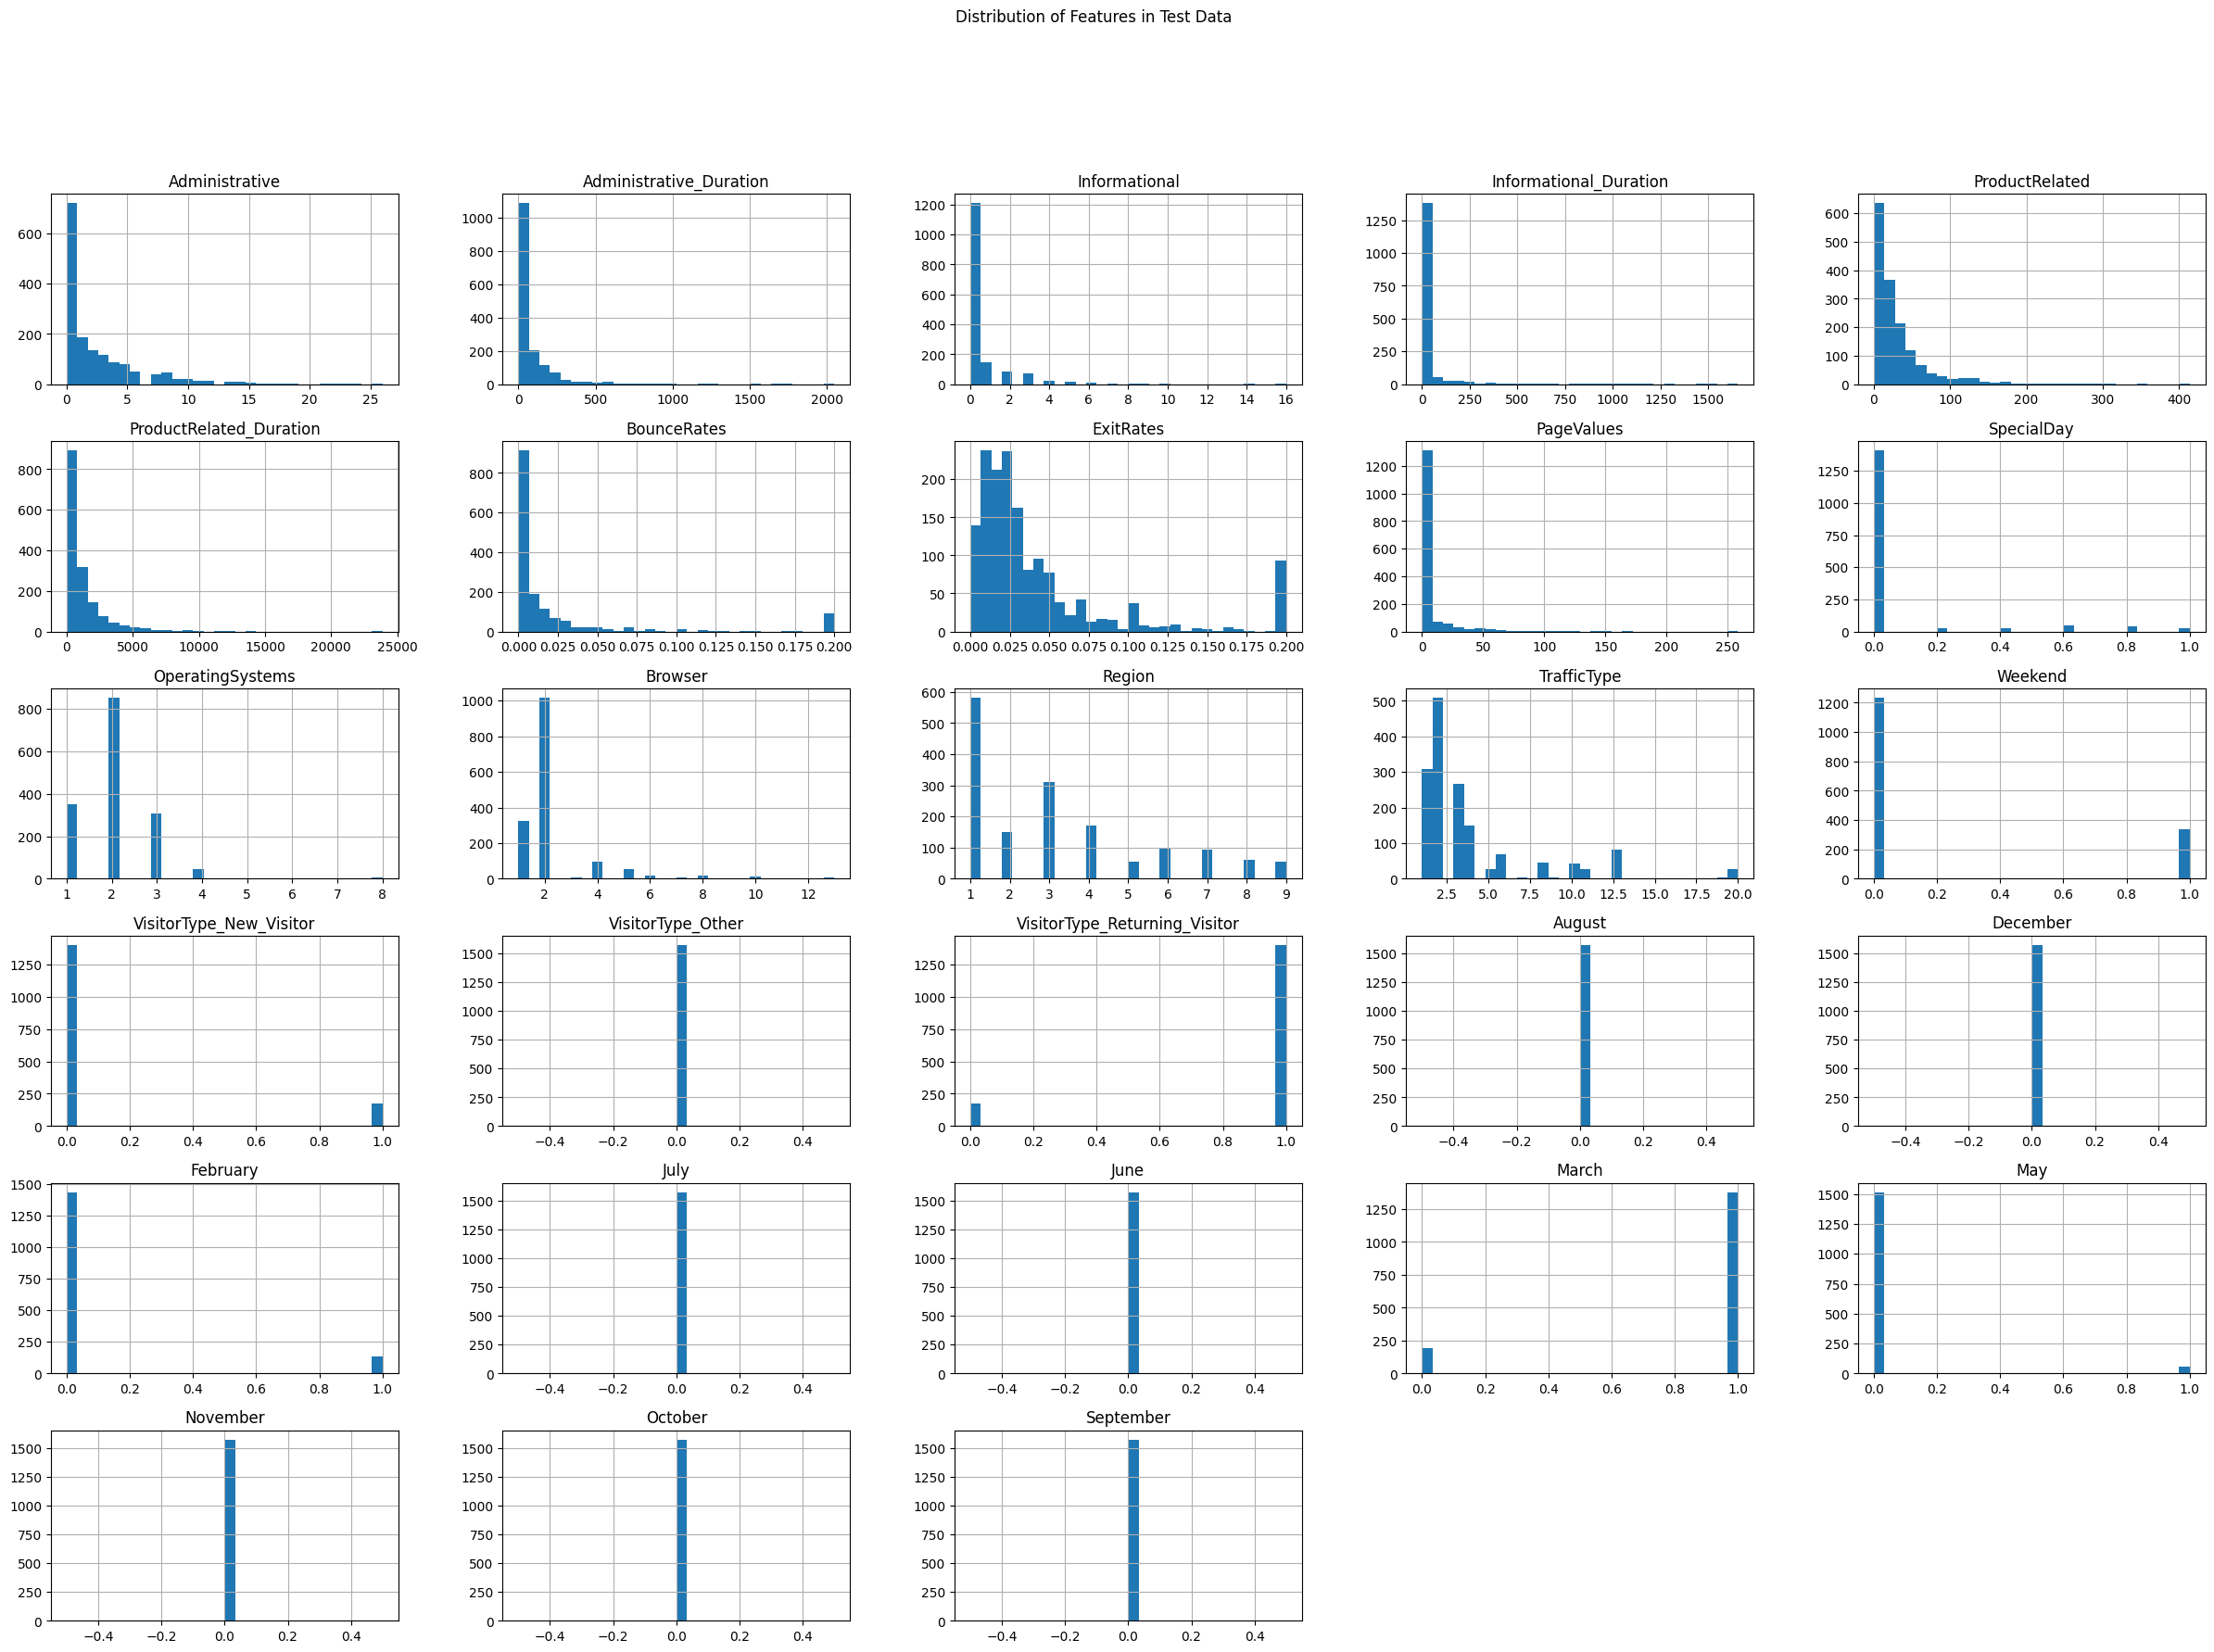

In [225]:
plt.subplots_adjust(left=0.1, bottom=1.3, right=0.9, top=1.5, wspace=0.4, hspace=0.5)
X_test_cls.hist(bins=30, figsize=(30, 20))
plt.suptitle("Distribution of Features in Test Data")
plt.show()

##### Selecting MinMaxScalar for Scaling: 

1) Our classification data has about 85% of False's, 15% of True's. So Standard scaler might be overwhelmed by this class imbalance and performance of our classification models drops significantly we used MinMax Scaler
2) StandardScaler centers and standardizes data based on mean and standard deviation. It works for the features that have roughly normal distributions. However our dataset has significant skewness (leaning heavily towards one side), so StandardScaler might not be effective. MinMaxScaler scales the features to a fixed range (0-1) regardless of the original distribution. This ensures all features contribute more equally to the classification process removing the influence of skewed features.
3) Since the data has outliers. MinMaxScaler focuses on the minimum and maximum values which makes it less susceptible to outliers' influence on the scaling process. This leads to a more robust scaling in scenarios with outliers.
4) Since the data distributions are non-normal, MinMaxScaler offers a more appropriate approach as StandardScaler assumes normality. 

In [226]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMaxScaler object
scalercls = MinMaxScaler()

# Fitting the scaler on the training data and transforming the training data for classification
scalercls.fit(X_cls)
X_scaled_cls = scalercls.transform(X_cls)
X_train_scaled_cls = pd.DataFrame(X_scaled_cls, columns=X_cls.columns)

# Transforming the test data using the scaler fitted on the training data for classification
X_test_scaled_cls = scalercls.transform(X_test_cls)
X_test_scaled_cls = pd.DataFrame(X_test_scaled_cls, columns=X_test_cls.columns)

##### Agglomerative Clustering:

Analyzing the silhouette score to find the best number of clusters for the train data.

In [227]:
# Importing necessary libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# list to store silhouette scores
silhouette_scores_agg_cls = []

# Range of cluster sizes
cluster_range = range(2, 11)

# Iterating through cluster sizes
for n_clusters in cluster_range:
    # Initializing and fitting Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    agg_clustering.fit(X_train_scaled_cls)
    
    # Calculating silhouette score
    silhouette_avg = silhouette_score(X_train_scaled_cls, agg_clustering.labels_)
    silhouette_scores_agg_cls.append(silhouette_avg)

# Finding the best number of clusters based on silhouette score
best_n_clusters_agg_cls = silhouette_scores_agg_cls.index(max(silhouette_scores_agg_cls)) + 2
high_sil_score_agg_cls = max(silhouette_scores_agg_cls)

# Printing the best number of clusters and the corresponding silhouette score
print("Best number of clusters:", best_n_clusters_agg_cls)
print("Highest silhouette score:", high_sil_score_agg_cls)

Best number of clusters: 7
Highest silhouette score: 0.335719246667977


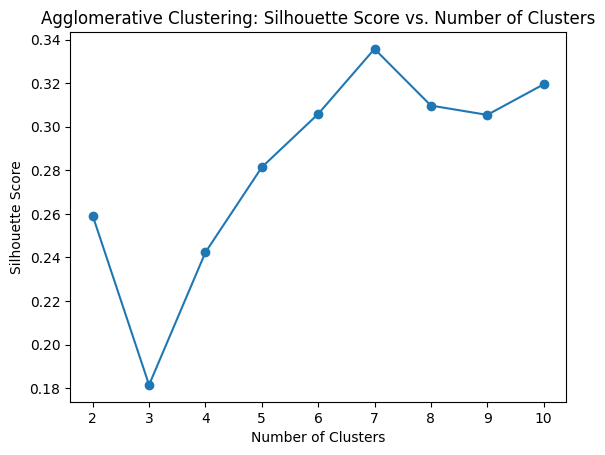

In [228]:
# Plotting silhouette scores against the number of clusters
plt.plot(cluster_range, silhouette_scores_agg_cls, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Agglomerative Clustering: Silhouette Score vs. Number of Clusters')
plt.show()

In [229]:
# Importing Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Creating an instance of Agglomerative Clustering with 7 clusters and using Ward linkage for classification data
agg_clstr_model_cls = AgglomerativeClustering(n_clusters=7, linkage='ward')

# Fitting the model to the scaled classification training data
agg_clstr_model_cls = agg_clstr_model_cls.fit(X_train_scaled_cls)

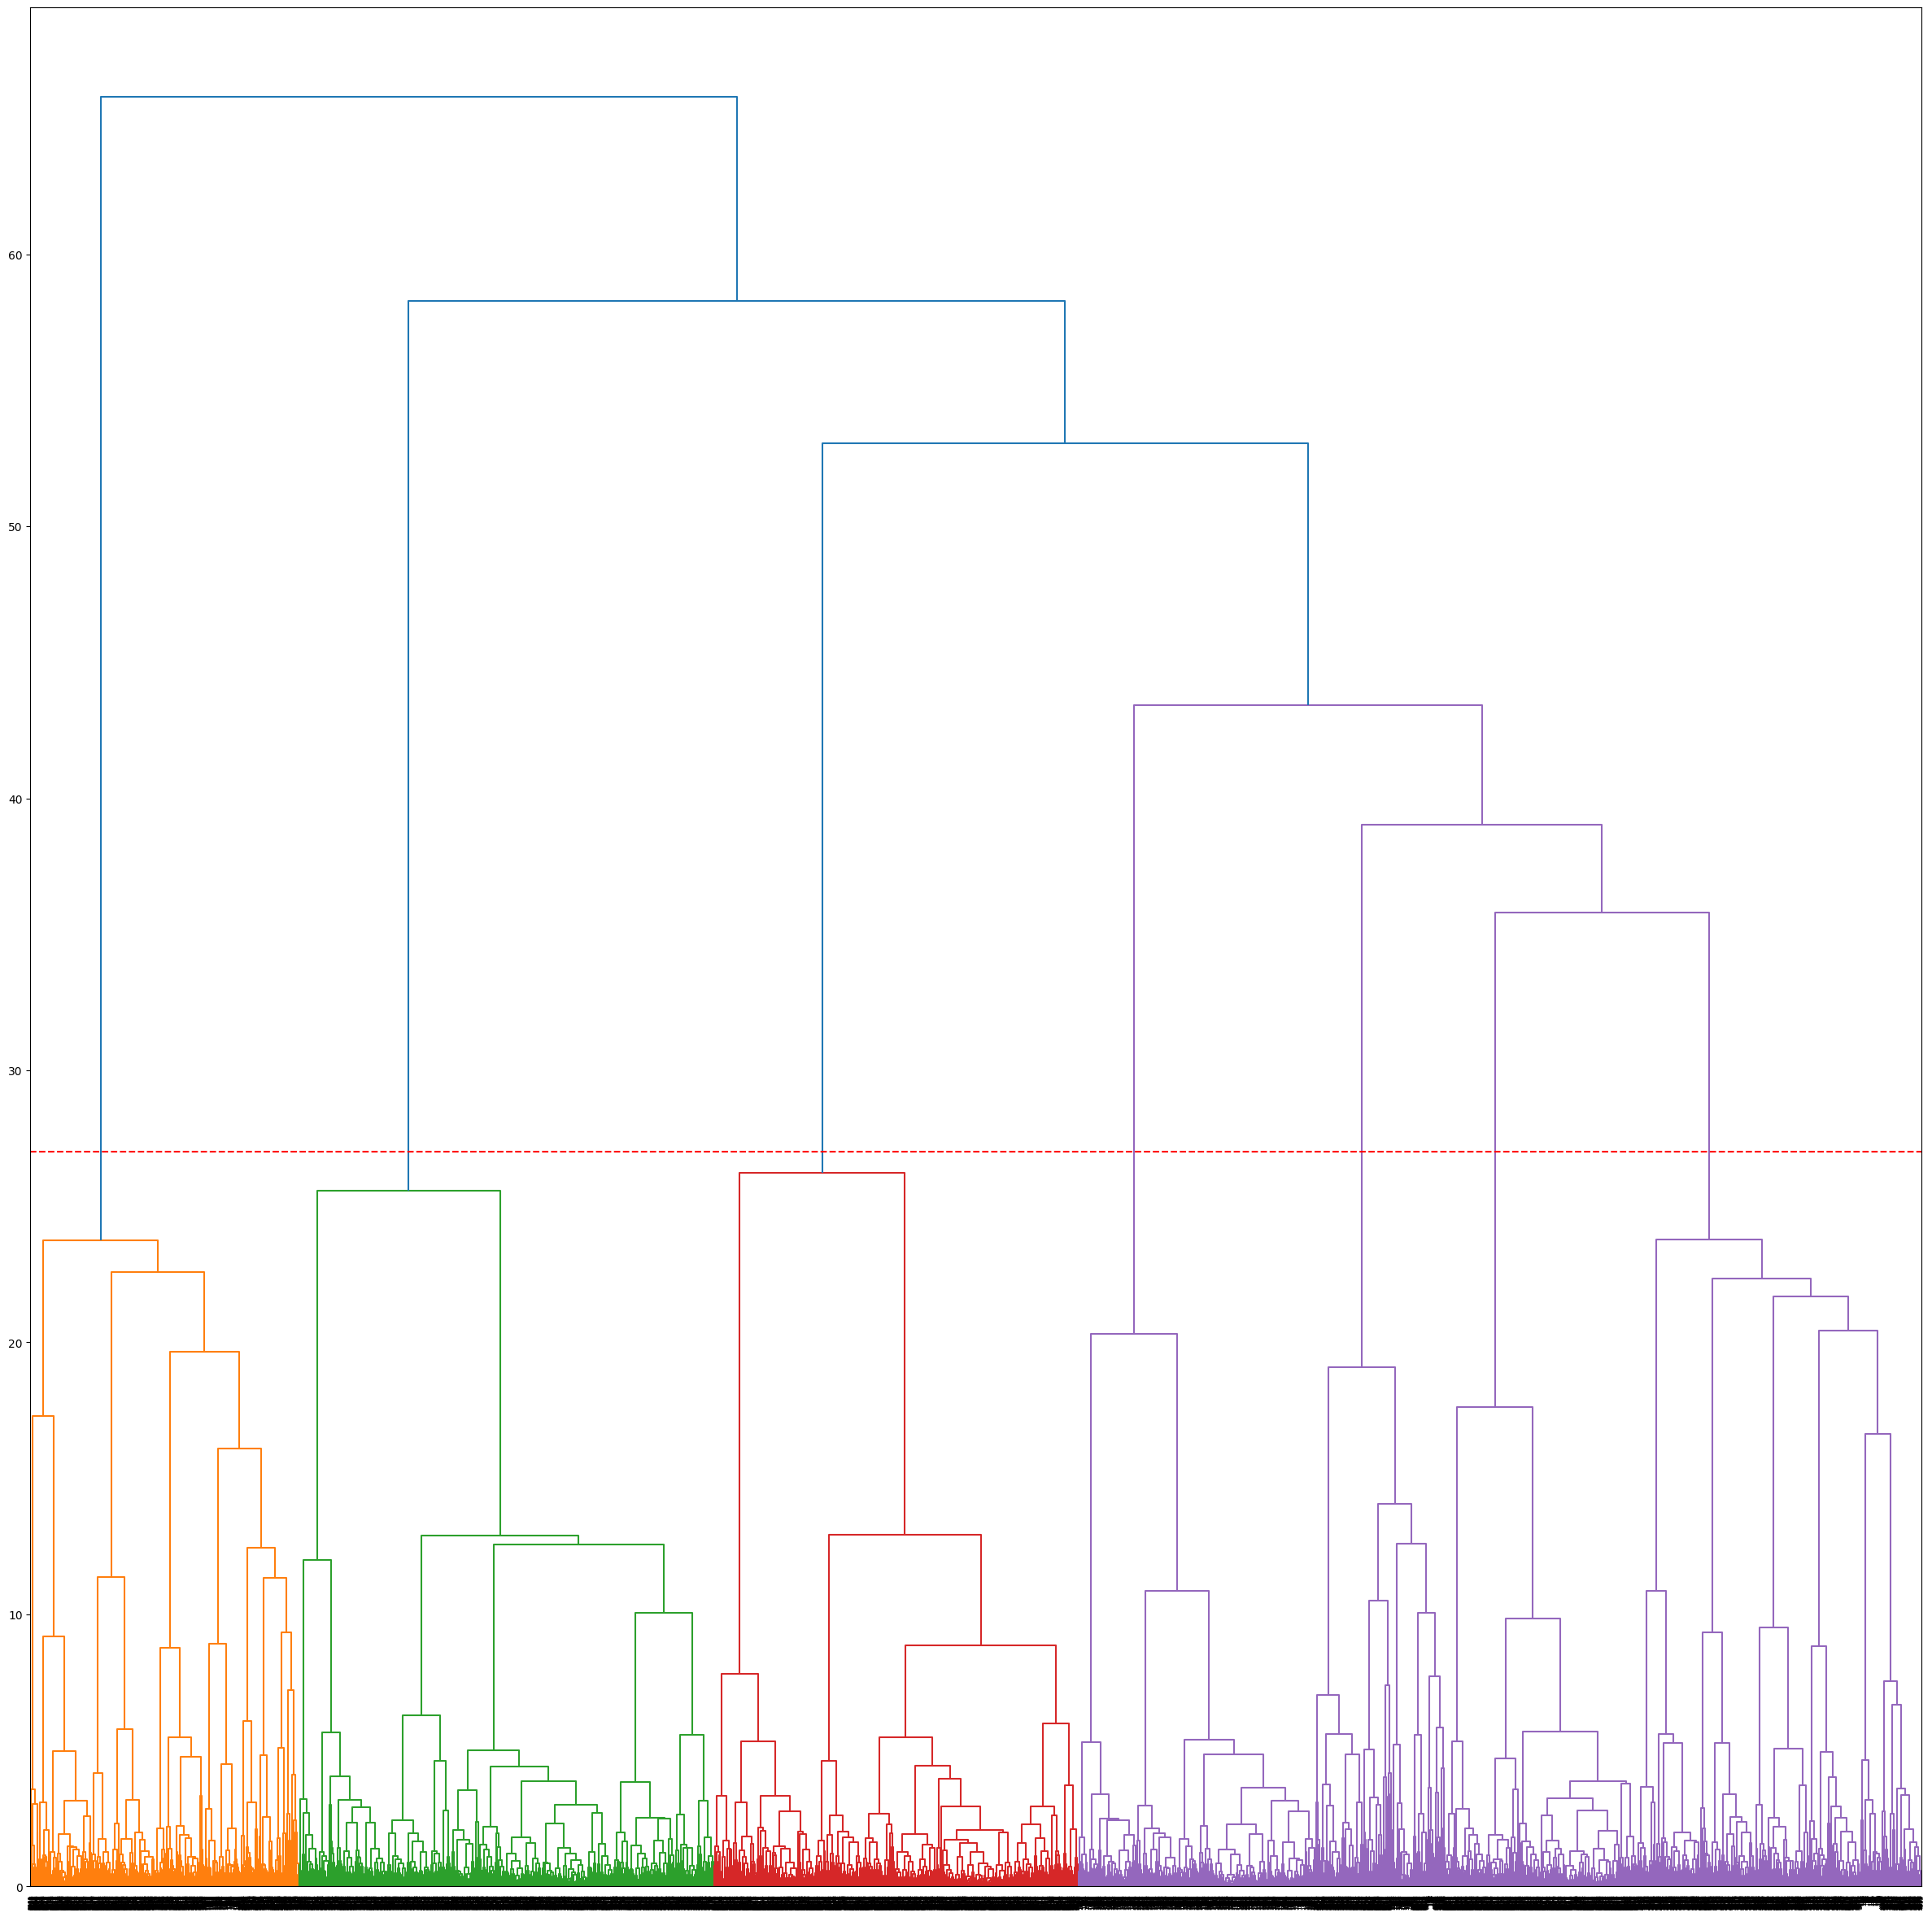

In [230]:
# Importing required libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Plotting dendrogram
plt.subplots(figsize=(30, 30))
dendrogram(linkage(X_train_scaled_cls, method='ward'))

# Adding a horizontal line to mark the threshold distance for 7 clusters
plt.axhline(y=27, c='r', linestyle='--')

# Displaying the plot
plt.show()

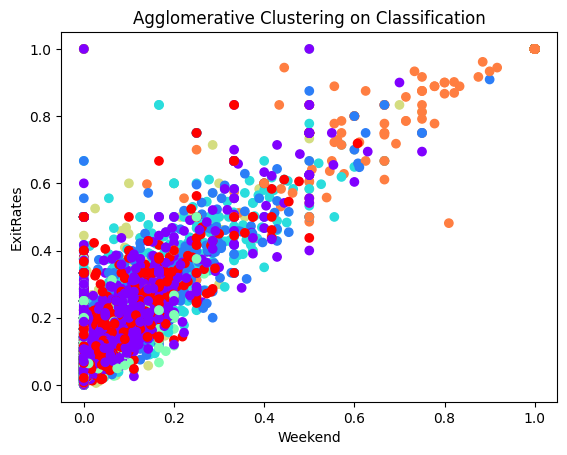

In [231]:
# Fitting the model to the scaled training data and getting cluster labels
agg_clstr_model_cls_labels = agg_clstr_model_cls.fit_predict(X_train_scaled_cls)

# Plotting clusters based on 'BounceRates' and 'ExitRates' features
plt.scatter(X_train_scaled_cls['BounceRates'], X_train_scaled_cls['ExitRates'], c=agg_clstr_model_cls_labels, cmap='rainbow')
plt.xlabel('Weekend')
plt.ylabel('ExitRates')
plt.title('Agglomerative Clustering on Classification')
plt.show()

The clusters are not well-separated which it suggests that there are distinct groups of data points but with similar characteristics in our data.

In [232]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# list to store silhouette scores
silhouette_scores_kmeans = []

# Range of cluster sizes
cluster_range = range(2, 11)

# Iterating through cluster sizes
for n_clusters in cluster_range:
    # Initializing and fitting KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_scaled_cls)
    
    # Calculating silhouette score
    silhouette_avg = silhouette_score(X_train_scaled_cls, kmeans.labels_)
    silhouette_scores_kmeans.append(silhouette_avg)

# Finding the best number of clusters based on silhouette score
best_n_clusters_kmeans = silhouette_scores_kmeans.index(max(silhouette_scores_kmeans)) + 2
high_sil_score_kmeans = max(silhouette_scores_kmeans)

# Printing the best number of clusters and the corresponding silhouette score
print("Best number of clusters:", best_n_clusters_kmeans)
print("Highest silhouette score:", high_sil_score_kmeans)

Best number of clusters: 8
Highest silhouette score: 0.36529067360137446


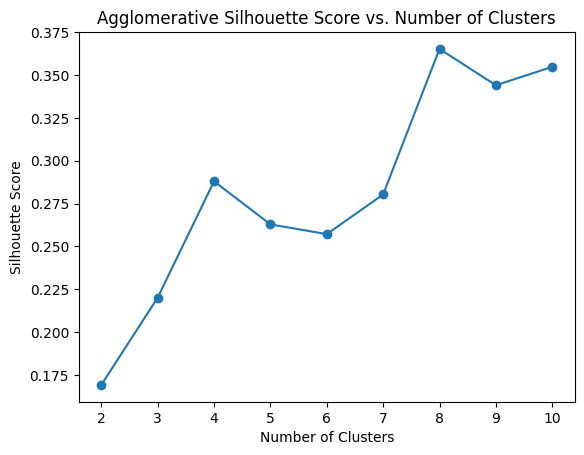

In [233]:
# Plotting silhouette scores against the number of clusters
plt.plot(cluster_range, silhouette_scores_kmeans, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Agglomerative Silhouette Score vs. Number of Clusters')
plt.show()

In [234]:
# Initializing KMeans with the optimal number of clusters
kmeans_cls = KMeans(n_clusters=best_n_clusters_kmeans, random_state = 0, n_init= 'auto')

# Fitting KMeans on the scaled training data for classification
kmeans_cls.fit(X_train_scaled_cls)

# Getting the cluster labels
kmeans_labels_cls = kmeans_cls.labels_

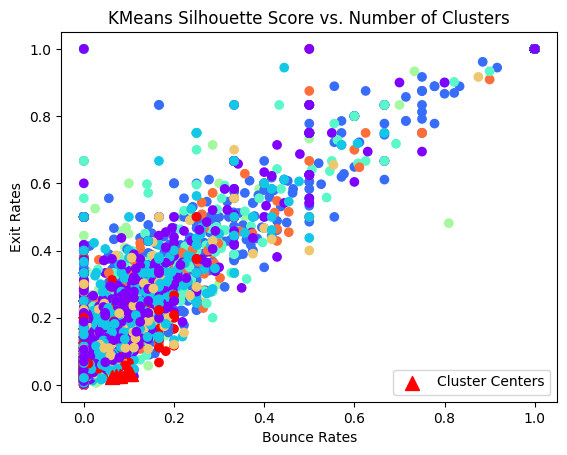

In [235]:
# Plotting clusters based on 'BounceRates' and 'ExitRates' features
plt.scatter(X_train_scaled_cls['BounceRates'], X_train_scaled_cls['ExitRates'], c=kmeans_labels_cls, cmap='rainbow')
plt.scatter(kmeans_cls.cluster_centers_[:, 0], kmeans_cls.cluster_centers_[:, 1],s=100, marker='^', c='red', label='Cluster Centers')
plt.xlabel('Bounce Rates')
plt.ylabel('Exit Rates')
plt.title('KMeans Silhouette Score vs. Number of Clusters')
plt.legend()
plt.show()

Even with KMeans clustering, we are unable to see any clear physical seperation between different features.

### Classification model training

In [236]:
from sklearn.model_selection import train_test_split

# Splitting the scaled training data into training and validation sets
X_train_cls, X_valid_cls, y_train_cls, y_valid_cls = train_test_split(X_train_scaled_cls, y_cls, test_size=0.20, random_state=0)

##### Logistic Regression

In [237]:
# Importing Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initializing Logistic Regression model
logreg = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)

# Fitting Logistic Regression model on the training data
logreg.fit(X_train_cls, y_train_cls)

LogisticRegression(max_iter=1000, random_state=0)

In [238]:
# Importing necessary metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions on the training set
y_train_pred_lr = logreg.predict(X_train_cls)

# Predictions on the validation set
y_valid_pred_lr = logreg.predict(X_valid_cls)

# Printing metrics for the training set
print('Logistic Regression Performance on Training Data')
print('Accuracy score - Train: ', accuracy_score(y_train_cls, y_train_pred_lr))
print('Precision score - Train: ', precision_score(y_train_cls, y_train_pred_lr))
print('Recall score - Train: ', recall_score(y_train_cls, y_train_pred_lr))
print('F1 score - Train: ', f1_score(y_train_cls, y_train_pred_lr))
print('Confusion Matrix - Train:\n', confusion_matrix(y_train_cls, y_train_pred_lr))

# Printing metrics for the validation set
print('Logistic Regression Performance on Validation Data')
print('Accuracy score - Validation: ', accuracy_score(y_valid_cls, y_valid_pred_lr))
print('Precision score - Validation: ', precision_score(y_valid_cls, y_valid_pred_lr))
print('Recall score - Validation: ', recall_score(y_valid_cls, y_valid_pred_lr))
print('F1 score - Validation: ', f1_score(y_valid_cls, y_valid_pred_lr))
print('Confusion Matrix - Validation:\n', confusion_matrix(y_valid_cls, y_valid_pred_lr))

Logistic Regression Performance on Training Data
Accuracy score - Train:  0.8744212150975165
Precision score - Train:  0.8028169014084507
Recall score - Train:  0.25675675675675674
F1 score - Train:  0.3890784982935154
Confusion Matrix - Train:
 [[5947   70]
 [ 825  285]]
Logistic Regression Performance on Validation Data
Accuracy score - Validation:  0.8804713804713805
Precision score - Validation:  0.7469879518072289
Recall score - Validation:  0.2440944881889764
F1 score - Validation:  0.36795252225519287
Confusion Matrix - Validation:
 [[1507   21]
 [ 192   62]]


The model has an accuracy of approximately 87.44% on the training data and 88.05% on the validation data.  
Precision is 80.28% on the training data and 74.70% on the validation data.  
Recall is 25.68% of the positive instances in the training data and 24.41% in the validation data.  
F1 score is 38.91% on the training data and 36.80% on the validation data.  
The confusion matrix shows the actual and predicted values for each class, where the rows represent the actual class and the columns represent the predicted class.  
Overall, the model performs reasonably well in terms of accuracy, but it has relatively low recall, indicating that it struggles to identify positive instances effectively.  

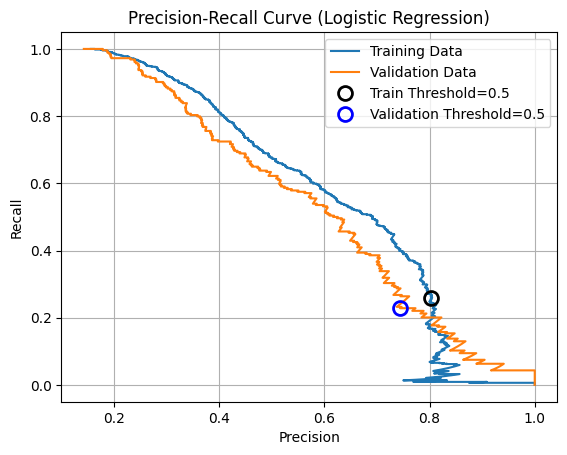

In [239]:
# Importing necessary libraries
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Calculating precision, recall, and thresholds for training data
precision_train_logreg, recall_train_logreg, thresholds_train_logreg = precision_recall_curve(y_train_cls, logreg.predict_proba(X_train_cls)[:, 1])

# Calculating precision, recall, and thresholds for validation data
precision_val_logreg, recall_val_logreg, thresholds_val_logreg = precision_recall_curve(y_valid_cls, logreg.predict_proba(X_valid_cls)[:, 1])

# Plotting Precision-Recall curve for training data
plt.plot(precision_train_logreg, recall_train_logreg, label='Training Data')

# Plotting Precision-Recall curve for validation data
plt.plot(precision_val_logreg, recall_val_logreg, label='Validation Data')

# Finding the threshold closest to 0.5 for training and validation data as we have binary classification
close_zero_train_logreg = np.argmin(np.abs(thresholds_train_logreg - 0.5))
close_zero_val_logreg = np.argmin(np.abs(thresholds_val_logreg - 0.53333333))

# Plotting the threshold points
plt.plot(precision_train_logreg[close_zero_train_logreg], recall_train_logreg[close_zero_train_logreg], 'o', markersize=10, 
         label="Train Threshold=0.5", fillstyle="none", c='k', mew=2)

plt.plot(precision_val_logreg[close_zero_val_logreg], recall_val_logreg[close_zero_val_logreg], 'o', markersize=10, 
         label="Validation Threshold=0.5", fillstyle="none", c='b', mew=2)

# Adding labels and legend
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()
plt.title('Precision-Recall Curve (Logistic Regression)')
plt.show()

The ideal precision-recall curve would be in the upper left corner of the graph, where both precision and recall are high.  
In the above plot, the circles represent the precision and recall for a threshold of 0.5. For the training data, the precision is about 0.8 and recall is 0.2. For validation data, the precision is about 0.7 and recall is 0.2.   
Overall, the precision-recall curve shows that the logistic regression model is able to identify some positive cases, but it also misses some positive cases.  

##### Ridge Classifier

In [240]:
# Importing Ridge Classifier from sklearn
from sklearn.linear_model import RidgeClassifier

# Initializing Ridge Classifier model
rdgclsfr = RidgeClassifier()

# Fitting Ridge Classifier model on the training data
rdgclsfr.fit(X_train_cls, y_train_cls)

RidgeClassifier()

In [241]:
# Importing necessary metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions on the training set
y_train_pred_rdgclsfr = rdgclsfr.predict(X_train_cls)

# Predictions on the validation set
y_valid_pred_rdgclsfr = rdgclsfr.predict(X_valid_cls)

# Printing metrics for the training set
print('Ridge Classifier Performance on Training Data')
print('Accuracy score - Train: ', accuracy_score(y_train_cls, y_train_pred_rdgclsfr))
print('Precision score - Train: ', precision_score(y_train_cls, y_train_pred_rdgclsfr))
print('Recall score - Train: ', recall_score(y_train_cls, y_train_pred_rdgclsfr))
print('F1 score - Train: ', f1_score(y_train_cls, y_train_pred_rdgclsfr))
print('Confusion Matrix - Train:\n', confusion_matrix(y_train_cls, y_train_pred_rdgclsfr))

# Printing metrics for the validation set
print('Ridge Classifier Performance on Validation Data')
print('Accuracy score - Validation: ', accuracy_score(y_valid_cls, y_valid_pred_rdgclsfr))
print('Precision score - Validation: ', precision_score(y_valid_cls, y_valid_pred_rdgclsfr))
print('Recall score - Validation: ', recall_score(y_valid_cls, y_valid_pred_rdgclsfr))
print('F1 score - Validation: ', f1_score(y_valid_cls, y_valid_pred_rdgclsfr))
print('Confusion Matrix - Validation:\n', confusion_matrix(y_valid_cls, y_valid_pred_rdgclsfr))

Ridge Classifier Performance on Training Data
Accuracy score - Train:  0.8686684439455591
Precision score - Train:  0.8041958041958042
Recall score - Train:  0.2072072072072072
F1 score - Train:  0.32951289398280803
Confusion Matrix - Train:
 [[5961   56]
 [ 880  230]]
Ridge Classifier Performance on Validation Data
Accuracy score - Validation:  0.8804713804713805
Precision score - Validation:  0.7808219178082192
Recall score - Validation:  0.22440944881889763
F1 score - Validation:  0.3486238532110092
Confusion Matrix - Validation:
 [[1512   16]
 [ 197   57]]


The model achieves an accuracy of around 87% on the training data and 88% on the validation data, indicating good overall performance.  
The precision score on the training data is approximately 80%, meaning that when the model predicts a positive class, it is correct around 80% of the time.  
The recall score, however, is relatively low, around 21% on the training data and 22% on the validation data, indicating that the model identifies only a small proportion of actual positives.  
The F1 score, which considers both precision and recall, is around 33% on the training data and 35% on the validation data.  

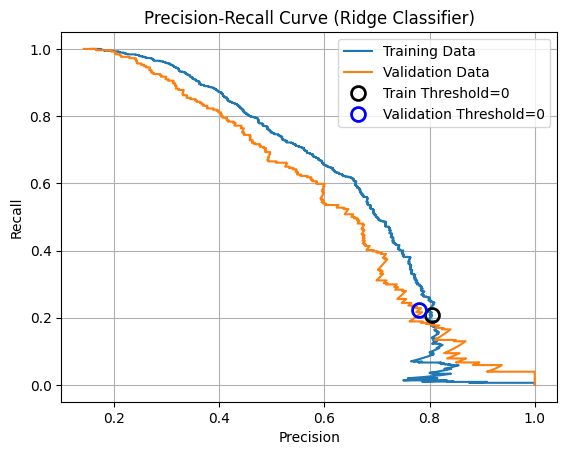

In [242]:
# Importing precision_recall_curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Calculating precision and recall for training set
precision_train_rdgclsfr, recall_train_rdgclsfr, thresholds_train_rdgclsfr = precision_recall_curve(y_train_cls, rdgclsfr.decision_function(X_train_cls))
# Calculating precision and recall for validation set
precision_val_rdgclsfr, recall_val_rdgclsfr, thresholds_val_rdgclsfr = precision_recall_curve(y_valid_cls, rdgclsfr.decision_function(X_valid_cls))

# Plotting Precision-Recall Curve
plt.plot(precision_train_rdgclsfr, recall_train_rdgclsfr, label='Training Data')
plt.plot(precision_val_rdgclsfr, recall_val_rdgclsfr, label='Validation Data')

# Finding threshold closest to zero
close_zero_train_rdgclsfr = np.argmin(np.abs(thresholds_train_rdgclsfr - 0))
close_zero_val_rdgclsfr = np.argmin(np.abs(thresholds_val_rdgclsfr - 0))

# Marking the threshold closest to zero on the curve
plt.plot(precision_train_rdgclsfr[close_zero_train_rdgclsfr], recall_train_rdgclsfr[close_zero_train_rdgclsfr], 'o', markersize=10, 
         label="Train Threshold=0", fillstyle="none", c='k', mew=2)

plt.plot(precision_val_rdgclsfr[close_zero_val_rdgclsfr], recall_val_rdgclsfr[close_zero_val_rdgclsfr], 'o', markersize=10, 
         label="Validation Threshold=0", fillstyle="none", c='b', mew=2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()
plt.title('Precision-Recall Curve (Ridge Classifier)')
plt.show()

By choosing the threshold closest to zero, we aim to visualize the classifier's performance near the decision boundary which provides insights into how well the classifier can separate the two classes.  
For the training data, the precision is about 0.8 and recall is 0.2. For validation data, the precision is about 0.7 and recall is 0.2.  
Overall, the precision-recall curve shows that  the ridge classifier model is able to identify some positive cases but it also misses some positive cases.  .

##### SGD Classifier

In [243]:
import warnings
from sklearn.linear_model import SGDClassifier
from sklearn.exceptions import ConvergenceWarning 

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)  

# Lists to store training and validation scores
train_score_sgd = []
validation_score_sgd = []
index_sgd = []

# Loop through different parameters to find the best combination
for max_iter in [15, 50, 100, 1000]:
    for loss in ['hinge', 'log_loss', 'modified_huber']:
        for penalty in ['l2', 'l1']:
            for alpha in [0.0001, 0.001, 0.01, 0.1, 1]:
                # Define and fit SGDClassifier model
                sgdclsfr = SGDClassifier(random_state=0, max_iter=max_iter, loss=loss, alpha=alpha, penalty=penalty)
                sgdclsfr.fit(X_train_cls, y_train_cls)
                
                # Append scores and parameters to lists
                train_score_sgd.append(sgdclsfr.score(X_train_cls, y_train_cls))
                validation_score_sgd.append(sgdclsfr.score(X_valid_cls, y_valid_cls))
                index_sgd.append((max_iter, loss, penalty, alpha))

# Find best parameter set
best_index_sgd = validation_score_sgd.index(max(validation_score_sgd))
best_params_sgd = index_sgd[best_index_sgd]
print("Best Parameters for SGD Classifier:", best_params_sgd)

Best Parameters for SGD Classifier: (100, 'modified_huber', 'l1', 0.001)


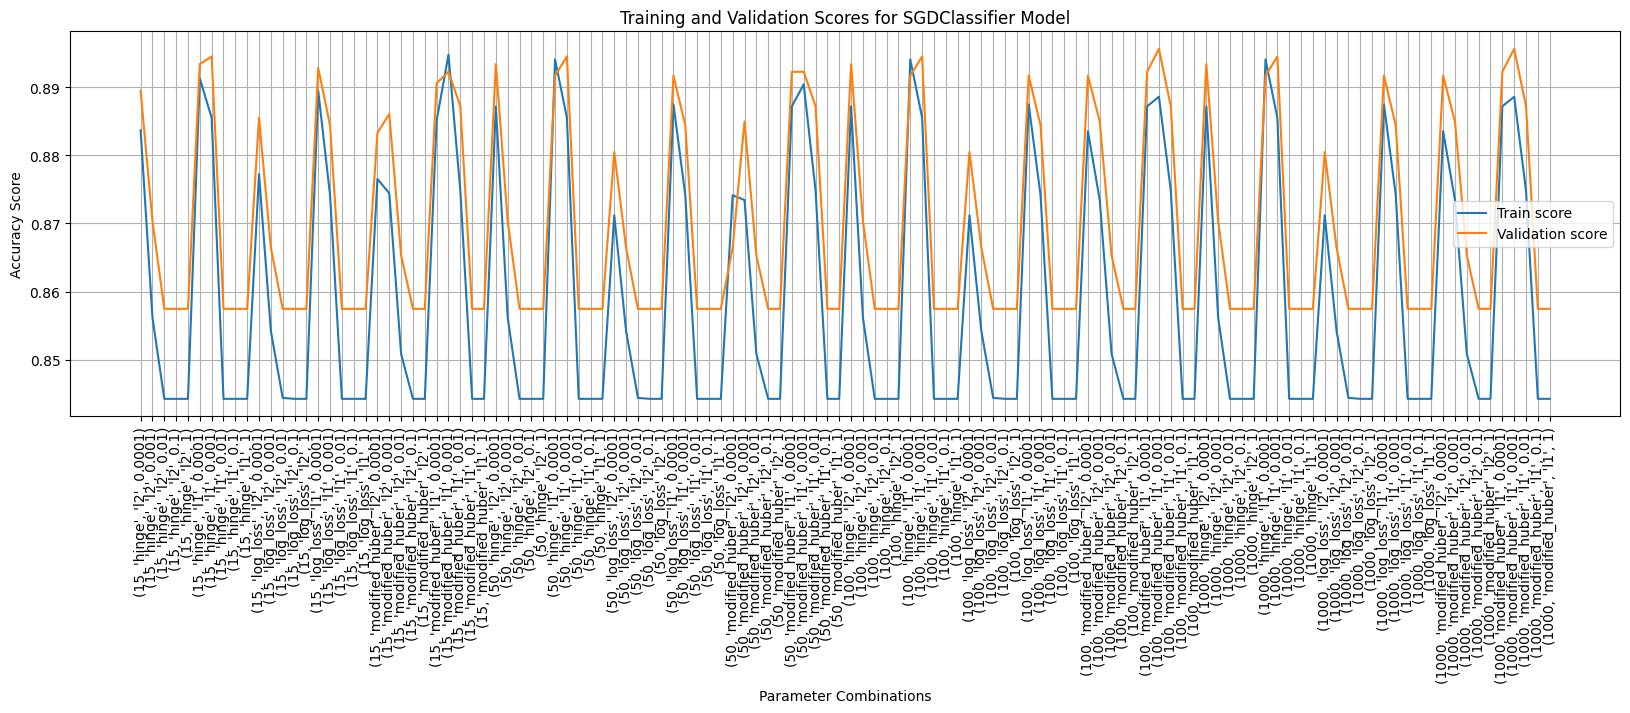

In [244]:
%matplotlib inline

# Create subplots
plt.subplots(figsize=(20, 5))

# Plot training and validation scores
plt.plot(range(len(index_sgd)), train_score_sgd, label='Train score')
plt.plot(range(len(index_sgd)), validation_score_sgd, label='Validation score')

# Set x-axis ticks and labels
plt.xticks(range(len(index_sgd)), index_sgd, rotation=90)

# Add legend, grid, and labels
plt.legend()
plt.grid()
plt.xlabel('Parameter Combinations')
plt.ylabel('Accuracy Score')
plt.title('Training and Validation Scores for SGDClassifier Model')
plt.show()

In [245]:
# Importing the SGDClassifier
from sklearn.linear_model import SGDClassifier

# Initializing the SGDClassifier model with the best parameters
best_sgdclsfr = SGDClassifier(random_state=0, max_iter=100, loss='modified_huber', penalty='l1', alpha=0.001)

# Fitting the model on the training data
best_sgdclsfr.fit(X_train_cls, y_train_cls)

SGDClassifier(alpha=0.001, loss='modified_huber', max_iter=100, penalty='l1',
              random_state=0)

In [246]:
# Importing necessary metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions on the training set
y_train_pred_sgd = best_sgdclsfr.predict(X_train_cls)

# Predictions on the validation set
y_valid_pred_sgd = best_sgdclsfr.predict(X_valid_cls)

# Printing metrics for the training set
print('SGD Classifier Performance on Training Data')
print('Accuracy score - Train: ', accuracy_score(y_train_cls, y_train_pred_sgd))
print('Precision score - Train: ', precision_score(y_train_cls, y_train_pred_sgd))
print('Recall score - Train: ', recall_score(y_train_cls, y_train_pred_sgd))
print('F1 score - Train: ', f1_score(y_train_cls, y_train_pred_sgd))
print('Confusion Matrix - Train:\n', confusion_matrix(y_train_cls, y_train_pred_sgd))

# Printing metrics for the validation set
print('SGD Classifier Performance on Validation Data')
print('Accuracy score - Validation: ', accuracy_score(y_valid_cls, y_valid_pred_sgd))
print('Precision score - Validation: ', precision_score(y_valid_cls, y_valid_pred_sgd))
print('Recall score - Validation: ', recall_score(y_valid_cls, y_valid_pred_sgd))
print('F1 score - Validation: ', f1_score(y_valid_cls, y_valid_pred_sgd))
print('Confusion Matrix - Validation:\n', confusion_matrix(y_valid_cls, y_valid_pred_sgd))

SGD Classifier Performance on Training Data
Accuracy score - Train:  0.8885926757401431
Precision score - Train:  0.7548387096774194
Recall score - Train:  0.42162162162162165
F1 score - Train:  0.5410404624277456
Confusion Matrix - Train:
 [[5865  152]
 [ 642  468]]
SGD Classifier Performance on Validation Data
Accuracy score - Validation:  0.8956228956228957
Precision score - Validation:  0.7236842105263158
Recall score - Validation:  0.4330708661417323
F1 score - Validation:  0.541871921182266
Confusion Matrix - Validation:
 [[1486   42]
 [ 144  110]]


The model achieves an accuracy of around 88% on the training data and 89% on the validation data which indicates good overall performance.  
The precision score on the training data is approximately 75%, meaning that when the model predicts a positive class, it is correct around 75% of the time. It is 72% precise on validation data.  
The recall score is 42% on the training data and 43% on the validation data, which is better then tha previous models.  
The F1 score is around 54% on the training data and 54% on the validation data.  

##### Decision Tree Classifier

In [247]:
from sklearn.tree import DecisionTreeClassifier

# Lists to store training and validation scores
train_score_dtc = []
validation_score_dtc = []
index_dtc = []

# Loop through different combinations of hyperparameters
for max_depth in [2, 3, 6, 8]:
     for min_samples_split in [2, 4, 6]:
         for min_samples_leaf in [2, 3, 5]:
             for min_impurity_decrease in [0.0001, 0.001, 0.01, 0.1]:
                 # Initialize and fit DecisionTreeClassifier
                 dtclsfr = DecisionTreeClassifier(random_state=0, max_depth=max_depth, 
                                                  min_samples_split=min_samples_split, 
                                                  min_samples_leaf=min_samples_leaf, 
                                                  min_impurity_decrease=min_impurity_decrease)
                 dtclsfr.fit(X_train_cls, y_train_cls)
                 
                 # Append training and validation scores
                 train_score_dtc.append(dtclsfr.score(X_train_cls, y_train_cls))
                 validation_score_dtc.append(dtclsfr.score(X_valid_cls, y_valid_cls))
                 index_dtc.append((max_depth, min_samples_split, min_samples_leaf, min_impurity_decrease))

# Find the best parameters based on validation score
best_index_dtc = validation_score_dtc.index(max(validation_score_dtc))
best_params_dtc = index_dtc[best_index_dtc] 
print("Best Parameters:", best_params_dtc)

Best Parameters: (6, 2, 2, 0.0001)


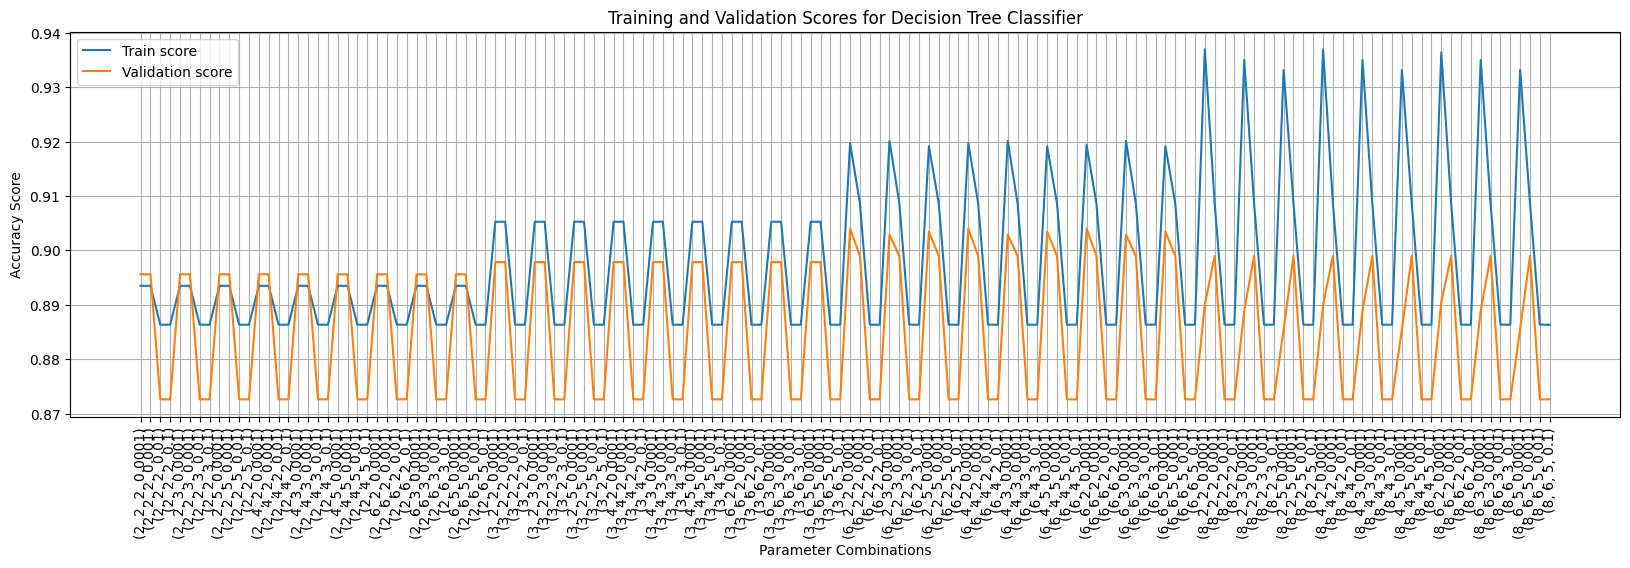

In [248]:
# Plotting the train and validation scores for decision Tree
%matplotlib inline

# Create subplots
plt.subplots(figsize=(20, 5))

# Plot training and validation scores
plt.plot(range(len(index_dtc)), train_score_dtc, label='Train score')
plt.plot(range(len(index_dtc)), validation_score_dtc, label='Validation score')

# Set x-axis ticks and labels
plt.xticks(range(len(index_dtc)), index_dtc, rotation=90)

# Add legend, grid, and labels
plt.legend()
plt.grid()
plt.xlabel('Parameter Combinations')
plt.ylabel('Accuracy Score')
plt.title('Training and Validation Scores for Decision Tree Classifier')
plt.show()

In [249]:
from sklearn.tree import DecisionTreeClassifier

# Initializing Decision Tree Classifier with best parameters
dtclsfr_best = DecisionTreeClassifier(random_state=0, 
                                       max_depth=6, 
                                       min_samples_split=2, 
                                       min_samples_leaf=2, 
                                       min_impurity_decrease=0.0001)

# Fitting the model
dtclsfr_best.fit(X_train_cls, y_train_cls)

DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.0001,
                       min_samples_leaf=2, random_state=0)

In [250]:
# Importing necessary metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions on the training set
y_train_pred_dtc = dtclsfr_best.predict(X_train_cls)

# Predictions on the validation set
y_valid_pred_dtc = dtclsfr_best.predict(X_valid_cls)

# Printing metrics for the training set
print('Decision Tree Classifier Performance on Training Data')
print('Accuracy score - Train: ', accuracy_score(y_train_cls, y_train_pred_dtc))
print('Precision score - Train: ', precision_score(y_train_cls, y_train_pred_dtc))
print('Recall score - Train: ', recall_score(y_train_cls, y_train_pred_dtc))
print('F1 score - Train: ', f1_score(y_train_cls, y_train_pred_dtc))
print('Confusion Matrix - Train:\n', confusion_matrix(y_train_cls, y_train_pred_dtc))

# Printing metrics for the validation set
print('Decision Tree Classifier Performance on Validation Data')
print('Accuracy score - Validation: ', accuracy_score(y_valid_cls, y_valid_pred_dtc))
print('Precision score - Validation: ', precision_score(y_valid_cls, y_valid_pred_dtc))
print('Recall score - Validation: ', recall_score(y_valid_cls, y_valid_pred_dtc))
print('F1 score - Validation: ', f1_score(y_valid_cls, y_valid_pred_dtc))
print('Confusion Matrix - Validation:\n', confusion_matrix(y_valid_cls, y_valid_pred_dtc))

Decision Tree Classifier Performance on Training Data
Accuracy score - Train:  0.9197418268556194
Precision score - Train:  0.8240963855421687
Recall score - Train:  0.6162162162162163
F1 score - Train:  0.7051546391752578
Confusion Matrix - Train:
 [[5871  146]
 [ 426  684]]
Decision Tree Classifier Performance on Validation Data
Accuracy score - Validation:  0.9040404040404041
Precision score - Validation:  0.7128205128205128
Recall score - Validation:  0.547244094488189
F1 score - Validation:  0.6191536748329621
Confusion Matrix - Validation:
 [[1472   56]
 [ 115  139]]


The Decision Tree Classifier has achieved good accuracy on both the training and validation sets, with a slightly lower performance on the validation set compared to the training set.  
The precision and recall scores indicate that the model is reasonably good at correctly classifying positive instances (revenue = True). 
The confusion matrix shows the actual and predicted classes has a good number of true positives and false negatives. 
The models recall score is relatively higher than previous models.

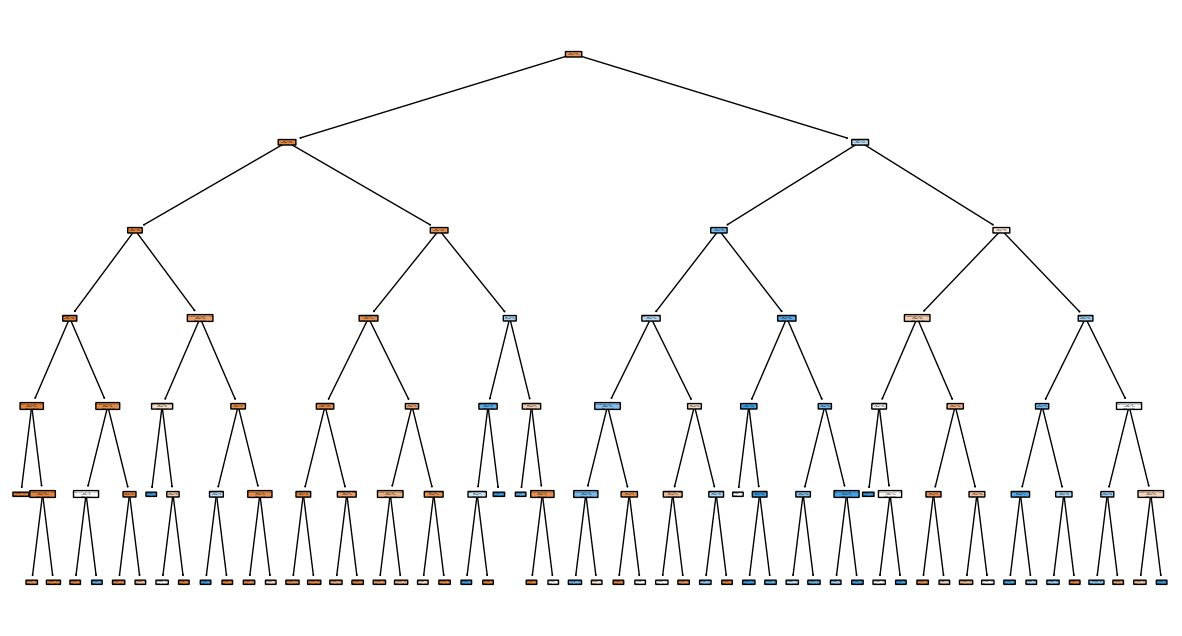

In [251]:
from sklearn import tree 

# Plot the decision tree
plt.subplots(figsize=(15, 8))
tree.plot_tree(dtclsfr_best,  # The trained decision tree model
               feature_names=X_train_cls.columns,  # Feature names
               filled=True,  # Fill the nodes with colors
               rounded=True)  # Round the corners of the nodes
plt.show()

##### Bagging Classifier

In [252]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Lists to store training and validation scores
train_score_bc = []
validation_score_bc = []
index_bc = []

# Loop through different combinations of hyperparameters
for max_depth in [2, 4, 6, 8]:
    for n_estimators in [200, 300, 400]:
        for max_samples in [0.01, 0.03, 0.5]:
            for max_features in [0.01, 0.03, 0.5]:
                # Initialize and fit BaggingClassifier
                baggingclsfr = BaggingClassifier(DecisionTreeClassifier(max_depth=max_depth, random_state=0),
                                       n_estimators=n_estimators,
                                       max_samples=max_samples,
                                       max_features=max_features,
                                       random_state=0)
                baggingclsfr.fit(X_train_cls, y_train_cls)
                
                # Append training and validation scores
                train_score_bc.append(baggingclsfr.score(X_train_cls, y_train_cls))
                validation_score_bc.append(baggingclsfr.score(X_valid_cls, y_valid_cls))
                index_bc.append((max_depth, n_estimators, max_samples, max_features))

# Find the best parameters based on validation score
best_index_bc = validation_score_bc.index(max(validation_score_bc))
best_params_bc = index_bc[best_index_bc]
print("Best Parameters:", best_params_bc)

Best Parameters: (6, 400, 0.5, 0.5)


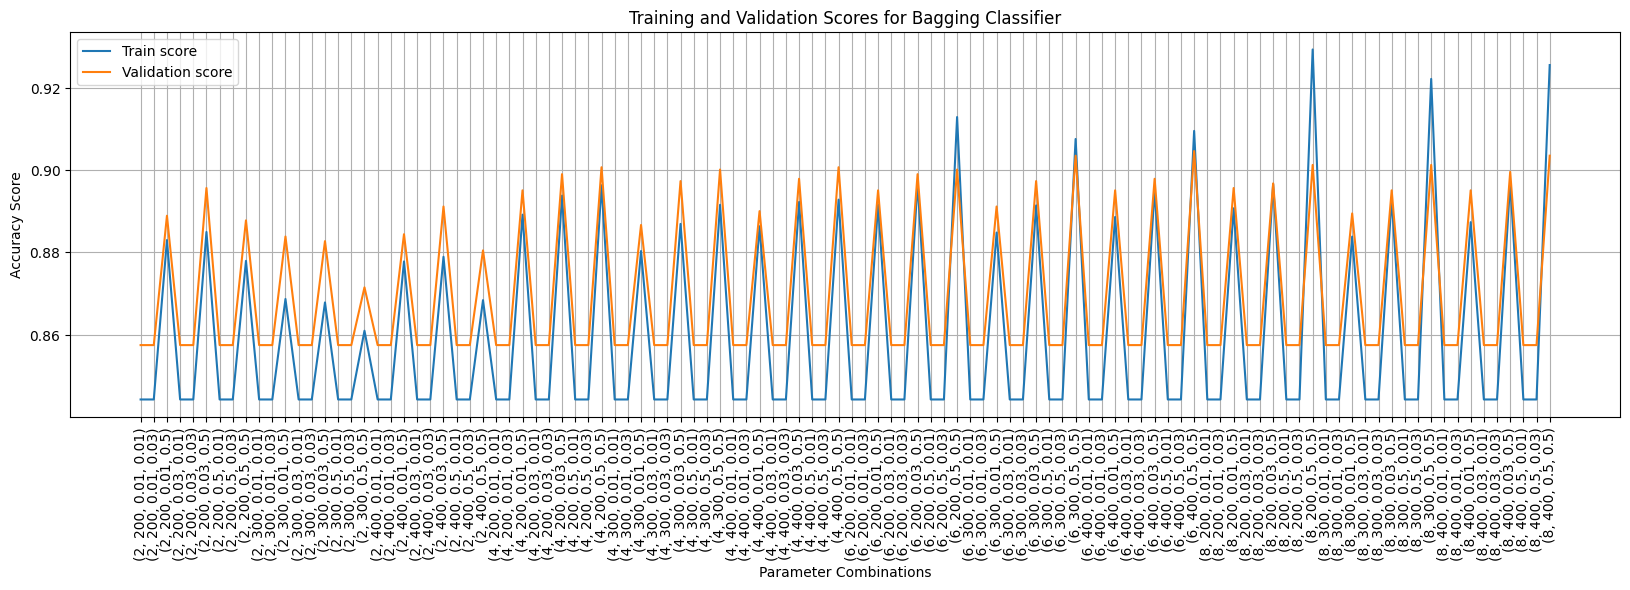

In [253]:
# Plotting the train and validation scores for decision Tree
%matplotlib inline

# Create subplots
plt.subplots(figsize=(20, 5))

# Plot training and validation scores
plt.plot(range(len(index_bc)), train_score_bc, label='Train score')
plt.plot(range(len(index_bc)), validation_score_bc, label='Validation score')

# Set x-axis ticks and labels
plt.xticks(range(len(index_bc)), index_bc, rotation=90)

# Add legend, grid, and labels
plt.legend()
plt.grid()
plt.xlabel('Parameter Combinations')
plt.ylabel('Accuracy Score')
plt.title('Training and Validation Scores for Bagging Classifier')
plt.show()

In [254]:
from sklearn.ensemble import BaggingClassifier

# Initialize and fit BaggingClassifier with the best parameters
bgclsfr_best = BaggingClassifier(DecisionTreeClassifier(max_depth=6, random_state=0),
                                 n_estimators=400,
                                 max_samples=0.5,
                                 max_features=0.5,
                                 random_state=0)
bgclsfr_best.fit(X_train_cls, y_train_cls)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=6, random_state=0),
                  max_features=0.5, max_samples=0.5, n_estimators=400,
                  random_state=0)

In [255]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions on training and validation sets
y_train_pred_bc = bgclsfr_best.predict(X_train_cls)
y_valid_pred_bc = bgclsfr_best.predict(X_valid_cls)

# Print metrics for the training set
print('Bagging Classifier Performance on Training Data')
print('Accuracy score - Train: ', accuracy_score(y_train_cls, y_train_pred_bc))
print('Precision score - Train: ', precision_score(y_train_cls, y_train_pred_bc))
print('Recall score - Train: ', recall_score(y_train_cls, y_train_pred_bc))
print('F1 score - Train: ', f1_score(y_train_cls, y_train_pred_bc))
print('Confusion Matrix - Train:\n', confusion_matrix(y_train_cls, y_train_pred_bc))

# Print metrics for the validation set
print('Bagging Classifier Performance on Validation Data')
print('Accuracy score - Validation: ', accuracy_score(y_valid_cls, y_valid_pred_bc))
print('Precision score - Validation: ', precision_score(y_valid_cls, y_valid_pred_bc))
print('Recall score - Validation: ', recall_score(y_valid_cls, y_valid_pred_bc))
print('F1 score - Validation: ', f1_score(y_valid_cls, y_valid_pred_bc))
print('Confusion Matrix - Validation:\n', confusion_matrix(y_valid_cls, y_valid_pred_bc))

Bagging Classifier Performance on Training Data
Accuracy score - Train:  0.9094990879753052
Precision score - Train:  0.9585798816568047
Recall score - Train:  0.43783783783783786
F1 score - Train:  0.601113172541744
Confusion Matrix - Train:
 [[5996   21]
 [ 624  486]]
Bagging Classifier Performance on Validation Data
Accuracy score - Validation:  0.9046015712682379
Precision score - Validation:  0.85
Recall score - Validation:  0.4015748031496063
F1 score - Validation:  0.5454545454545454
Confusion Matrix - Validation:
 [[1510   18]
 [ 152  102]]


The model has performed quite well on both the training and validation datasets.   
The model shows a high precision on both datasets, indicating a low false positive rate.    
The recall rate is relatively low, but still is better than logistic and sgd regressor.   
The F1 score is 0.44 in training and 0.54 in validation which suggests the balance is good.  
The model sees a drop in performance from the training to the validation set, but the drop is not significant.  

##### Random Forest Classifier

In [256]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Lists to store training and validation scores
train_score_rfc = []
validation_score_rfc = []
index_rfc = []

# Loop through different combinations of hyperparameters
for max_depth in [2, 4, 6]:
  for n_estimators in [100, 200, 300]:
    for max_samples in [0.01, 0.03, 0.5]:
      for max_features in [0.01, 0.03, 0.5]:
        # Create RandomForestClassifier with current hyperparameters
        rfc = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators,
                                      max_samples=max_samples, max_features=max_features,
                                      random_state=0)
        # Fit the model
        rfc.fit(X_train_cls, y_train_cls)

        # Append training and validation scores
        train_score_rfc.append(rfc.score(X_train_cls, y_train_cls))
        validation_score_rfc.append(rfc.score(X_valid_cls, y_valid_cls))
        index_rfc.append((max_depth, n_estimators, max_samples, max_features))

# Find the best index based on validation score
best_index_rfc = validation_score_rfc.index(max(validation_score_rfc))
best_params_rfc = index_rfc[best_index_rfc]

# Print best parameters
print("Best Parameters:", best_params_rfc)

Best Parameters: (4, 100, 0.5, 0.5)


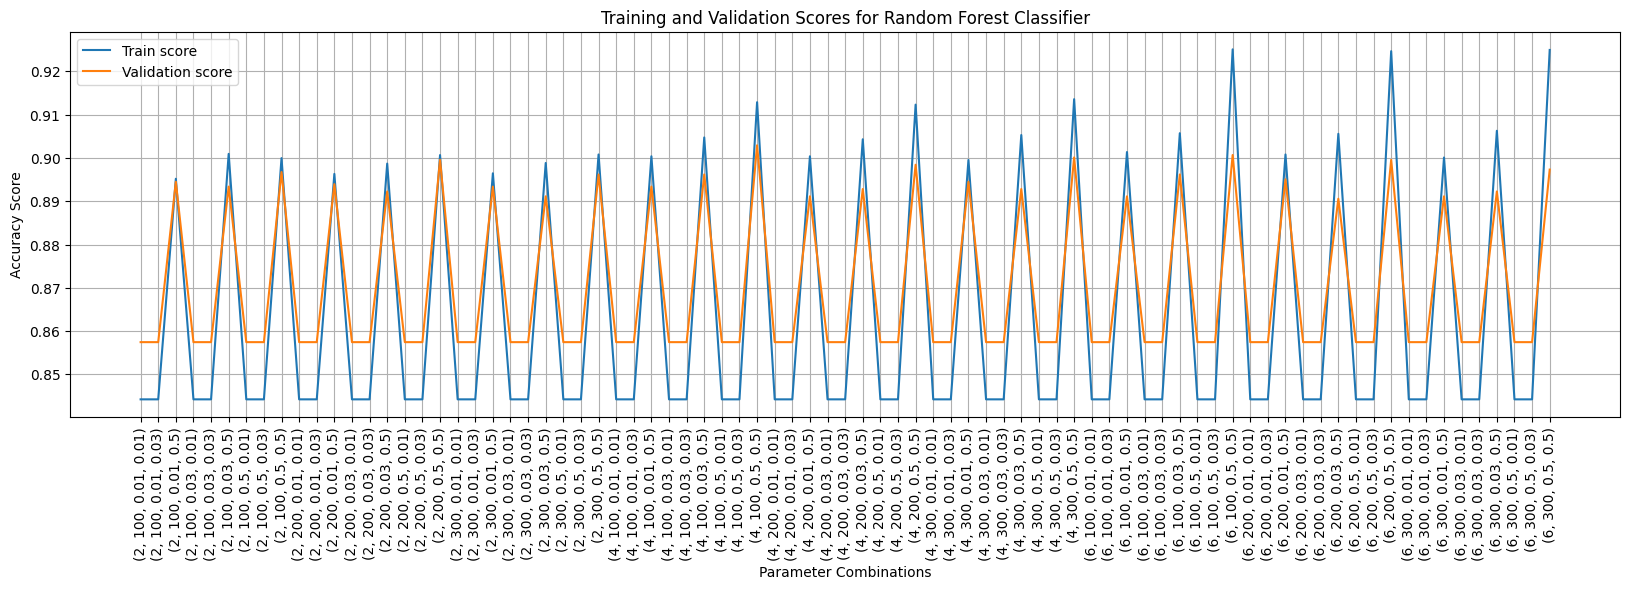

In [257]:
# Plotting the train and validation scores for Random Forest Classifier
%matplotlib inline

# Create subplots
plt.subplots(figsize=(20, 5))

# Plot training and validation scores
plt.plot(range(len(index_rfc)), train_score_rfc, label='Train score')
plt.plot(range(len(index_rfc)), validation_score_rfc, label='Validation score')

# Set x-axis ticks and labels
plt.xticks(range(len(index_rfc)), index_rfc, rotation=90)

# Add legend, grid, and labels
plt.legend()
plt.grid()
plt.xlabel('Parameter Combinations')
plt.ylabel('Accuracy Score')
plt.title('Training and Validation Scores for Random Forest Classifier')
plt.show()

In [258]:
from sklearn.ensemble import RandomForestClassifier


# Intializing the best RandomForestClassifier model
best_rfc_model = RandomForestClassifier(max_depth=4, n_estimators=100,
                                       max_samples=0.5, max_features=0.5,
                                       random_state=0)

# Fitting the best model on the training data
best_rfc_model.fit(X_train_cls, y_train_cls)

RandomForestClassifier(max_depth=4, max_features=0.5, max_samples=0.5,
                       random_state=0)

In [259]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions on training and validation sets
y_train_pred_rfc = best_rfc_model.predict(X_train_cls)
y_valid_pred_rfc = best_rfc_model.predict(X_valid_cls)

# Print metrics for the training set
print('Random Forest Classifier Performance on Training Data')
print('Accuracy score - Train: ', accuracy_score(y_train_cls, y_train_pred_rfc))
print('Precision score - Train: ', precision_score(y_train_cls, y_train_pred_rfc))
print('Recall score - Train: ', recall_score(y_train_cls, y_train_pred_rfc))
print('F1 score - Train: ', f1_score(y_train_cls, y_train_pred_rfc))
print('Confusion Matrix - Train:\n', confusion_matrix(y_train_cls, y_train_pred_rfc))

# Print metrics for the validation set
print('Random Forest Classifier Performance on Validation Data')
print('Accuracy score - Validation: ', accuracy_score(y_valid_cls, y_valid_pred_rfc))
print('Precision score - Validation: ', precision_score(y_valid_cls, y_valid_pred_rfc))
print('Recall score - Validation: ', recall_score(y_valid_cls, y_valid_pred_rfc))
print('F1 score - Validation: ', f1_score(y_valid_cls, y_valid_pred_rfc))
print('Confusion Matrix - Validation:\n', confusion_matrix(y_valid_cls, y_valid_pred_rfc))

Random Forest Classifier Performance on Training Data
Accuracy score - Train:  0.9128665637715729
Precision score - Train:  0.7570977917981072
Recall score - Train:  0.6486486486486487
F1 score - Train:  0.6986899563318777
Confusion Matrix - Train:
 [[5786  231]
 [ 390  720]]
Random Forest Classifier Performance on Validation Data
Accuracy score - Validation:  0.9029180695847363
Precision score - Validation:  0.6768558951965066
Recall score - Validation:  0.610236220472441
F1 score - Validation:  0.6418219461697723
Confusion Matrix - Validation:
 [[1454   74]
 [  99  155]]


The model has performed well on both the training and validation datasets.  
Precision is higher on the training set compared to the validation set.  
The recall rate is also higher on the training set compared to the validation set, indicating better performance in identifying positive instances in the training data.  
The F1 score is consistent between training and validation sets.  

### Classification prediction

Among the accuracies and metrics of all the models used for training the classifications, Decision Tree Classifier, Bagging Classifier, and Random Forest Classifier has best scores of accuracies, precision and recall. Predicting the test data using the three classifiers.

##### Prediction using Decision Tree Classifier

In [260]:
#prediction using best decision tree classifier
pred_dtclsfr = dtclsfr_best.predict(X_test_scaled_cls)
pred_dtclsfr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [261]:
#creating dataframe for the predicted target varibale from Decision Tree Classifier model
pred_dtclsfr_df = pd.DataFrame(pred_dtclsfr, columns=['Predicted_Revenue'])
pred_dtclsfr_df.value_counts()

Predicted_Revenue
0                    1421
1                     151
Name: count, dtype: int64

##### Prediction using Bagging Classifier

In [262]:
#prediction using best Bagging classifier
pred_bgclsfr = bgclsfr_best.predict(X_test_scaled_cls)
pred_bgclsfr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [263]:
#creating dataframe for the predicted target varibale from Bagging classifier
pred_bgclsfr_df = pd.DataFrame(pred_bgclsfr, columns=['Predicted_Revenue'])
pred_bgclsfr_df.value_counts()

Predicted_Revenue
0                    1487
1                      85
Name: count, dtype: int64

##### Prediction using Random Forest Classifier

In [264]:
#prediction using best Random Forest Classifier
pred_rfcclsfr = best_rfc_model.predict(X_test_scaled_cls)
pred_rfcclsfr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [265]:
#creating dataframe for the predicted target varibale from Random Forest Classifier
pred_rfcclsfr_df = pd.DataFrame(pred_rfcclsfr, columns=['Predicted_Revenue'])
pred_rfcclsfr_df.value_counts()

Predicted_Revenue
0                    1390
1                     182
Name: count, dtype: int64

The Decision Tree Classifier predicted 151 1's and 1421 0's.  
The Bagging Classifier predicted 85 1's and 1487 0's.  
The Random Forest Classifier predicted 182 1's and 1390 0's.  

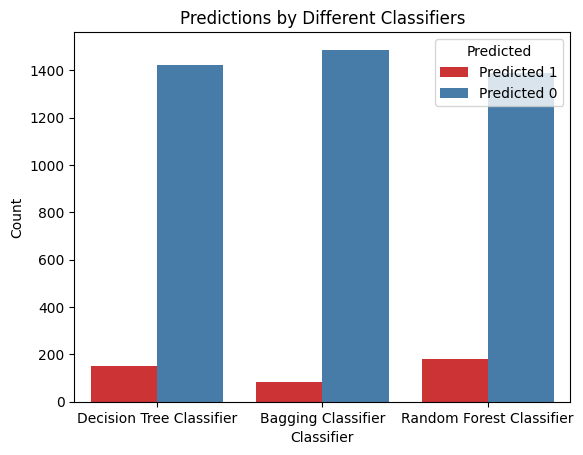

In [266]:
import seaborn as sns

# List of three best classifier
classifiers = ['Decision Tree Classifier', 'Bagging Classifier', 'Random Forest Classifier']
# Counts of predicted 1's
counts_1 = [151, 85, 182]  
# Counts of predicted 0's
counts_0 = [1421, 1487, 1390]  

# Create dataframe
data = {'Classifier': classifiers,
        'Predicted 1': counts_1,
        'Predicted 0': counts_0}
#Creating dataframe from data
df = pd.DataFrame(data)

# Melting the dataframe for easier plotting
df_melted = pd.melt(df, id_vars='Classifier', var_name='Predicted', value_name='Count')

# Plotting the three classifier prediction result
sns.barplot(x='Classifier', y='Count', hue='Predicted', data=df_melted, palette='Set1')
plt.title('Predictions by Different Classifiers')
plt.ylabel('Count')
plt.xlabel('Classifier')
plt.show()